In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Controls appearance of seaborn plots. Options: paper, notebook, talk, or poster
SEABORN_CONTEXT = 'talk' 
SEABORN_PALETTE = sns.color_palette("bright")

sns.set_palette(SEABORN_PALETTE)
sns.set_context(SEABORN_CONTEXT)

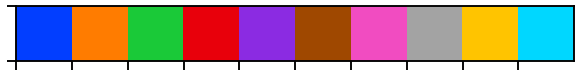

In [4]:
sns.palplot(SEABORN_PALETTE)

In [5]:
df_population = pd.read_csv('PEP_2018_PEPANNRES_with_ann.csv', encoding='latin1')
df_population = df_population.groupby('State', as_index=False)['Population'].sum()
df_population = df_population.rename(columns={"State": "state", "Population": "population"})
df_population['state'] = df_population['state'].apply(lambda state: state.strip())
df_population = df_population.append(pd.DataFrame([['Puerto Rico', 3_193_400],
                                                   ['Guam', 165_768],
                                                   ['Virgin Islands', 104_680],
                                                   ['Northern Mariana Islands', 56_882]], columns=['state', 'population']))

df_population

state  population
0                    Alabama     4887871
1                     Alaska      737438
2                    Arizona     7171646
3                   Arkansas     3013825
4                 California    39557045
5                   Colorado     5695564
6                Connecticut     3572665
7                   Delaware      967171
8       District of Columbia      702455
9                    Florida    21299325
10                   Georgia    10519475
11                    Hawaii     1420491
12                     Idaho     1754208
13                  Illinois    12741080
14                   Indiana     6691878
15                      Iowa     3156145
16                    Kansas     2911505
17                  Kentucky     4468402
18                 Louisiana     4659978
19                     Maine     1338404
20                  Maryland     6042718
21             Massachusetts     6902149
22                  Michigan     9995915
23                 Minnesota     5611179
24               Mississippi     2986530
25                  Missouri     6126452
26                   Montana     1062305
27                  Nebraska     1929268
28                    Nevada     3034392
29             New Hampshire     1356458
30                New Jersey     8908520
31                New Mexico     2095428
32                  New York    19542209
33            North Carolina    10383620
34              North Dakota      760077
35                      Ohio    11689442
36                  Oklahoma     3943079
37                    Oregon     4190713
38              Pennsylvania    12807060
39              Rhode Island     1057315
40            South Carolina     5084127
41              South Dakota      882235
42                 Tennessee     6770010
43                     Texas    28701845
44                      Utah     3161105
45                   Vermont      626299
46                  Virginia     8330345
47                Washington     7535591
48             West Virginia     1805832
49                 Wisconsin     5813568
50                   Wyoming      577737
0                Puerto Rico     3193400
1                       Guam      165768
2             Virgin Islands      104680
3   Northern Mariana Islands       56882

In [6]:
# df_hospitals.loc[df_hospitals['fips'] == 'NOT AVAILABLE']

In [7]:
df_hospitals = pd.read_csv('us-hospitals.csv')
df_hospitals = df_hospitals.rename(columns={"COUNTYFIPS": "fips", "STATE": "state", "BEDS": "beds"})
df_hospitals = df_hospitals.loc[(df_hospitals.beds != -999) & (df_hospitals['fips'] != 'NOT AVAILABLE')]
df_hospitals['fips'] = df_hospitals['fips'].astype(int)
df_hospitals

X          Y  OBJECTID        ID  \
0     -83.387732  39.348667      3001  12645123   
1     -81.919907  40.565095      3002  17244654   
2     -82.450635  40.048302      3003   2543055   
3     -83.755531  40.369542      3004   5843311   
4     -82.224713  41.295065      3005   5544074   
...          ...        ...       ...       ...   
7570  -89.634245  44.931130      7571   6254403   
7571  -87.954473  42.859866      7572   6653132   
7572 -117.566294  34.103714      7573  24091730   
7573 -117.071712  32.617494      7574  34491911   
7574 -122.405762  37.756576      7575  39094110   

                                                   NAME  \
0                       ADENA GREENFIELD MEDICAL CENTER   
1                                     POMERENE HOSPITAL   
2                             LICKING MEMORIAL HOSPITAL   
3                                   MARY RUTAN HOSPITAL   
4                                  MERCY ALLEN HOSPITAL   
...                                                 ...   
7570                          NORTH CENTRAL HEALTH CARE   
7571          MIDWEST ORTHOPEDIC SPECIALTY HOSPITAL LLC   
7572                            KINDRED HOSPITAL RANCHO   
7573       PARADISE VALLEY HSP D/P APH BAYVIEW BEH HLTH   
7574  PRISCILLA CHAN & MARK ZUCKERBERG SAN FRANCISCO...   

                      ADDRESS              CITY state    ZIP           ZIP4  \
0         550 MIRABEAU STREET        GREENFIELD    OH  45123  NOT AVAILABLE   
1            981 WOOSTER ROAD       MILLERSBURG    OH  44654  NOT AVAILABLE   
2       1320 WEST MAIN STREET            NEWARK    OH  43055  NOT AVAILABLE   
3           205 PALMER AVENUE     BELLEFONTAINE    OH  43311  NOT AVAILABLE   
4      200 WEST LORAIN STREET           OBERLIN    OH  44074  NOT AVAILABLE   
...                       ...               ...   ...    ...            ...   
7570         1100 LAKEVIEW DR            WAUSAU    WI  54403  NOT AVAILABLE   
7571  10101 SOUTH 27TH STREET          FRANKLIN    WI  53132  NOT AVAILABLE   
7572   10841 WHITE OAK AVENUE  RANCHO CUCAMONGA    CA  91730  NOT AVAILABLE   
7573          330 MOSS STREET       CHULA VISTA    CA  91911  NOT AVAILABLE   
7574      1001 POTRERO AVENUE     SAN FRANCISCO    CA  94110  NOT AVAILABLE   

      ...                  VAL_DATE  \
0     ...  2014-02-10T00:00:00.000Z   
1     ...  2014-01-31T00:00:00.000Z   
2     ...  2014-02-10T00:00:00.000Z   
3     ...  2014-02-10T00:00:00.000Z   
4     ...  2014-02-10T00:00:00.000Z   
...   ...                       ...   
7570  ...  2014-02-10T00:00:00.000Z   
7571  ...  2014-01-13T00:00:00.000Z   
7572  ...  2014-02-10T00:00:00.000Z   
7573  ...  2014-02-10T00:00:00.000Z   
7574  ...  2014-02-10T00:00:00.000Z   

                                                WEBSITE       STATE_ID  \
0     http://www.adena.org/locations/detail.dT/adena...           1200   
1                       http://www.pomerenehospital.org           1202   
2                               http://www.lmhealth.org           1213   
3                              http://www.maryrutan.org           1214   
4     http://www.mercyonline.org/mercy_allen_hospita...           1219   
...                                                 ...            ...   
7570                              http://www.norcen.org            206   
7571                             http://www.mymosh.com/           1070   
7572                            http://www.khrancho.com  NOT AVAILABLE   
7573                                      NOT AVAILABLE  NOT AVAILABLE   
7574                             https://sfgh.ucsf.edu/  NOT AVAILABLE   

                            ALT_NAME ST_FIPS               OWNER TTL_STAFF  \
0                      NOT AVAILABLE      39          NON-PROFIT      -999   
1                      NOT AVAILABLE      39  GOVERNMENT - LOCAL      -999   
2                      NOT AVAILABLE      39          NON-PROFIT      -999   
3                      NOT AVAILABLE      39          NON-PROFIT      -999

In [8]:
df_hospitals.columns

Index(['X', 'Y', 'OBJECTID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'state', 'ZIP',
       'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY', 'fips',
       'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC',
       'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'STATE_ID',
       'ALT_NAME', 'ST_FIPS', 'OWNER', 'TTL_STAFF', 'beds', 'TRAUMA',
       'HELIPAD'],
      dtype='object')

In [9]:
beds_per_county = df_hospitals.groupby('fips', as_index=False)['beds'].sum().sort_values(by='beds', ascending=False)
beds_per_county_50 = beds_per_county.head(50)
beds_per_county

fips   beds
158    6037  30371
474   17031  18259
2142  48201  15996
1506  36061  11052
291   12086  10243
...     ...    ...
1322  30071      6
1542  37015      6
1968  46077      6
890   22007      6
2206  48381      4

[2545 rows x 2 columns]

In [10]:
# for state in beds_per_state['state'].values: print(f"'{state}' : '{state}'")

In [11]:
state_dict = {
    'CA' : 'California',
    'TX' : 'Texas',
    'FL' : 'Florida',
    'NY' : 'New York',
    'OH' : 'Ohio',
    'PA' : 'Pennsylvania',
    'IL' : 'Illinois',
    'NJ' : 'New Jersey',
    'GA' : 'Georgia',
    'NC' : 'North Carolina',
    'MI' : 'Michigan',
    'TN' : 'Tennessee',
    'MO' : 'Missouri',
    'VA' : 'Virginia',
    'MA' : 'Massachusetts',
    'IN' : 'Indiana',
    'WI' : 'Wisconsin',
    'AL' : 'Alabama',
    'KY' : 'Kentucky',
    'LA' : 'Louisiana',
    'WA' : 'Washington',
    'MN' : 'Minnesota',
    'AZ' : 'Arizona',
    'OK' : 'Oklahoma',
    'SC' : 'South Carolina',
    'MS' : 'Mississippi',
    'IA' : 'Iowa',
    'MD' : 'Maryland',
    'CO' : 'Colorado',
    'AR' : 'Arkansas',
    'KS' : 'Kansas',
    'CT' : 'Connecticut',
    'WV' : 'West Virginia',
    'NV' : 'Nevada',
    'OR' : 'Oregon',
    'NE' : 'Nebraska',
    'PR' : 'Puerto Rico',
    'UT' : 'Utah',
    'NM' : 'New Mexico',
    'ME' : 'Maine',
    'DC' : 'District of Columbia',
    'MT' : 'Montana',
    'RI' : 'Rhode Island',
    'ND' : 'North Dakota',
    'ID' : 'Idaho',
    'SD' : 'South Dakota',
    'NH' : 'New Hampshire',
    'HI' : 'Hawaii',
    'DE' : 'Delaware',
    'WY' : 'Wyoming',
    'AK' : 'Alaska',
    'VT' : 'Vermont'
}

In [12]:
beds_per_state = df_hospitals.groupby('state', as_index=False)['beds'].sum().sort_values(by='beds', ascending=False)
beds_per_state['state'] = beds_per_state['state'].apply(lambda abbrev: state_dict.get(abbrev))
beds_per_state

state    beds
4             California  104034
44                 Texas   91310
9                Florida   72088
34              New York   57083
35                  Ohio   49177
38          Pennsylvania   46167
14              Illinois   35811
31            New Jersey   31359
10               Georgia   30778
27        North Carolina   27175
22              Michigan   26632
43             Tennessee   25551
24              Missouri   24026
46              Virginia   22196
19         Massachusetts   20882
15               Indiana   19415
49             Wisconsin   19131
1                Alabama   19000
17              Kentucky   18497
18             Louisiana   18413
48            Washington   15873
23             Minnesota   15778
3                Arizona   15452
36              Oklahoma   15177
41        South Carolina   15056
25           Mississippi   15020
12                  Iowa   13785
20              Maryland   13557
5               Colorado   11899
2               Arkansas   11699
16                Kansas   11261
6            Connecticut    9451
50         West Virginia    7772
33                Nevada    7771
37                Oregon    7624
29              Nebraska    7394
39           Puerto Rico    6334
45                  Utah    6110
32            New Mexico    5132
21                 Maine    4470
7   District of Columbia    4304
26               Montana    4126
40          Rhode Island    3985
28          North Dakota    3878
13                 Idaho    3802
42          South Dakota    3407
30         New Hampshire    3398
11                Hawaii    3365
8               Delaware    2780
51               Wyoming    1829
0                 Alaska    1813
47               Vermont    1468

In [13]:
df_states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df_states['date'] = pd.to_datetime(df_states['date'])
df_states = df_states.rename(columns={'cases': 'positive_tests'})
df_states = df_states.loc[df_states['date'] > '2020-03-04']
df_states = df_states.merge(df_population, how='left', on='state')
df_states = df_states.merge(beds_per_state, how='left', on='state')
df_states['positive_tests_per_100k_people'] = df_states['positive_tests'] / (df_states['population']/100_000)
df_states['beds_per_100k_people'] = df_states['beds'] / (df_states['population']/100_000)
df_states


date          state  fips  positive_tests  deaths  population  \
0    2020-03-05        Arizona     4               2       0     7171646   
1    2020-03-05     California     6              67       1    39557045   
2    2020-03-05       Colorado     8               2       0     5695564   
3    2020-03-05        Florida    12               4       0    21299325   
4    2020-03-05        Georgia    13               2       0    10519475   
...         ...            ...   ...             ...     ...         ...   
1633 2020-04-06       Virginia    51            2878      54     8330345   
1634 2020-04-06     Washington    53            8384     383     7535591   
1635 2020-04-06  West Virginia    54             345       4     1805832   
1636 2020-04-06      Wisconsin    55            2440      83     5813568   
1637 2020-04-06        Wyoming    56             212       0      577737   

          beds  positive_tests_per_100k_people  beds_per_100k_people  
0      15452.0                        0.027888            215.459603  
1     104034.0                        0.169376            262.997400  
2      11899.0                        0.035115            208.916975  
3      72088.0                        0.018780            338.452040  
4      30778.0                        0.019012            292.581141  
...        ...                             ...                   ...  
1633   22196.0                       34.548389            266.447548  
1634   15873.0                      111.258692            210.640413  
1635    7772.0                       19.104767            430.383336  
1636   19131.0                       41.970783            329.075019  
1637    1829.0                       36.694898            316.580036  

[1638 rows x 9 columns]

In [14]:
most_recent_date = df_states['date'].sort_values().unique()[-1]
most_recent_date

numpy.datetime64('2020-04-06T00:00:00.000000000')

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df = df.rename(columns={'cases': 'positive_tests'})
df = df.loc[df['fips'].notnull()]
df['fips'] = df['fips'].astype(int)
df = df.merge(beds_per_county, how='left', on='fips').sort_values(by='positive_tests', ascending=False)
df_50 = df.head(50)
df


date       county     state   fips  positive_tests  deaths  \
36646  2020-04-06       Nassau  New York  36059           15616     535   
36668  2020-04-06      Suffolk  New York  36103           14473     237   
34200  2020-04-05       Nassau  New York  36059           14398     396   
36676  2020-04-06  Westchester  New York  36119           14293     253   
34227  2020-04-05  Westchester  New York  36119           13722     197   
...           ...          ...       ...    ...             ...     ...   
36619  2020-04-06        Bronx  New York  36005               0       0   
36647  2020-04-06     New York  New York  36061               0       0   
37256  2020-04-06     Hansford     Texas  48195               0       0   
31768  2020-04-04        Bronx  New York  36005               0       0   
31805  2020-04-04       Queens  New York  36081               0       0   

          beds  
36646   4343.0  
36668   3583.0  
34200   4343.0  
36676   3235.0  
34227   3235.0  
...        ...  
36619   3822.0  
36647  11052.0  
37256     25.0  
31768   3822.0  
31805   3734.0  

[37648 rows x 7 columns]

In [94]:
state_pivot = pd.pivot_table(df_states, values='positive_tests', index=['state'],
                    columns=['date'], aggfunc=np.sum, fill_value=0)
state_pivot_copy = state_pivot.copy()

for j in range(len(state_pivot.index)):
    for k in range(0, len(state_pivot.columns)-1):
        state_pivot_copy.iloc[j, k+1] = state_pivot.iloc[j, k+1] - state_pivot.iloc[j, k]
        
state_pivot_copy

date                      2020-03-05  2020-03-06  2020-03-07  2020-03-08  \
state                                                                      
Alabama                            0           0           0           0   
Alaska                             0           0           0           0   
Arizona                            2           1           2           0   
Arkansas                           0           0           0           0   
California                        67          14          19          12   
Colorado                           2           6           0           0   
Connecticut                        0           0           0           1   
Delaware                           0           0           0           0   
District of Columbia               0           0           1           0   
Florida                            4           3           5           1   
Georgia                            2           1           4           4   
Guam                               0           0           0           0   
Hawaii                             0           1           0           1   
Idaho                              0           0           0           0   
Illinois                           5           1           0           1   
Indiana                            0           1           0           1   
Iowa                               0           0           0           3   
Kansas                             0           0           1           0   
Kentucky                           0           1           0           3   
Louisiana                          0           0           0           0   
Maine                              0           0           0           0   
Maryland                           3           0           0           2   
Massachusetts                      3           5           5          15   
Michigan                           0           0           0           0   
Minnesota                          0           1           0           1   
Mississippi                        0           0           0           0   
Missouri                           0           0           1           0   
Montana                            0           0           0           0   
Nebraska                          13           1           0           2   
Nevada                             2           0           0           2   
New Hampshire                      2           0           2           0   
New Jersey                         2           2           0           2   
New Mexico                         0           0           0           0   
New York                          22          22          45          17   
North Carolina                     1           1           0           0   
North Dakota                       0           0           0           0   
Northern Mariana Islands           0           0           0           0   
Ohio                               0           0           0           0   
Oklahoma                           0           1           0           0   
Oregon                             2           0           4           7   
Pennsylvania                       0           2           2           2   
Puerto Rico                        0           0           0           0   
Rhode Island                       2           1           0           0   
South Carolina                     0           2           0           4   
South Dakota                       0           0           0           0   
Tennessee                          1           0           0           2   
Texas                             16           3           0           4   
Utah                               1           2           0           0   
Vermont                            0           0           1           0   
Virgin Islands                     0           0           0           0   
Virginia                           0           0

In [104]:
# sns.lineplot(x=state_pivot_copy.columns, y=state_pivot_copy.loc['New York'], linewidth=6, markersize=14, marker='o', ci=False)

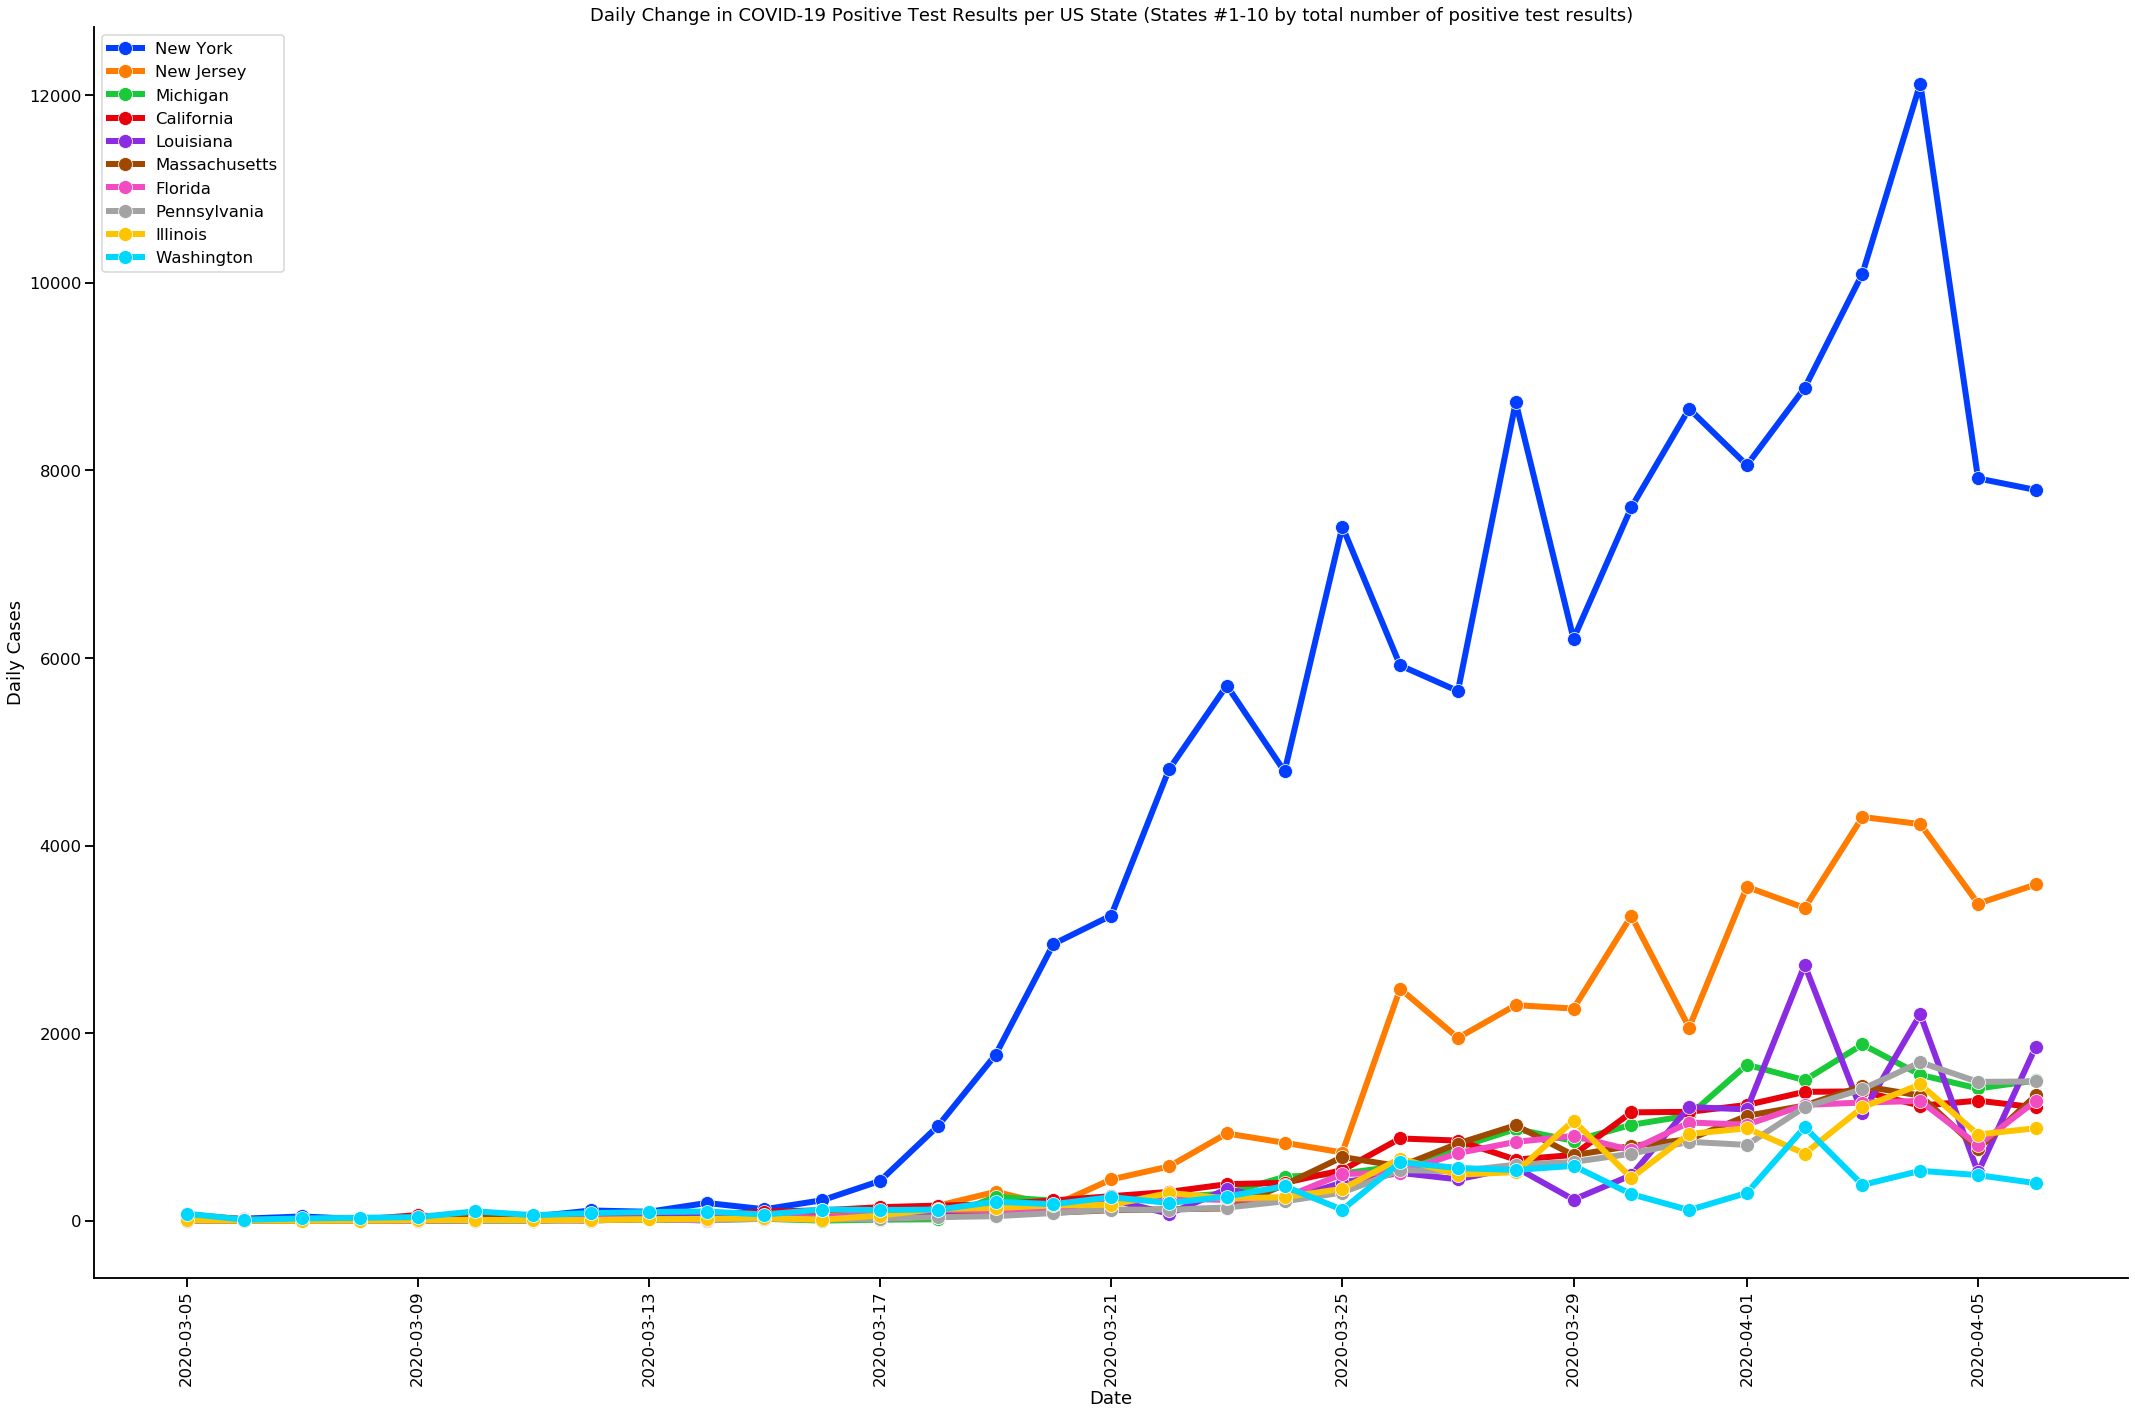

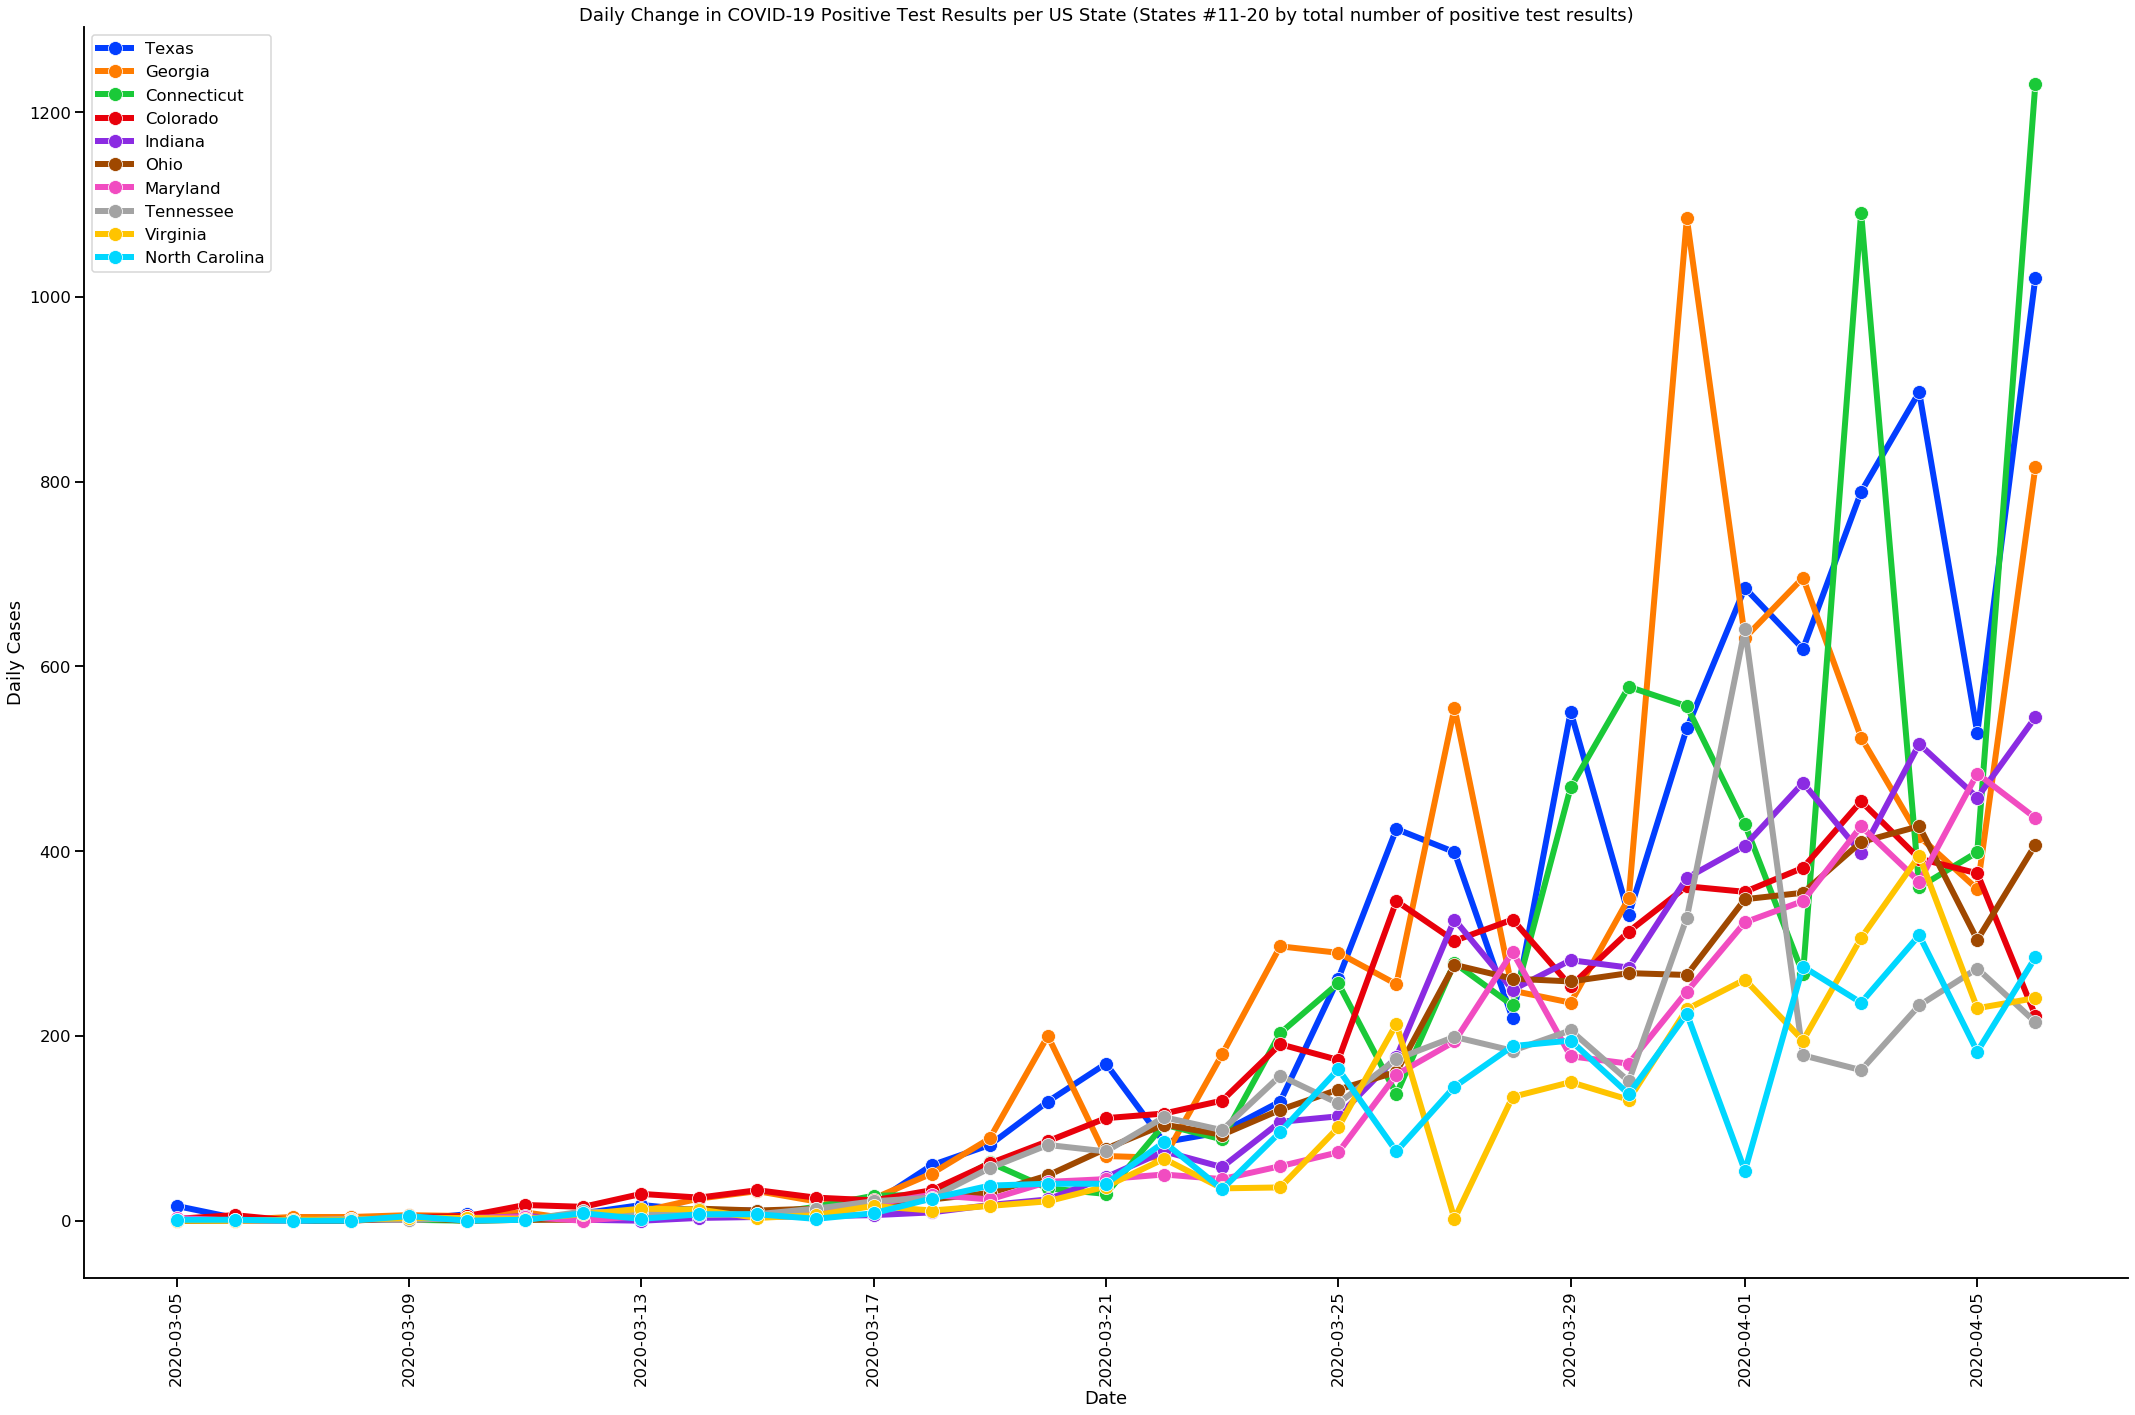

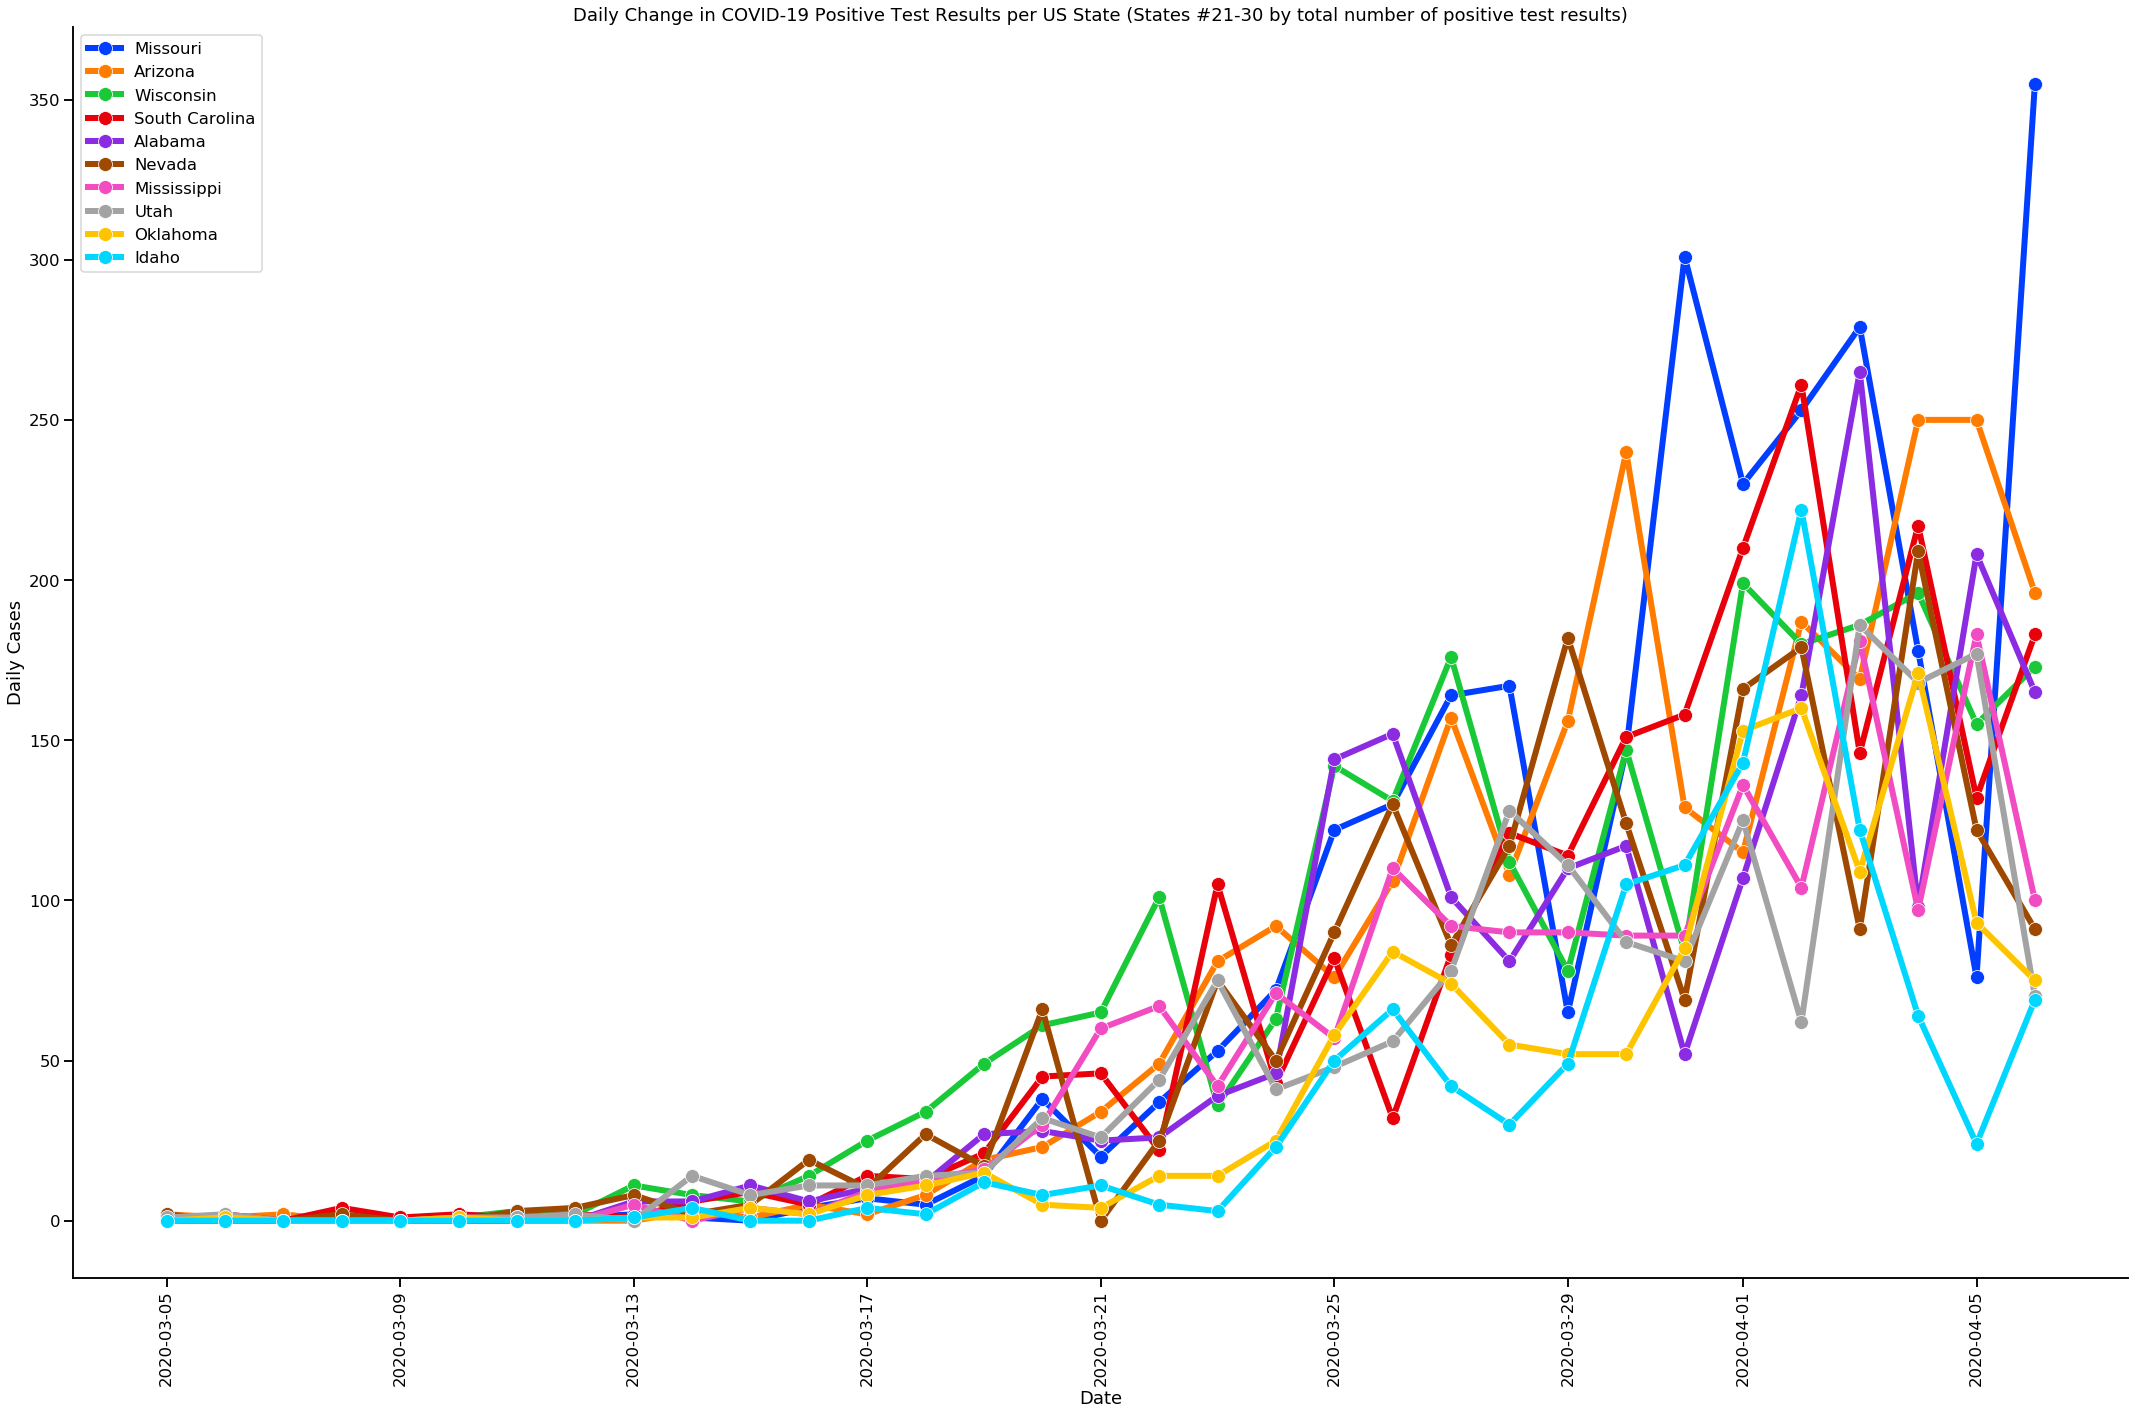

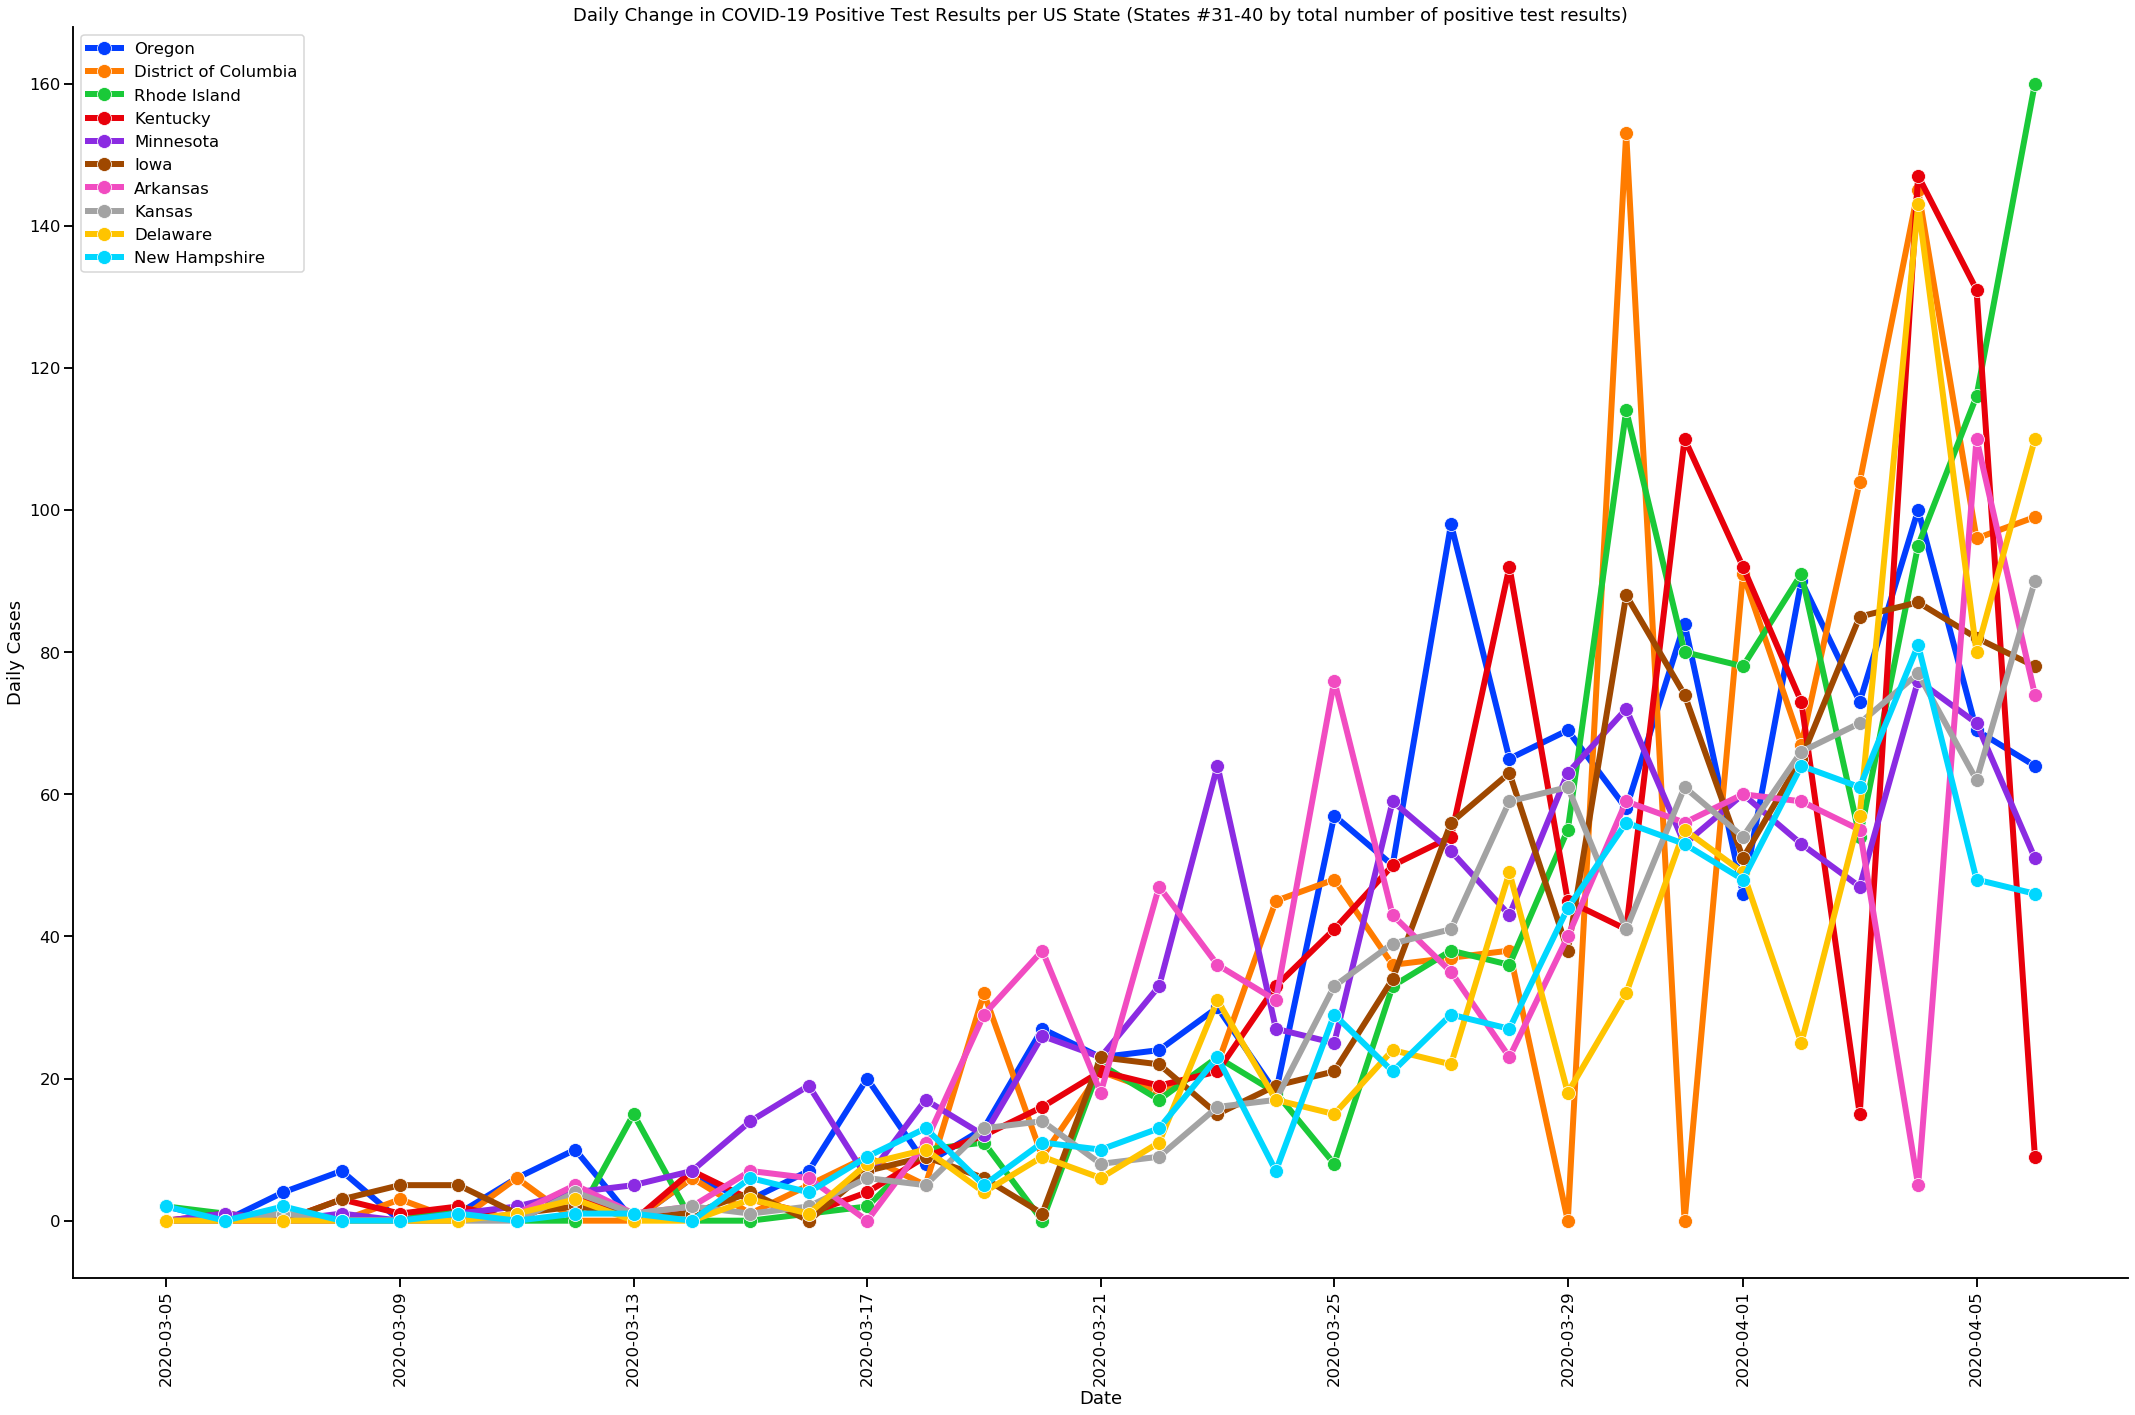

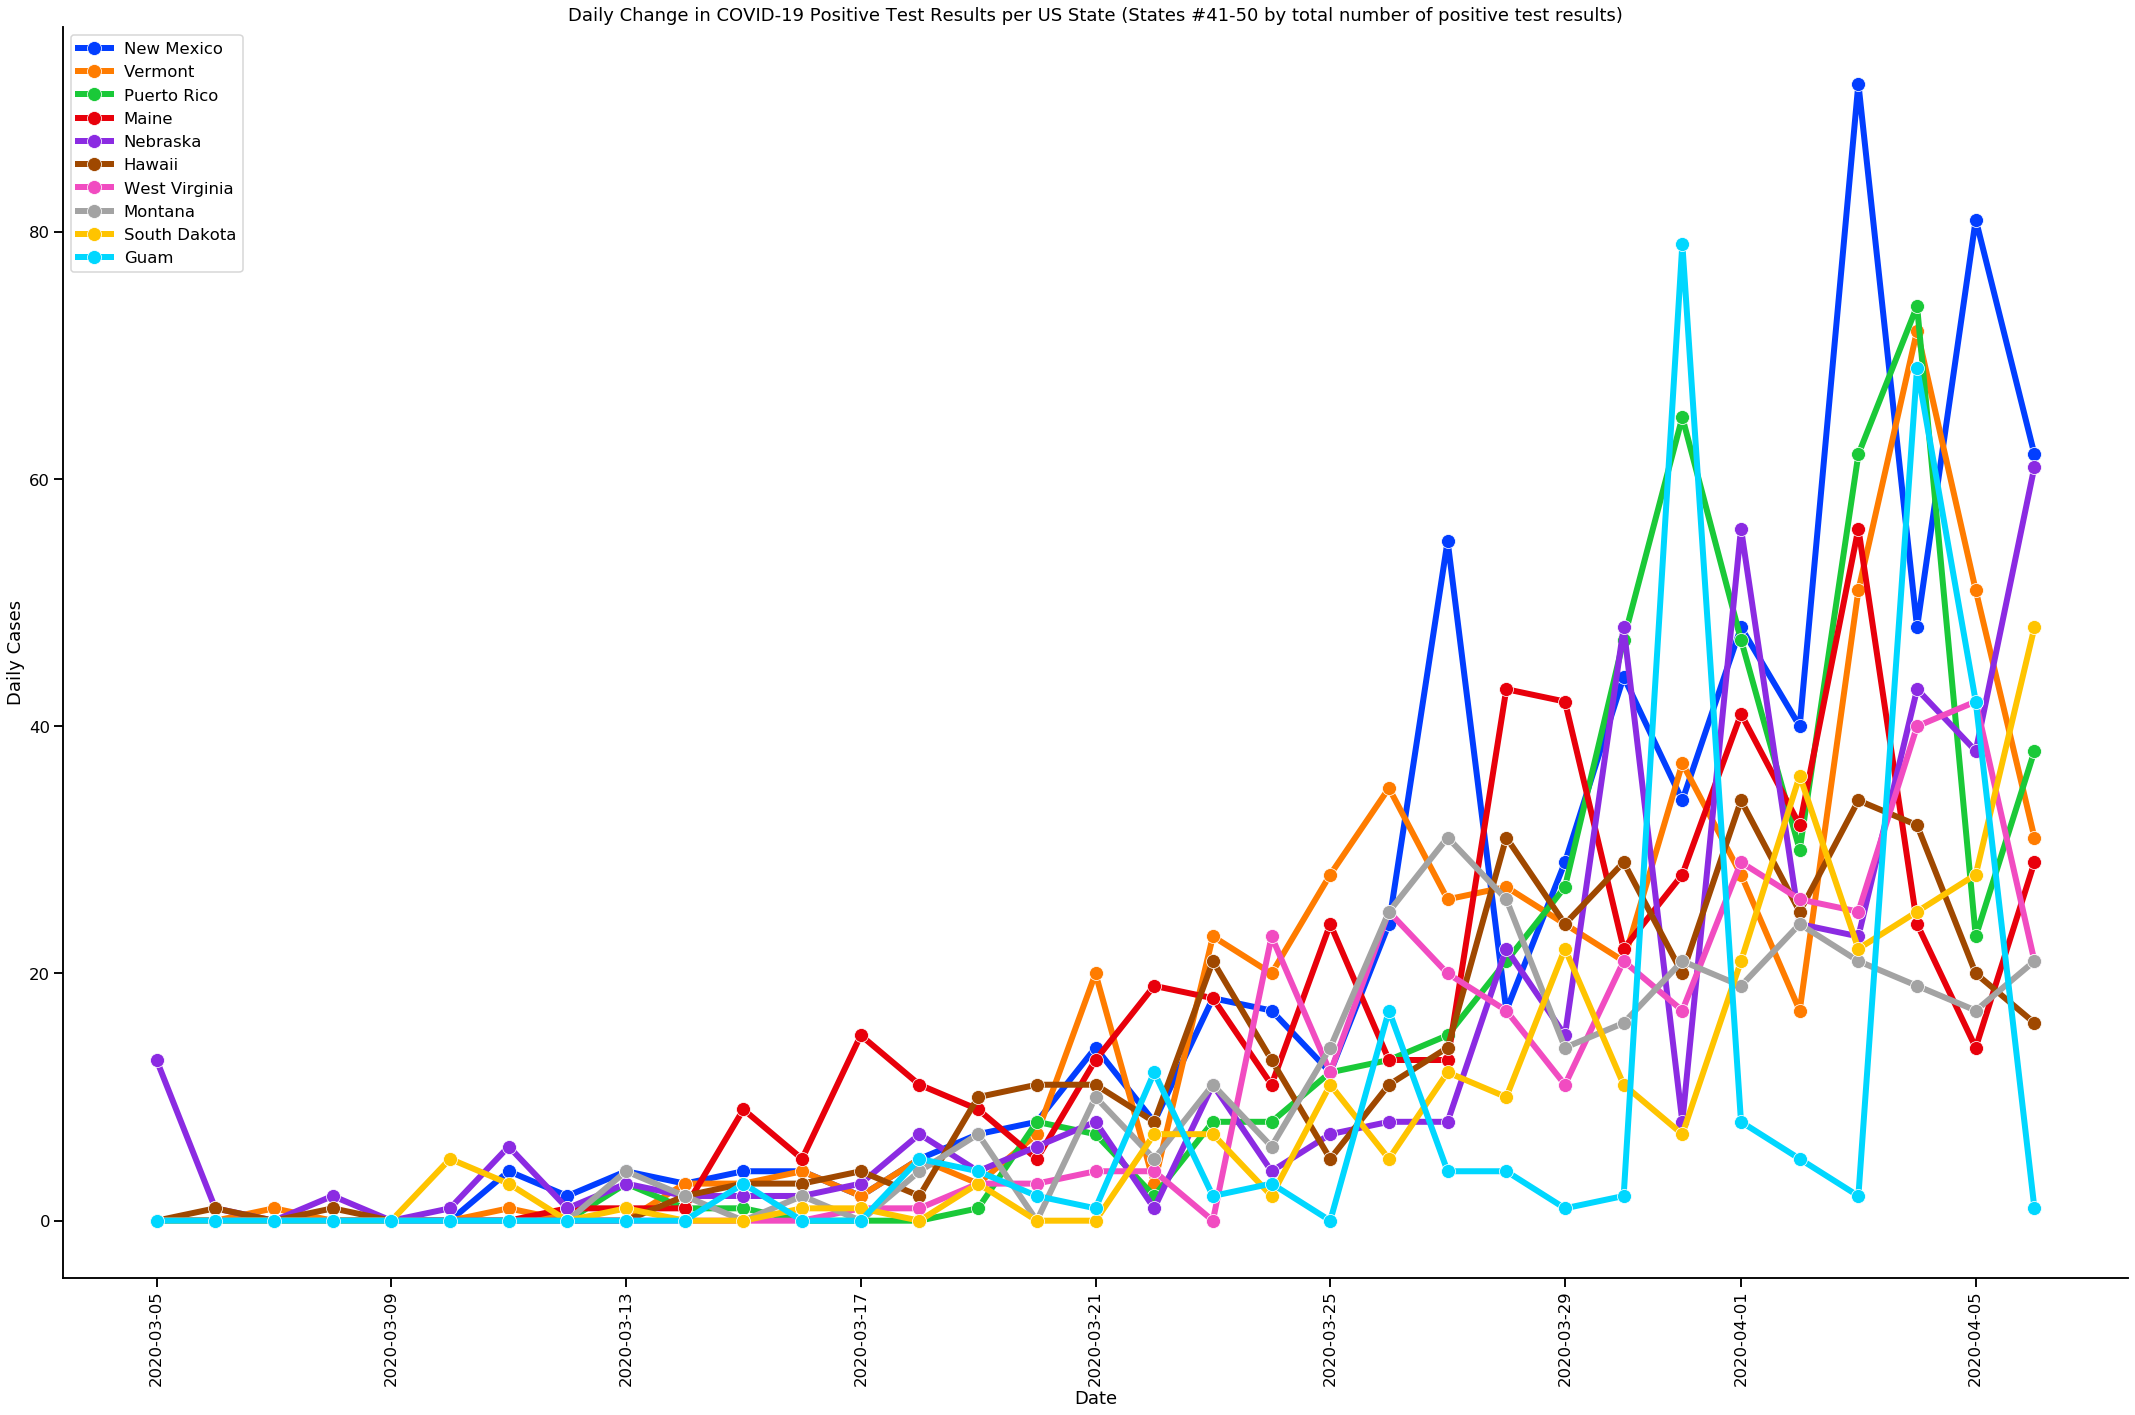

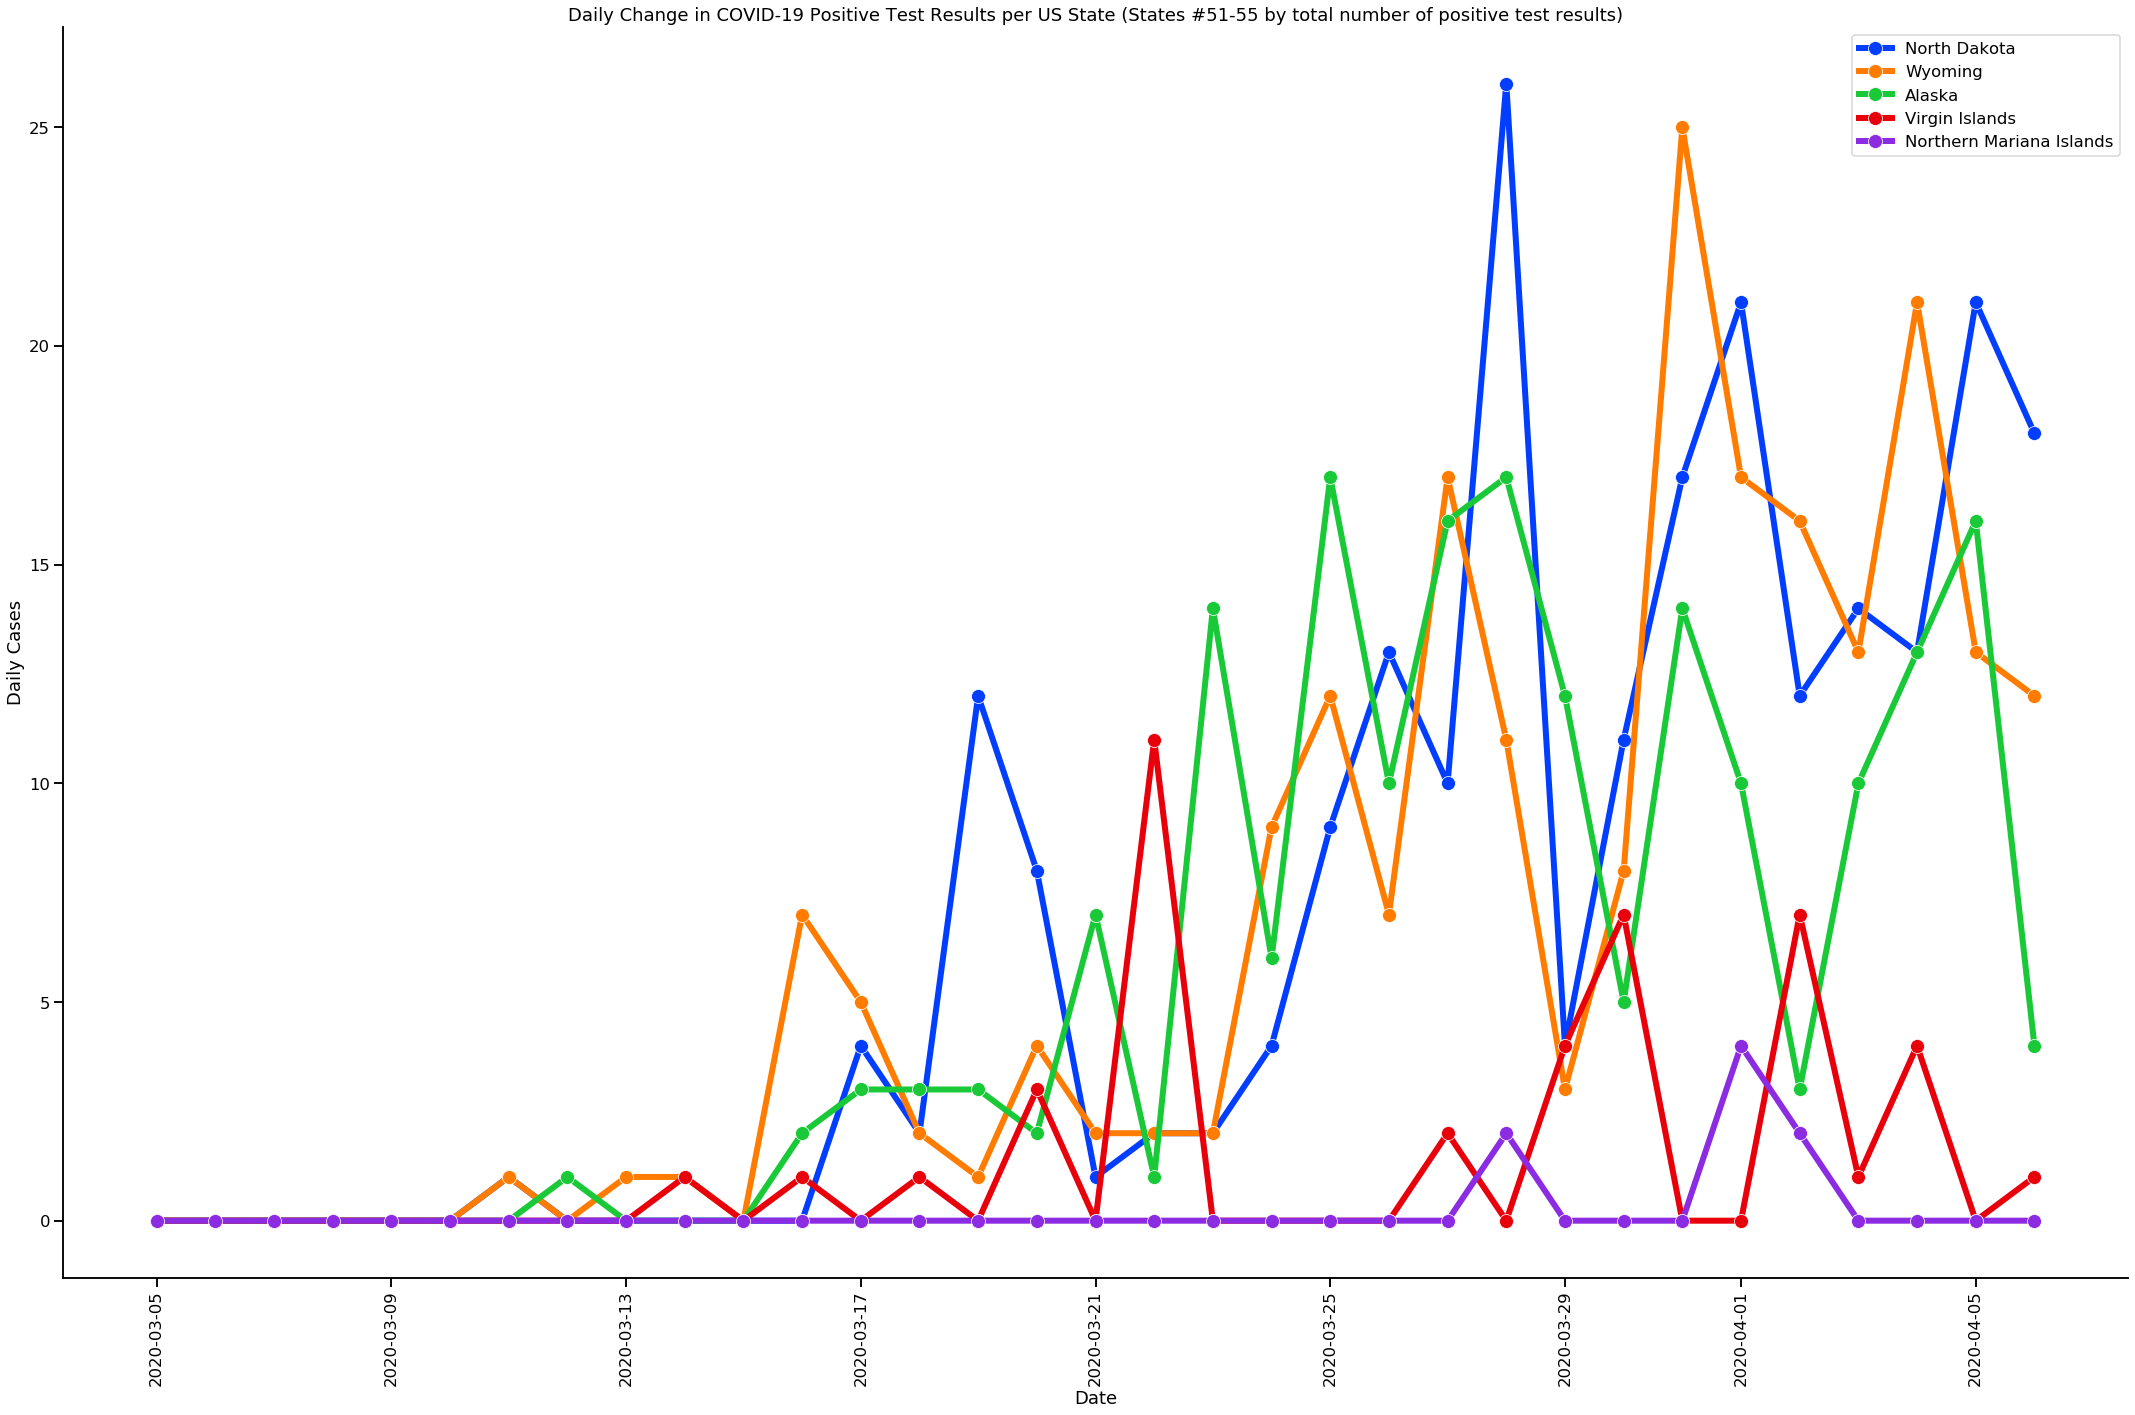

In [103]:
for i, group in enumerate(state_groups):
    plt.figure(figsize=(30,20))
    
    for s in group:
        states_to_plot = state_pivot_copy.loc[s]

        sns.lineplot(x=state_pivot_copy.columns, y=states_to_plot, label=s, 
                     linewidth=6, markersize=14, marker='o', ci=False)
        
    plt.xticks(rotation=90);
    plt.title(f'Daily Change in COVID-19 Positive Test Results per US State (States #{i*group_size+1}-{i*group_size+len(group)} by total number of positive test results)')
    plt.xlabel('Date')
    plt.ylabel('Daily Cases')
    sns.despine()
    plt.tight_layout()
    plt.show()

In [68]:
s

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, California to Washington
Data columns (total 33 columns):
2020-03-05 00:00:00    10 non-null int64
2020-03-06 00:00:00    10 non-null int64
2020-03-07 00:00:00    10 non-null int64
2020-03-08 00:00:00    10 non-null int64
2020-03-09 00:00:00    10 non-null int64
2020-03-10 00:00:00    10 non-null int64
2020-03-11 00:00:00    10 non-null int64
2020-03-12 00:00:00    10 non-null int64
2020-03-13 00:00:00    10 non-null int64
2020-03-14 00:00:00    10 non-null int64
2020-03-15 00:00:00    10 non-null int64
2020-03-16 00:00:00    10 non-null int64
2020-03-17 00:00:00    10 non-null int64
2020-03-18 00:00:00    10 non-null int64
2020-03-19 00:00:00    10 non-null int64
2020-03-20 00:00:00    10 non-null int64
2020-03-21 00:00:00    10 non-null int64
2020-03-22 00:00:00    10 non-null int64
2020-03-23 00:00:00    10 non-null int64
2020-03-24 00:00:00    10 non-null int64
2020-03-25 00:00:00    10 non-null int64
2020-03-26 00:00:00    1

In [17]:
df_hospitals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6915 entries, 0 to 7574
Data columns (total 34 columns):
X             6915 non-null float64
Y             6915 non-null float64
OBJECTID      6915 non-null int64
ID            6915 non-null int64
NAME          6915 non-null object
ADDRESS       6915 non-null object
CITY          6915 non-null object
state         6915 non-null object
ZIP           6915 non-null int64
ZIP4          6915 non-null object
TELEPHONE     6915 non-null object
TYPE          6915 non-null object
STATUS        6915 non-null object
POPULATION    6915 non-null int64
COUNTY        6915 non-null object
fips          6915 non-null int64
COUNTRY       6915 non-null object
LATITUDE      6915 non-null float64
LONGITUDE     6915 non-null float64
NAICS_CODE    6915 non-null int64
NAICS_DESC    6915 non-null object
SOURCE        6915 non-null object
SOURCEDATE    6915 non-null object
VAL_METHOD    6915 non-null object
VAL_DATE      6915 non-null object
WEBSITE       6915 n

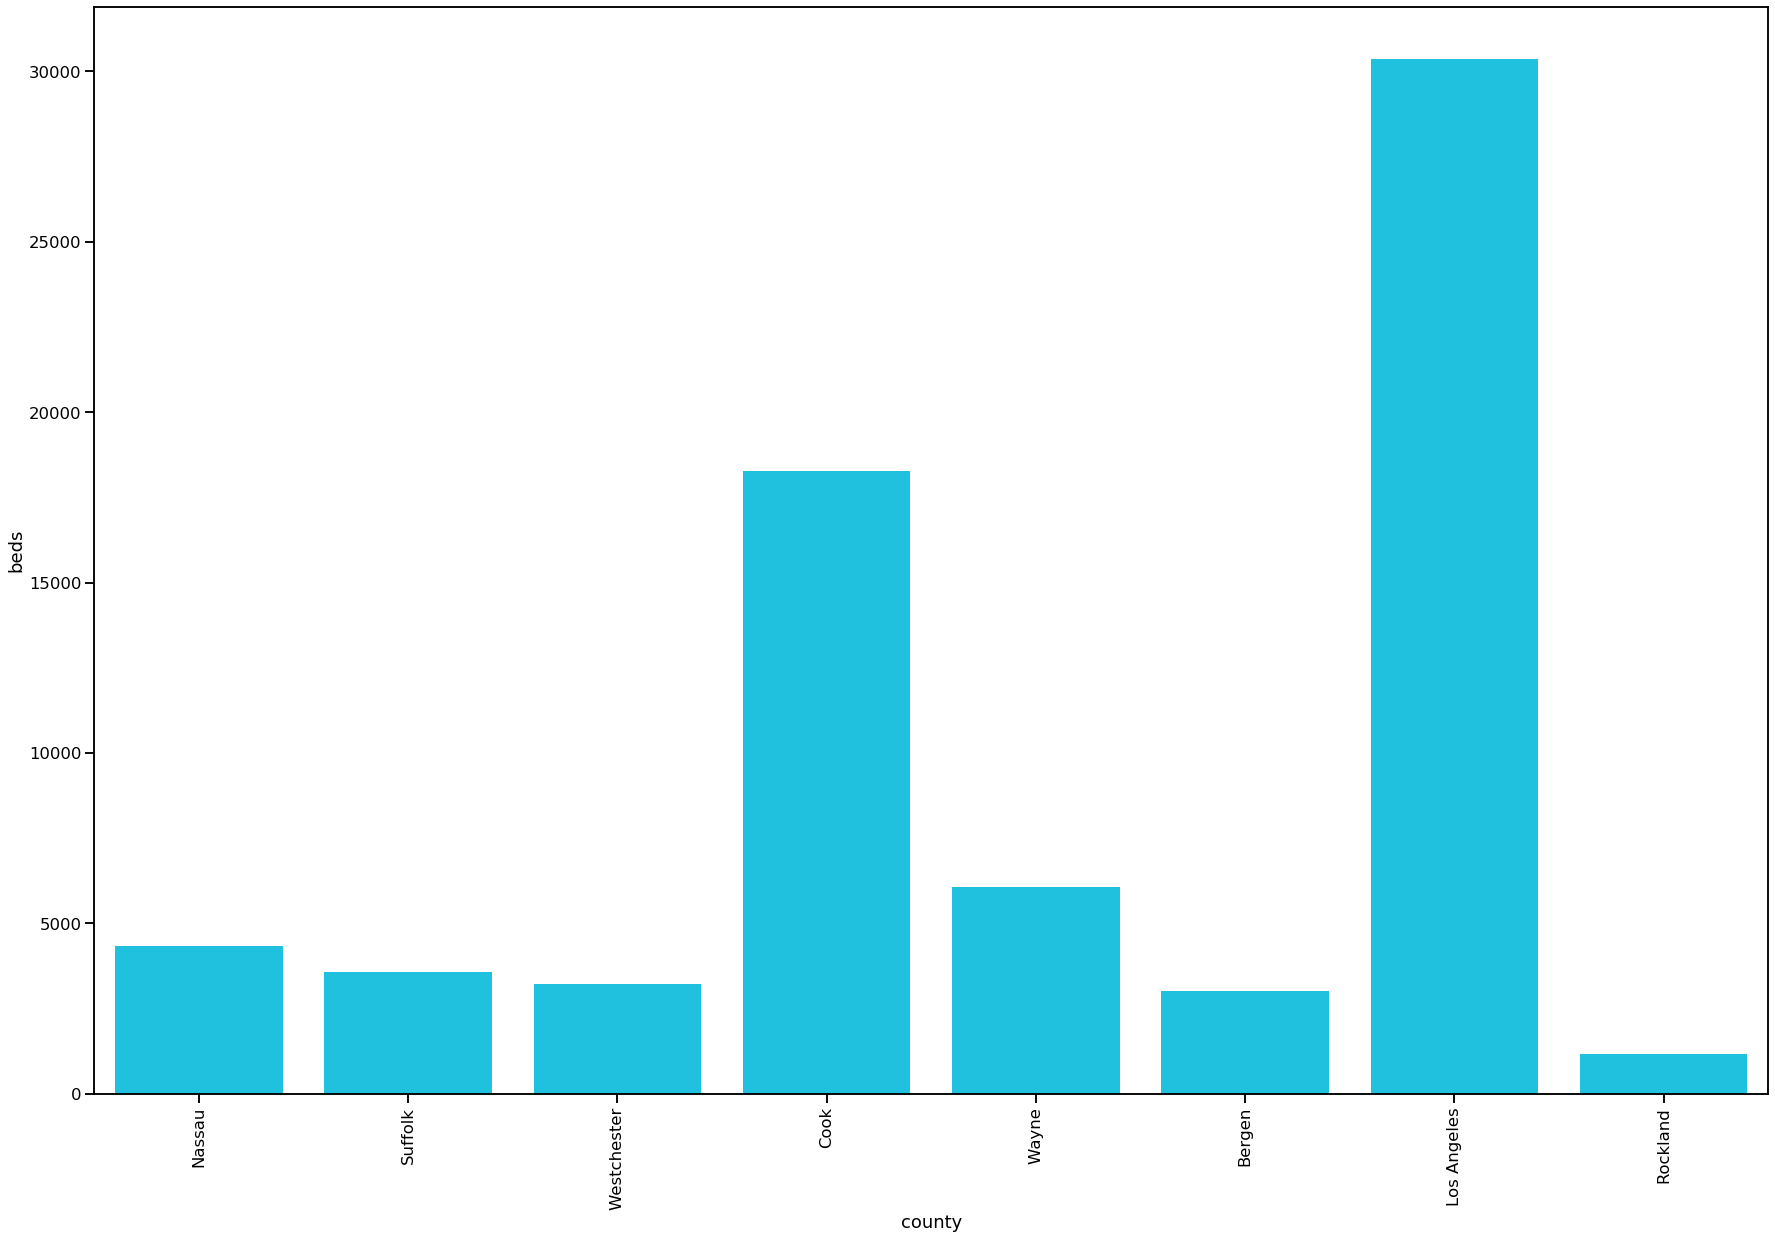

In [18]:
plt.figure(figsize=(30,20))
sns.barplot(x=df_50['county'], y=df_50['beds'], color=SEABORN_PALETTE[9], ci=False)
plt.xticks(rotation=90);

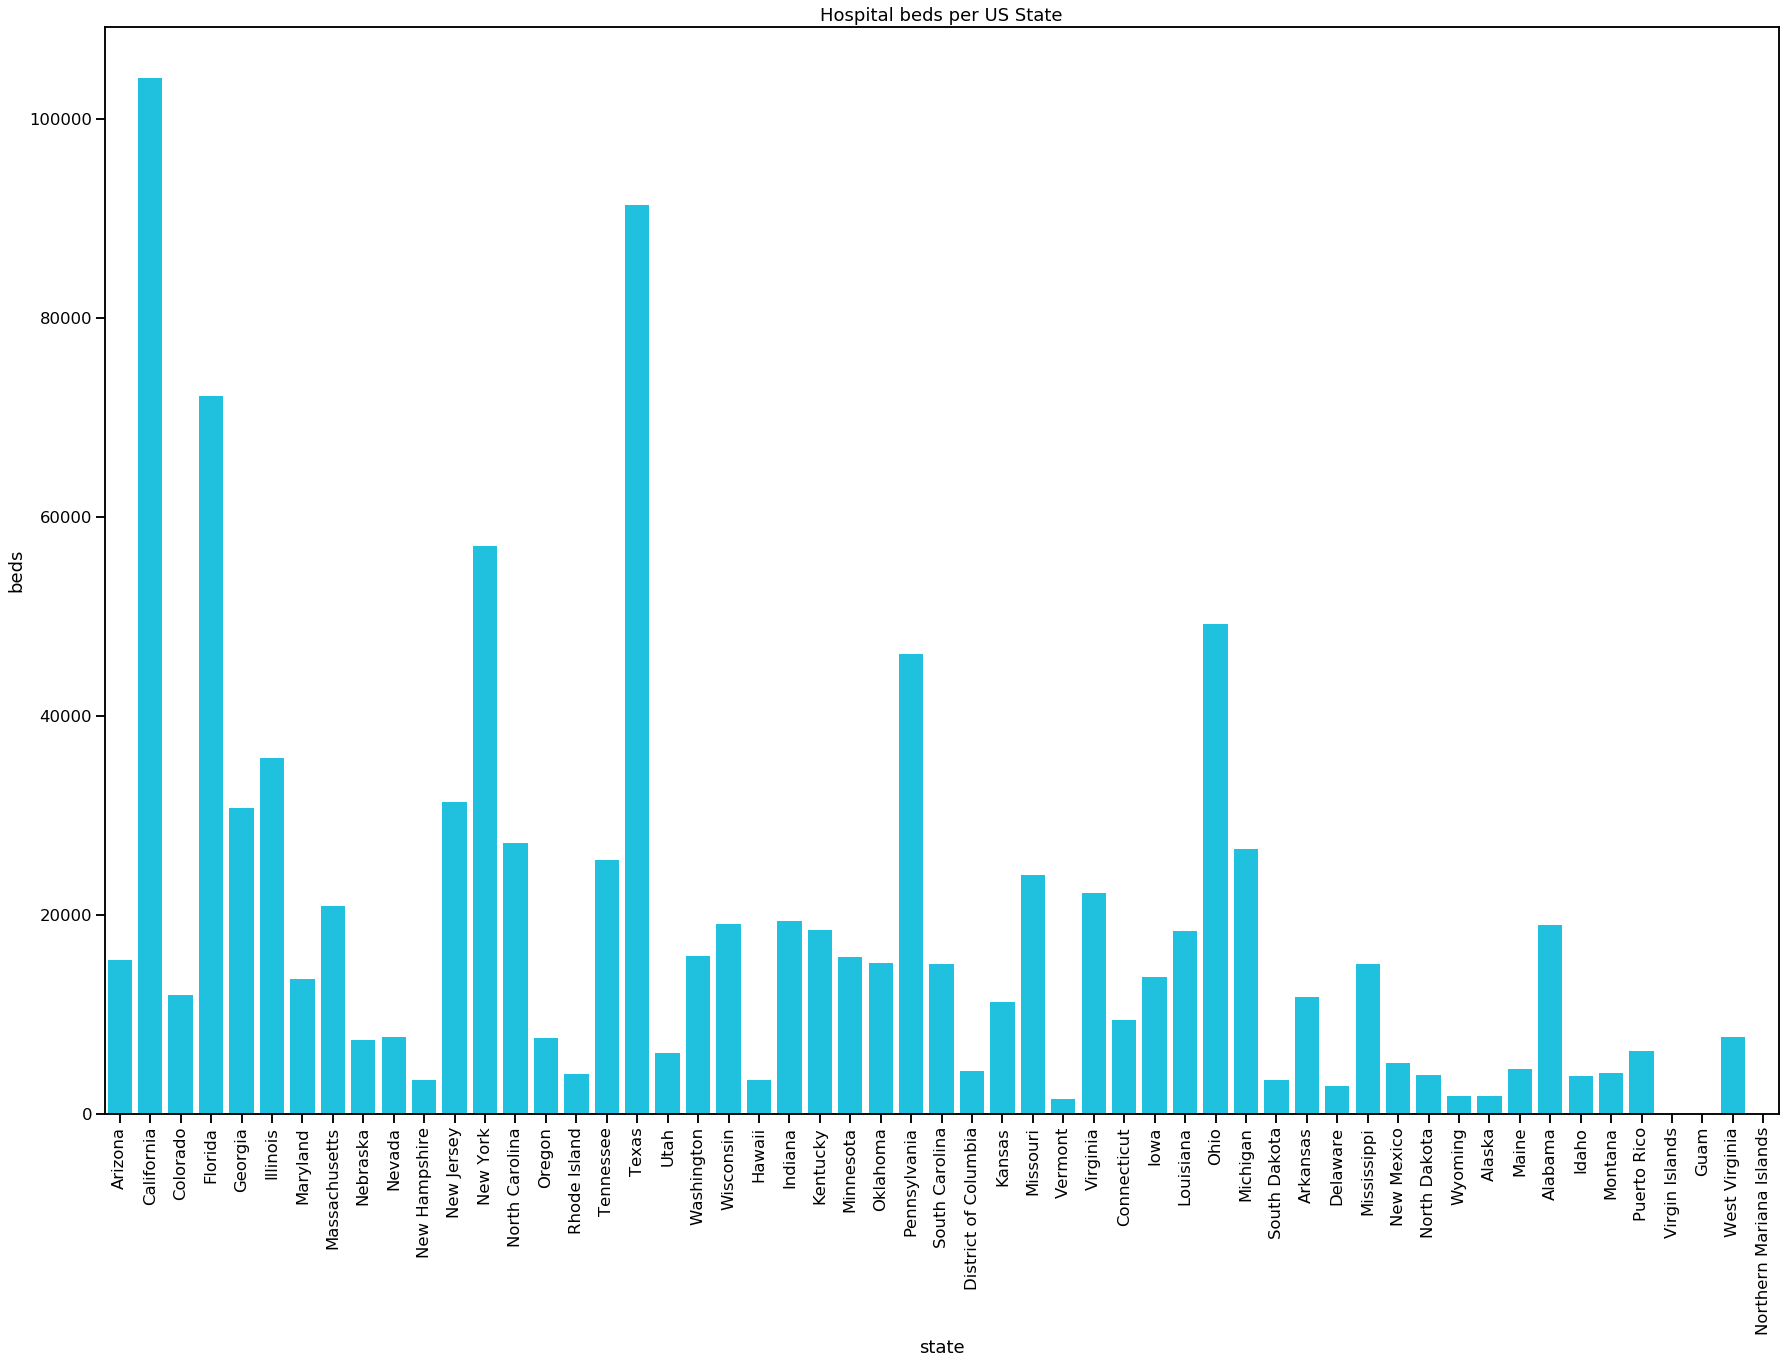

In [19]:
plt.figure(figsize=(30,20))
sns.barplot(x=df_states['state'], y=df_states['beds'], color=SEABORN_PALETTE[9], ci=False)
plt.title('Hospital beds per US State')
plt.xticks(rotation=90);

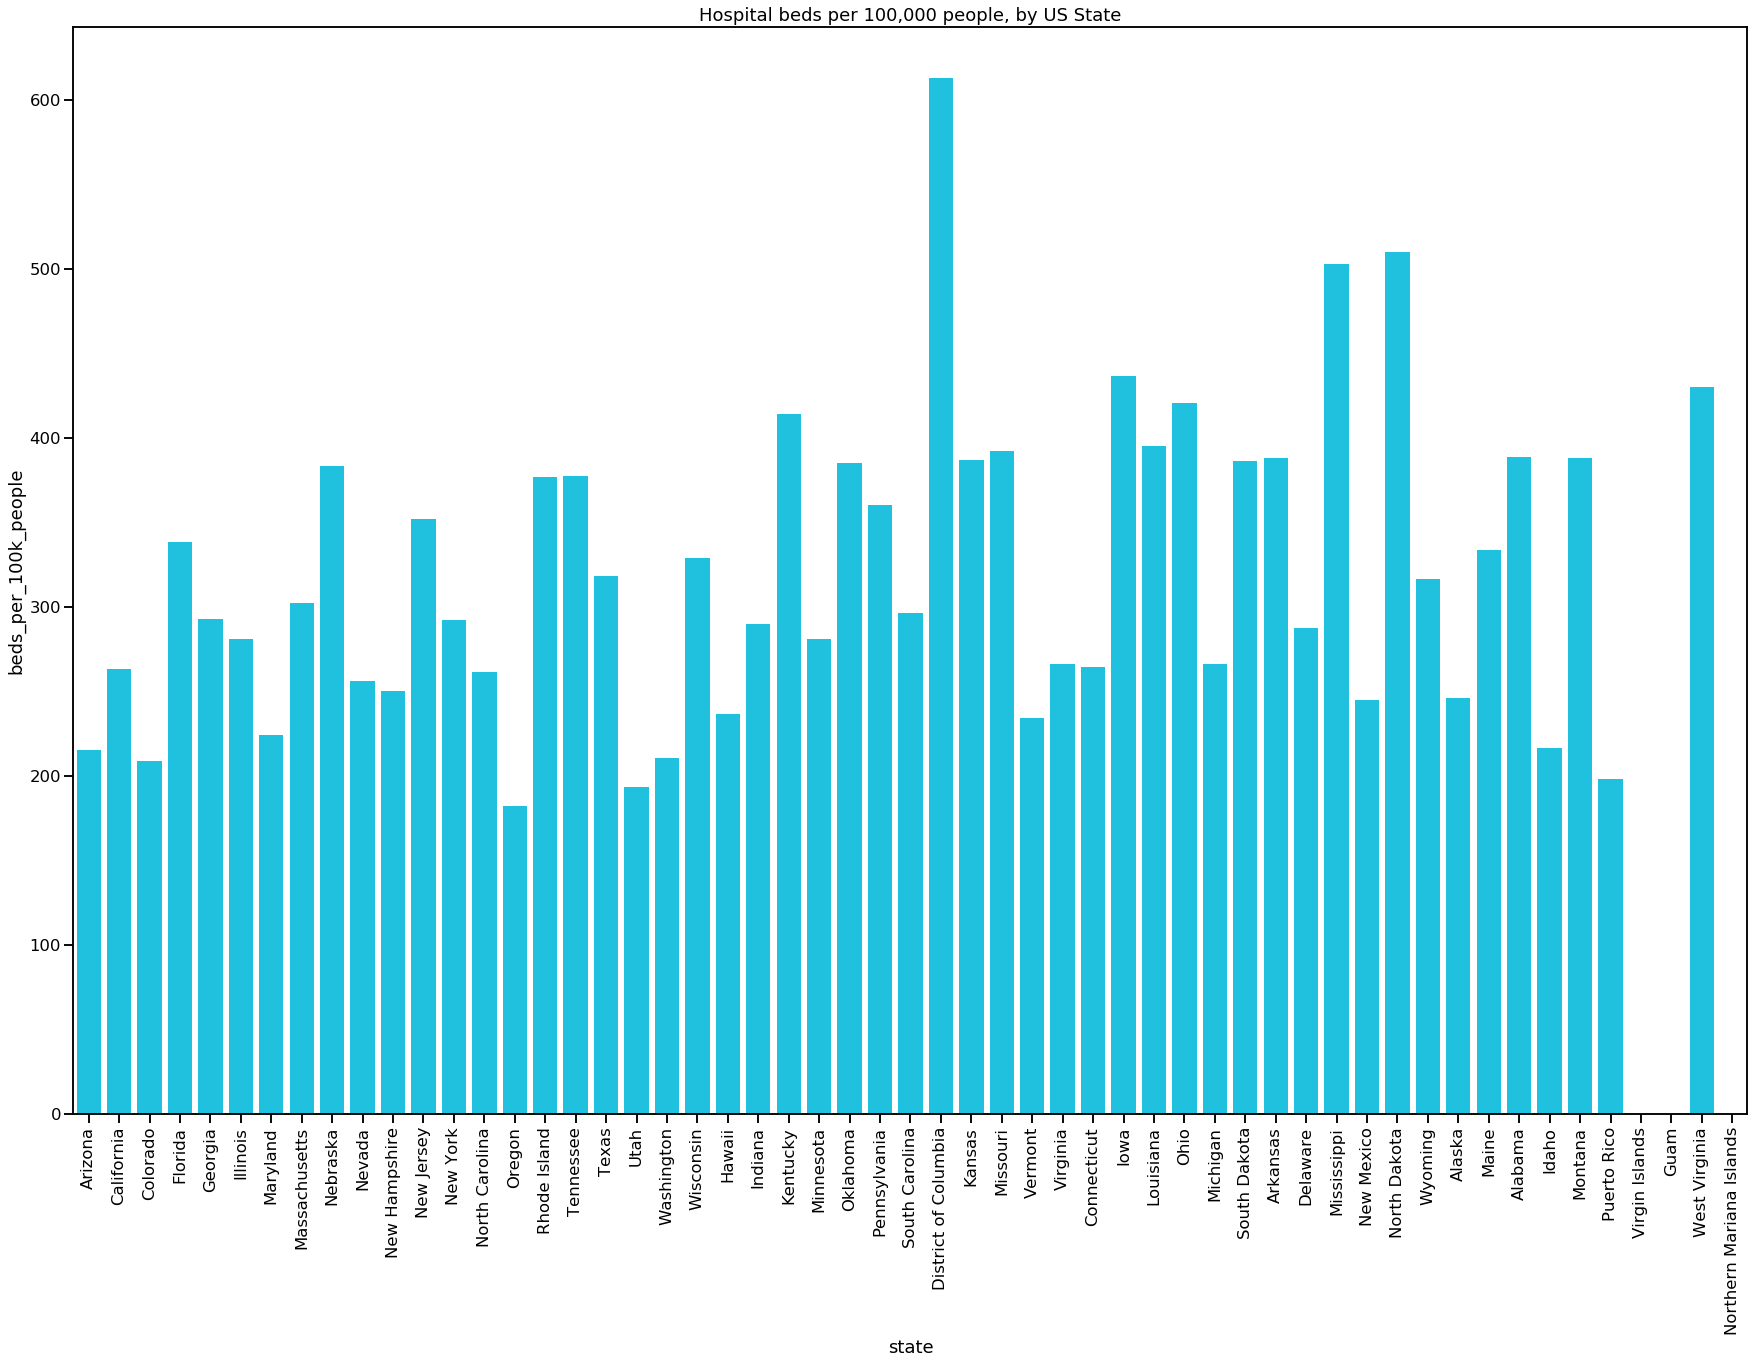

In [20]:
plt.figure(figsize=(30,20))
sns.barplot(x=df_states['state'], y=df_states['beds_per_100k_people'], color=SEABORN_PALETTE[9], ci=False)
plt.title('Hospital beds per 100,000 people, by US State')
plt.xticks(rotation=90);

In [51]:
# df_ny = df_states.loc[df_states['state'] == 'New York']
# df_nj = df_states.loc[df_states['state'] == 'New Jersey']

In [52]:
df_states_latest = df_states.loc[df_states['date'] == most_recent_date].sort_values(by='positive_tests', ascending=False)
df_states_latest

date                     state  fips  positive_tests  deaths  \
1616 2020-04-06                  New York    36          130703    4758   
1614 2020-04-06                New Jersey    34           41090    1005   
1606 2020-04-06                  Michigan    26           17130     727   
1587 2020-04-06                California     6           16284     386   
1602 2020-04-06                 Louisiana    22           14867     512   
1605 2020-04-06             Massachusetts    25           13837     260   
1592 2020-04-06                   Florida    12           13621     253   
1623 2020-04-06              Pennsylvania    42           13074     169   
1597 2020-04-06                  Illinois    17           12262     309   
1634 2020-04-06                Washington    53            8384     383   
1629 2020-04-06                     Texas    48            8115     160   
1593 2020-04-06                   Georgia    13            7558     294   
1589 2020-04-06               Connecticut     9            6906     206   
1588 2020-04-06                  Colorado     8            5172     150   
1598 2020-04-06                   Indiana    18            4956     141   
1620 2020-04-06                      Ohio    39            4450     142   
1604 2020-04-06                  Maryland    24            4045      92   
1628 2020-04-06                 Tennessee    47            3753      65   
1633 2020-04-06                  Virginia    51            2878      54   
1617 2020-04-06            North Carolina    37            2870      40   
1609 2020-04-06                  Missouri    29            2722      56   
1585 2020-04-06                   Arizona     4            2465      67   
1636 2020-04-06                 Wisconsin    55            2440      83   
1626 2020-04-06            South Carolina    45            2232      48   
1583 2020-04-06                   Alabama     1            2006      53   
1612 2020-04-06                    Nevada    32            1971      58   
1608 2020-04-06               Mississippi    28            1738      51   
1630 2020-04-06                      Utah    49            1675      13   
1621 2020-04-06                  Oklahoma    40            1327      51   
1596 2020-04-06                     Idaho    16            1170      13   
1622 2020-04-06                    Oregon    41            1132      29   
1591 2020-04-06      District of Columbia    11            1097      24   
1625 2020-04-06              Rhode Island    44            1082      27   
1601 2020-04-06                  Kentucky    21            1057      52   
1607 2020-04-06                 Minnesota    27             986      30   
1599 2020-04-06                      Iowa    19             946      25   
1586 2020-04-06                  Arkansas     5             927      16   
1600 2020-04-06                    Kansas    20             853      25   
1590 2020-04-06                  Delaware    10             783      15   
1613 2020-04-06             New Hampshire    33             715       9   
1615 2020-04-06                New Mexico    35             686      12   
1631 2020-04-06                   Vermont    50             543      23   
1624 2020-04-06               Puerto Rico    72             513      21   
1603 2020-04-06                     Maine    23             499      10   
1611 2020-04-06                  Nebraska    31             438      10   
1595 2020-04-06                    Hawaii    15             385       5   
1635 2020-04-06             West Virginia    54             345       4   
1610 2020-04-06                   Montana    30             319       6   
1627 2020-04-06              South Dakota    46             288       4   
1594 2020-04-06                      Guam    66             266       4   
1618 2020-04-06              North Dakota    38             225       3   
1637 2020-04-06                   Wyoming    56             212       0   
1584 2020-04-06                    A

In [53]:
sum(df_states_latest['positive_tests']), sum(df_states_latest['deaths'])

(366238, 10959)

In [54]:
(sum(df_states.loc[df_states['date'] == '2020-04-05', 'positive_tests']) - sum(df_states.loc[df_states['date'] == '2020-04-04', 'positive_tests']), 
sum(df_states.loc[df_states['date'] == '2020-04-05', 'deaths']) - sum(df_states.loc[df_states['date'] == '2020-04-04', 'deaths']))


(25238, 1156)

In [55]:
group_size = 10
state_groups = []

# Initialize empty arrays for groups of states
for i in np.arange(0, len(df_states_latest['state']), group_size): 
    state_groups.append([])
    
for i, state in enumerate(df_states_latest['state']):
    state_groups[i // group_size].append(state)

state_groups

[['New York',
  'New Jersey',
  'Michigan',
  'California',
  'Louisiana',
  'Massachusetts',
  'Florida',
  'Pennsylvania',
  'Illinois',
  'Washington'],
 ['Texas',
  'Georgia',
  'Connecticut',
  'Colorado',
  'Indiana',
  'Ohio',
  'Maryland',
  'Tennessee',
  'Virginia',
  'North Carolina'],
 ['Missouri',
  'Arizona',
  'Wisconsin',
  'South Carolina',
  'Alabama',
  'Nevada',
  'Mississippi',
  'Utah',
  'Oklahoma',
  'Idaho'],
 ['Oregon',
  'District of Columbia',
  'Rhode Island',
  'Kentucky',
  'Minnesota',
  'Iowa',
  'Arkansas',
  'Kansas',
  'Delaware',
  'New Hampshire'],
 ['New Mexico',
  'Vermont',
  'Puerto Rico',
  'Maine',
  'Nebraska',
  'Hawaii',
  'West Virginia',
  'Montana',
  'South Dakota',
  'Guam'],
 ['North Dakota',
  'Wyoming',
  'Alaska',
  'Virgin Islands',
  'Northern Mariana Islands']]

In [23]:
# states_0 = df_states.loc[df_states['state'].isin(state_groups[0])]

# plt.figure(figsize=(30,20))
# sns.lineplot(x=states_0['date'], y=states_0['positive_tests'], hue=states_0['state'], marker="o", dashes=False, ci=False)
# plt.xticks(rotation=90);
# plt.tight_layout()
# plt.show()

/Users/megarock/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


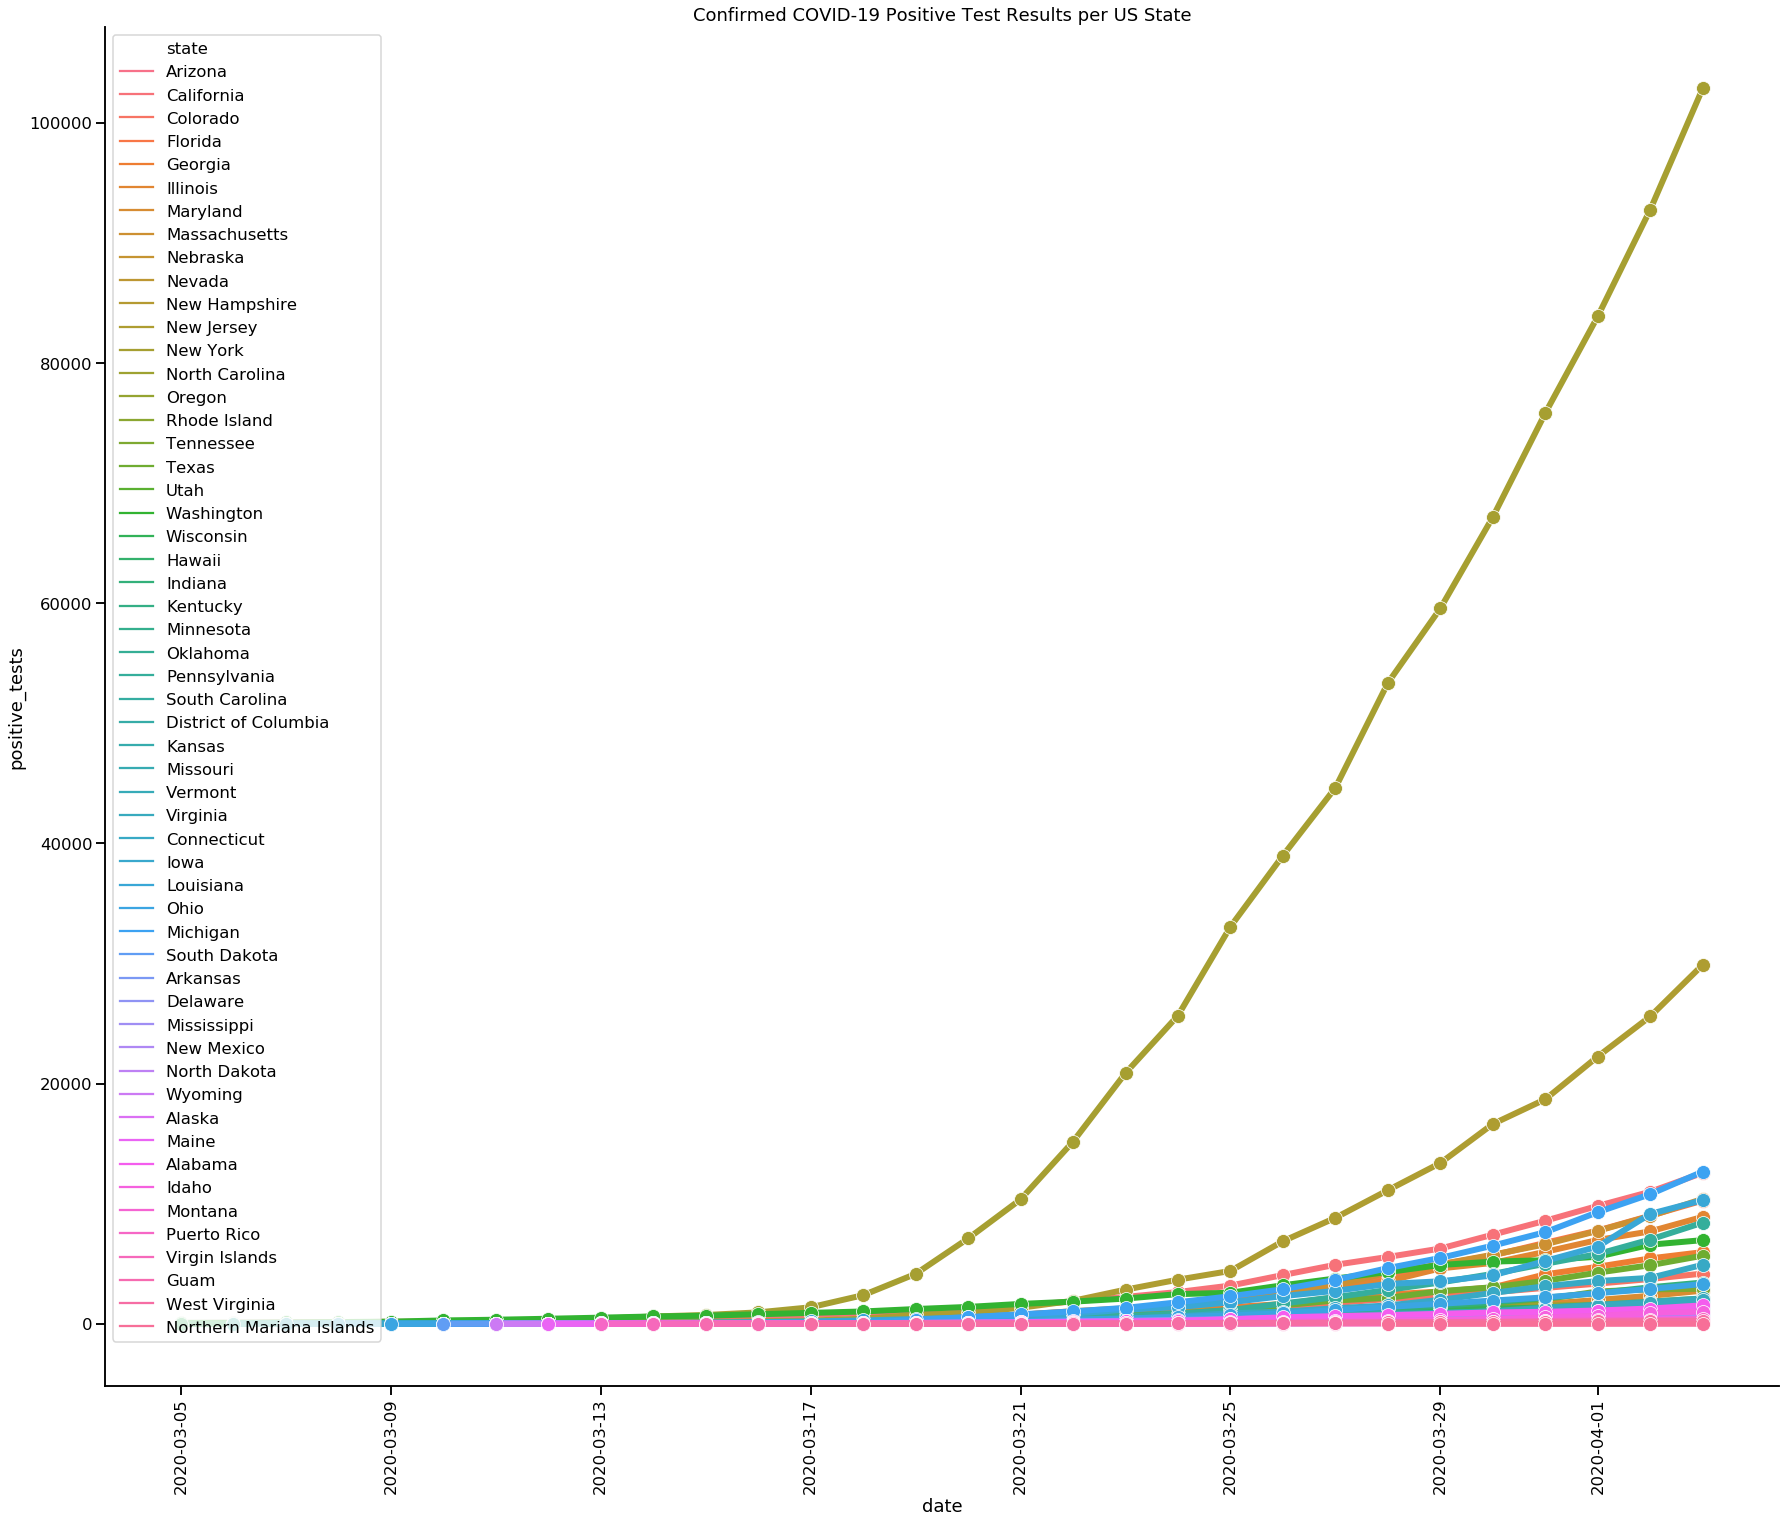

In [24]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df_states['date'], y=df_states['positive_tests'], hue=df_states['state'], linewidth=6, markersize=14, marker='o', ci=False)
plt.title(f'Confirmed COVID-19 Positive Test Results per US State')
plt.xticks(rotation=90);
sns.despine()

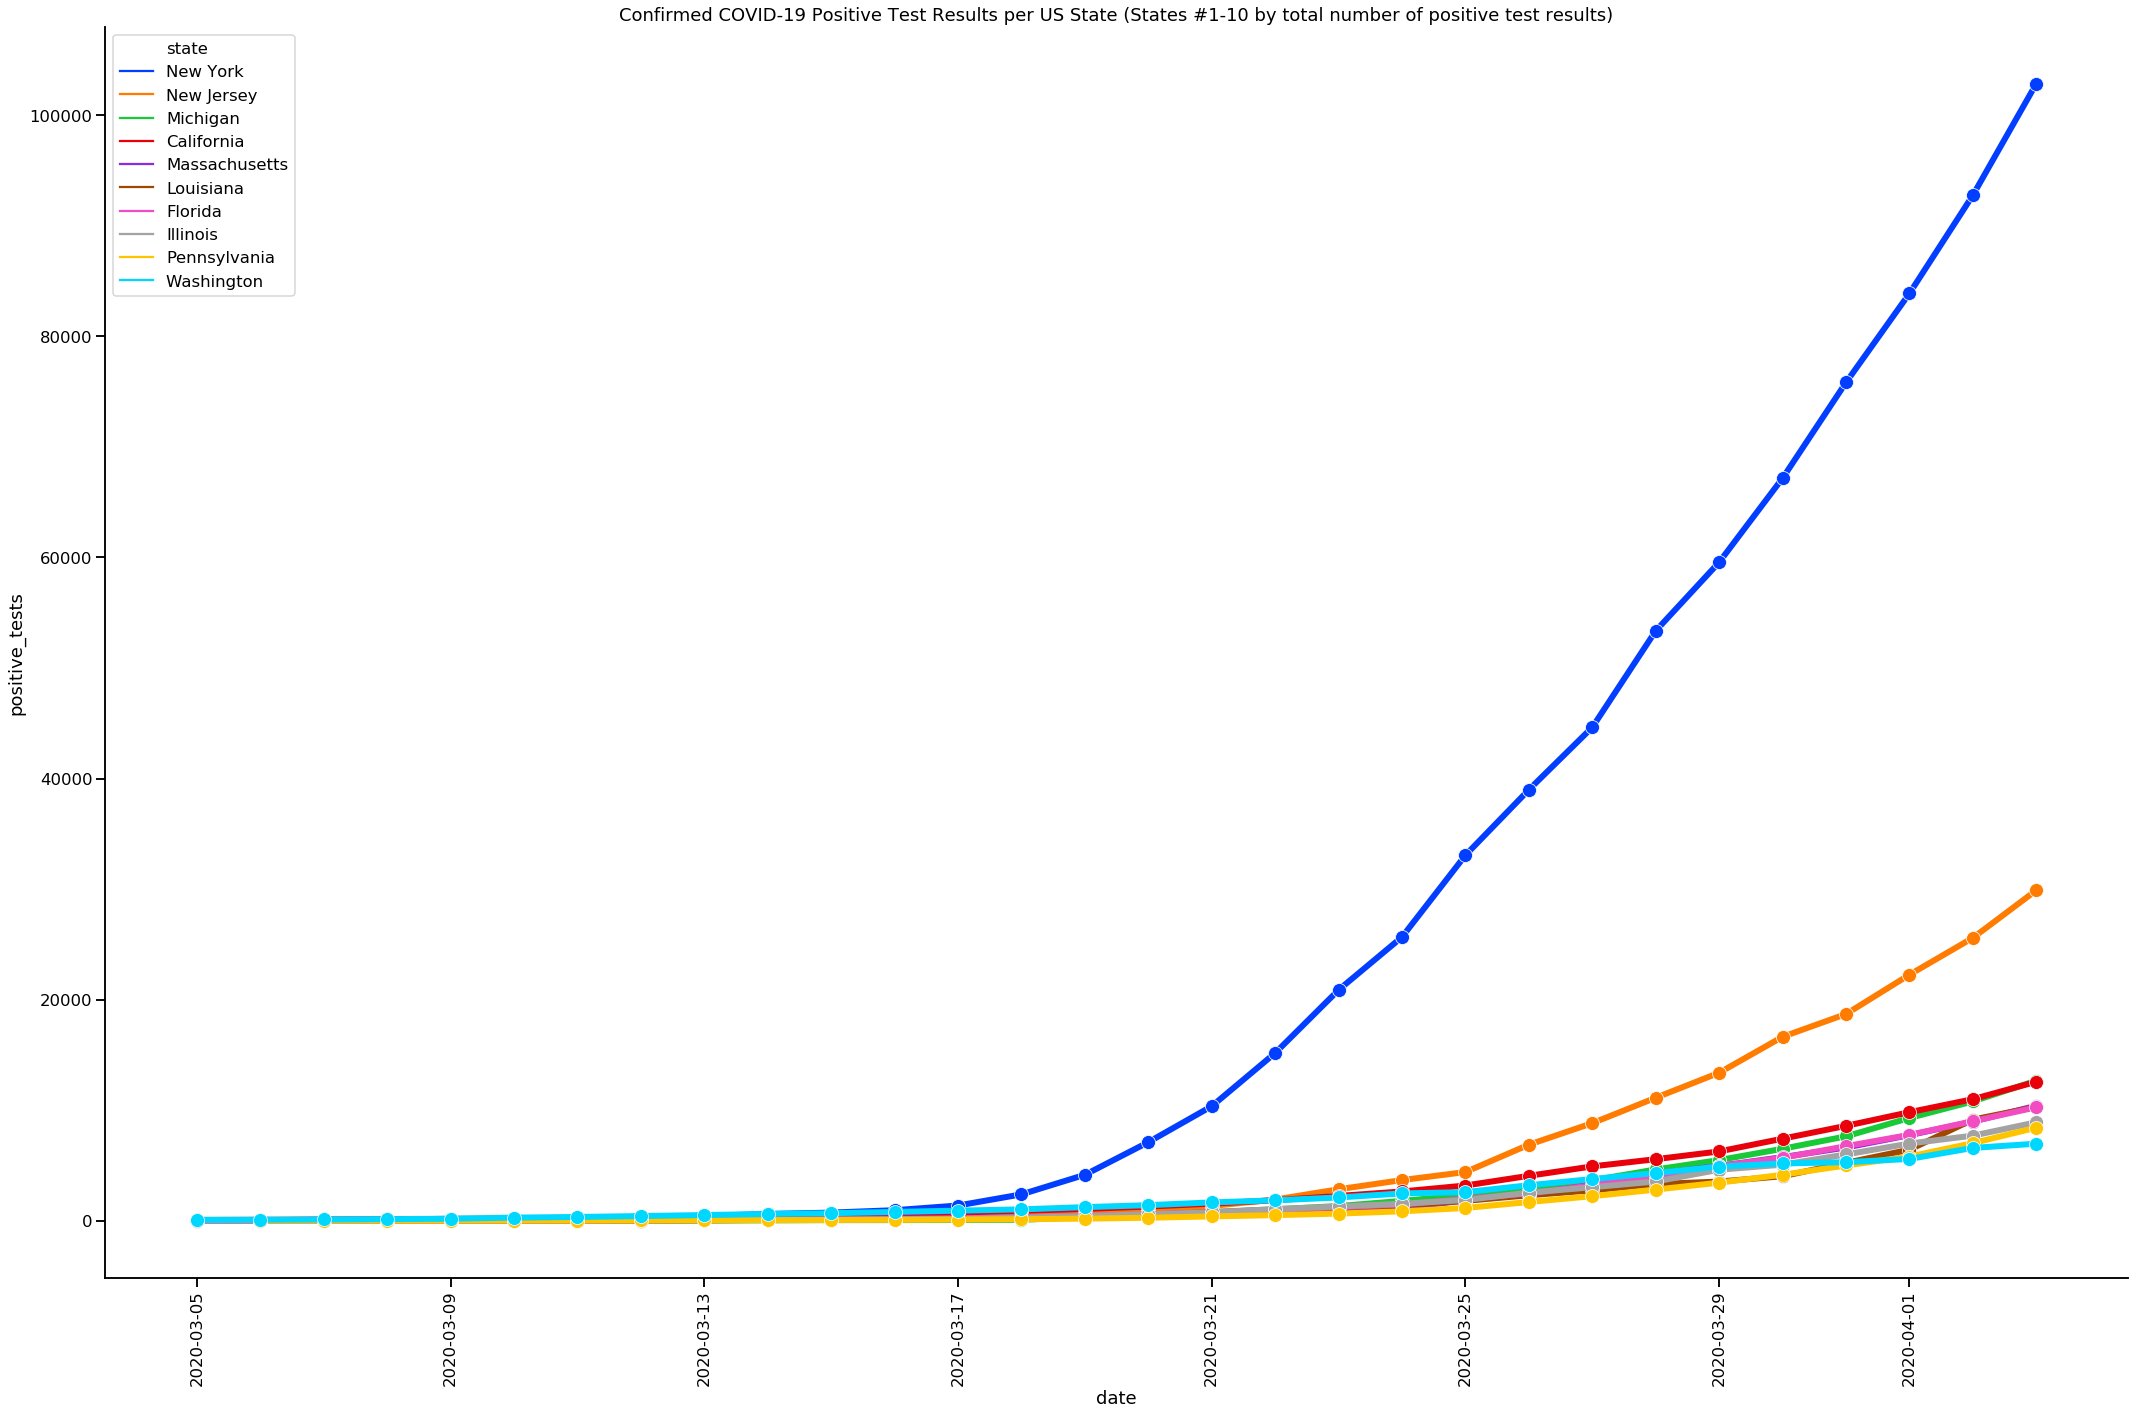

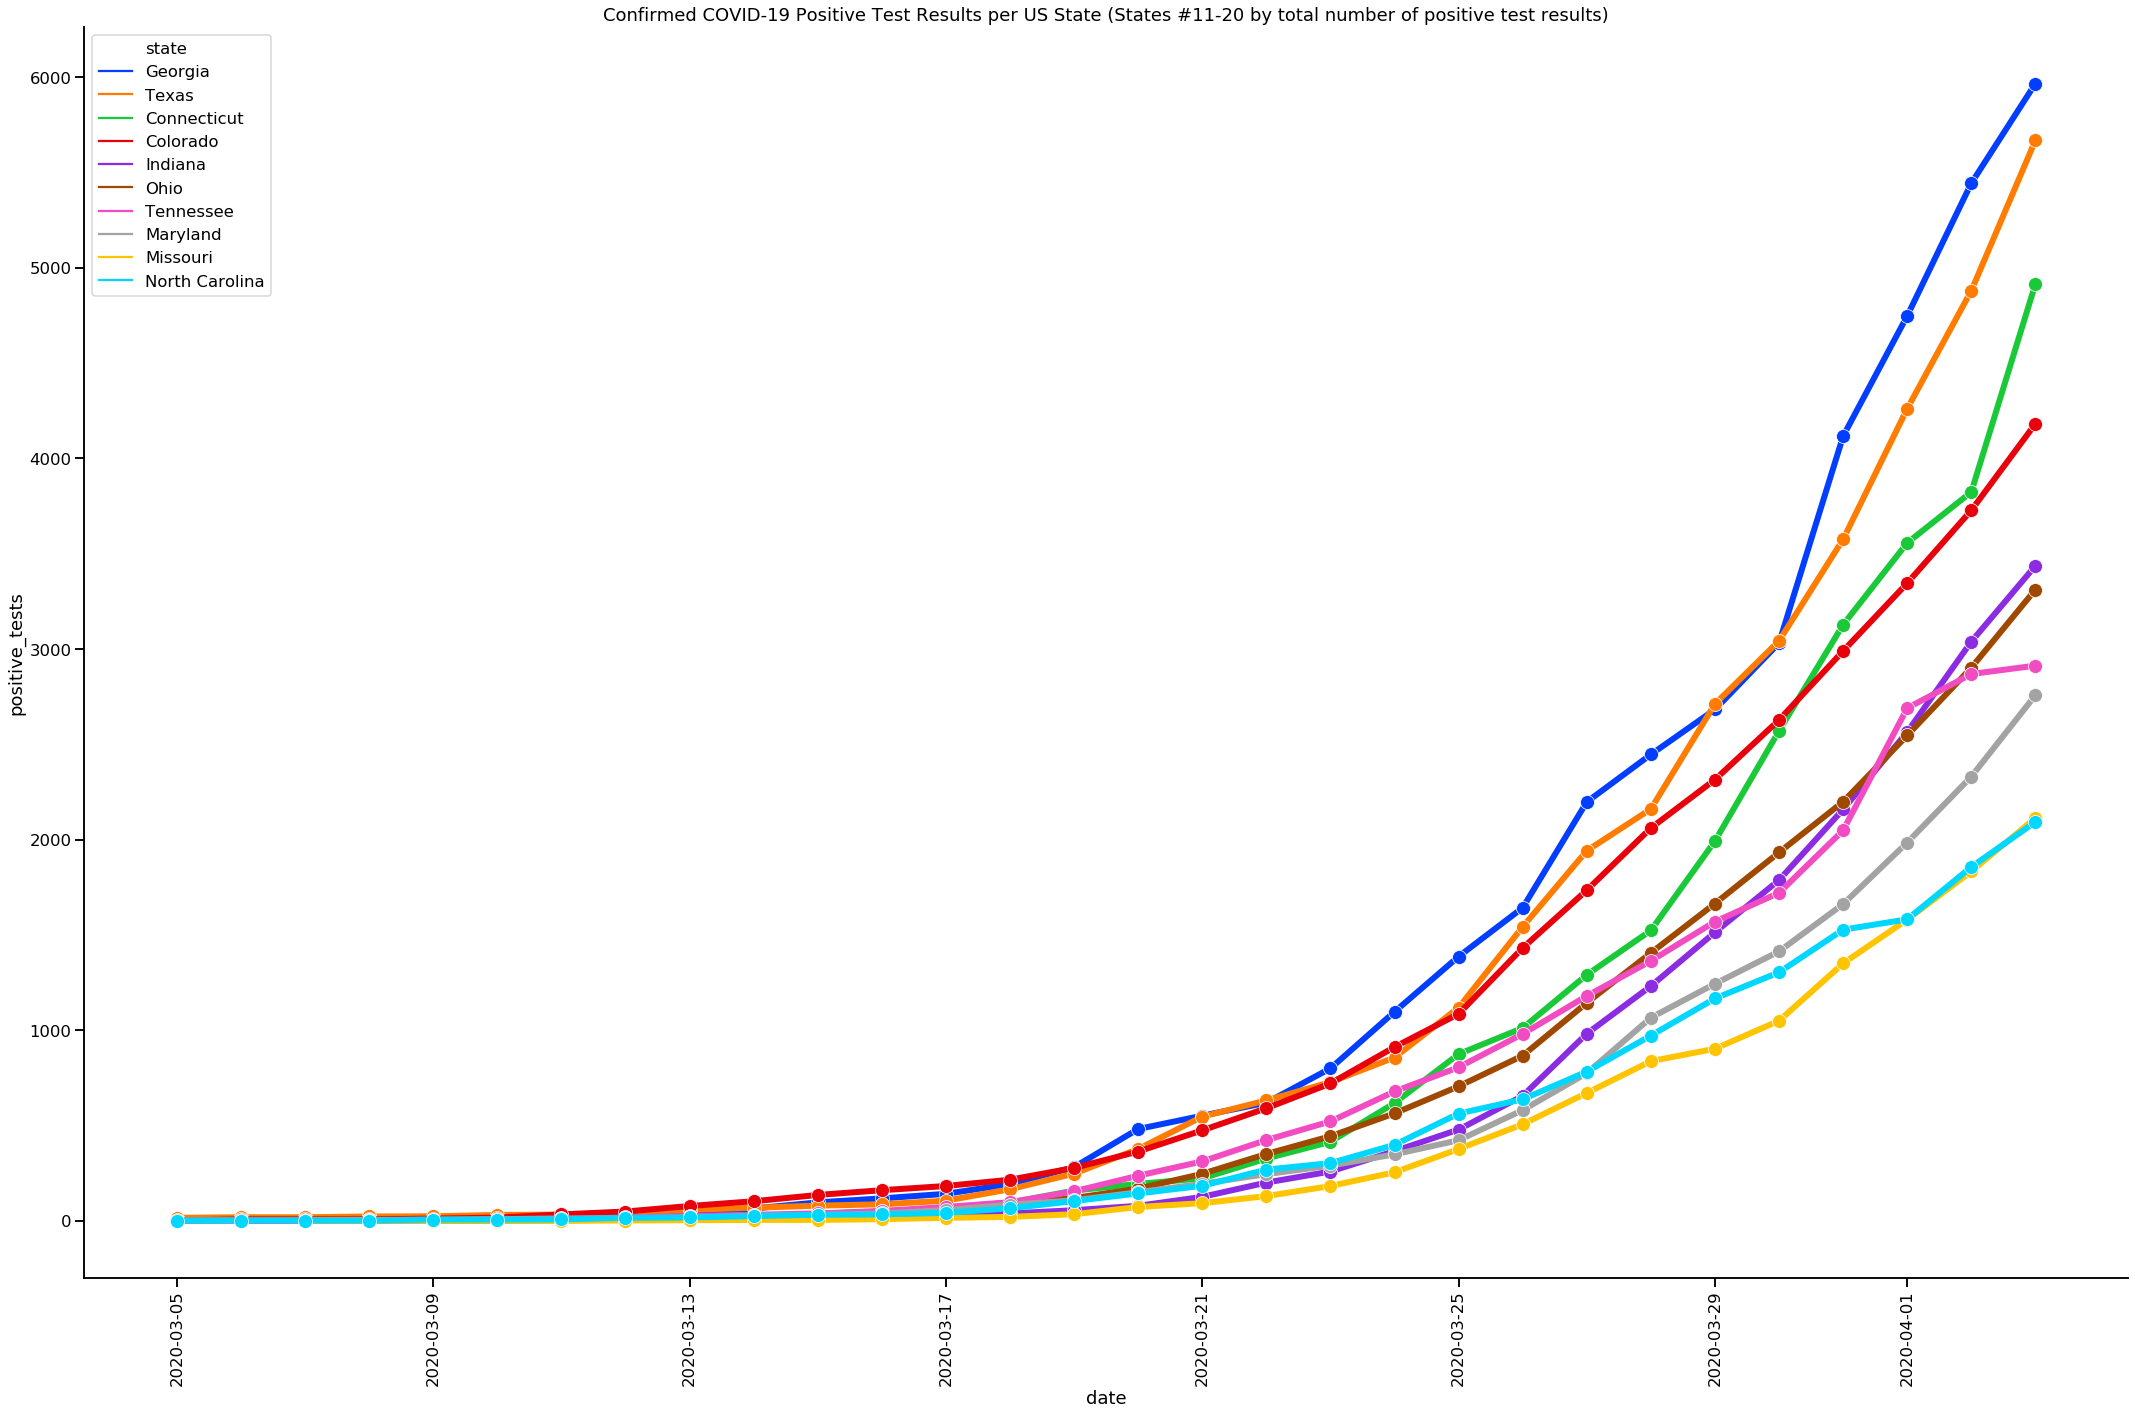

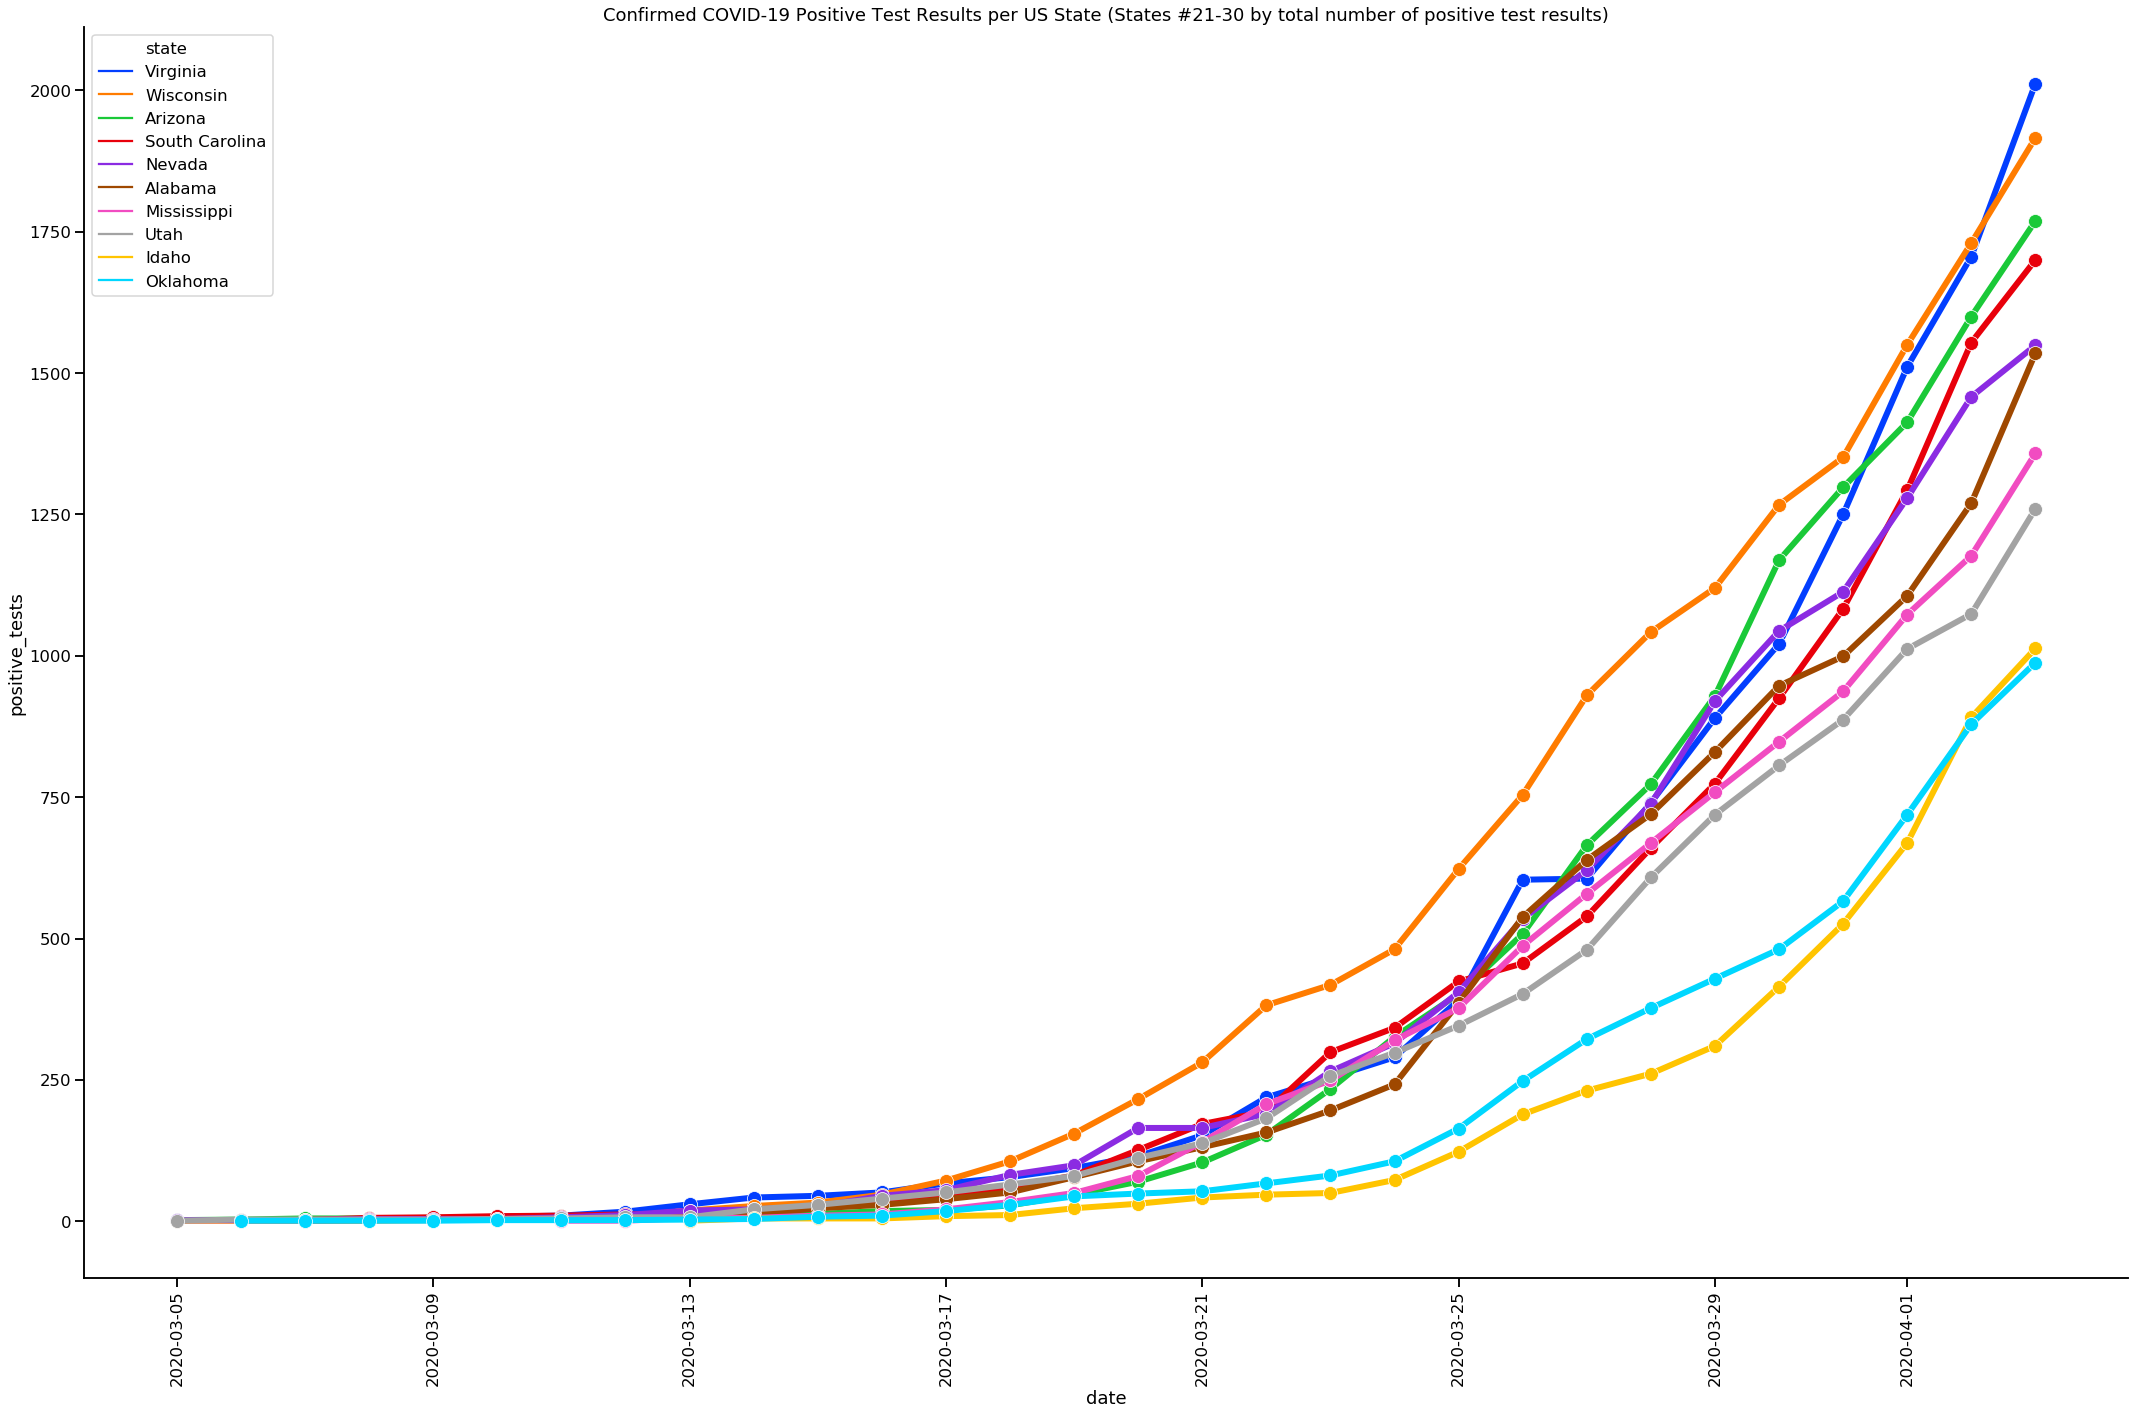

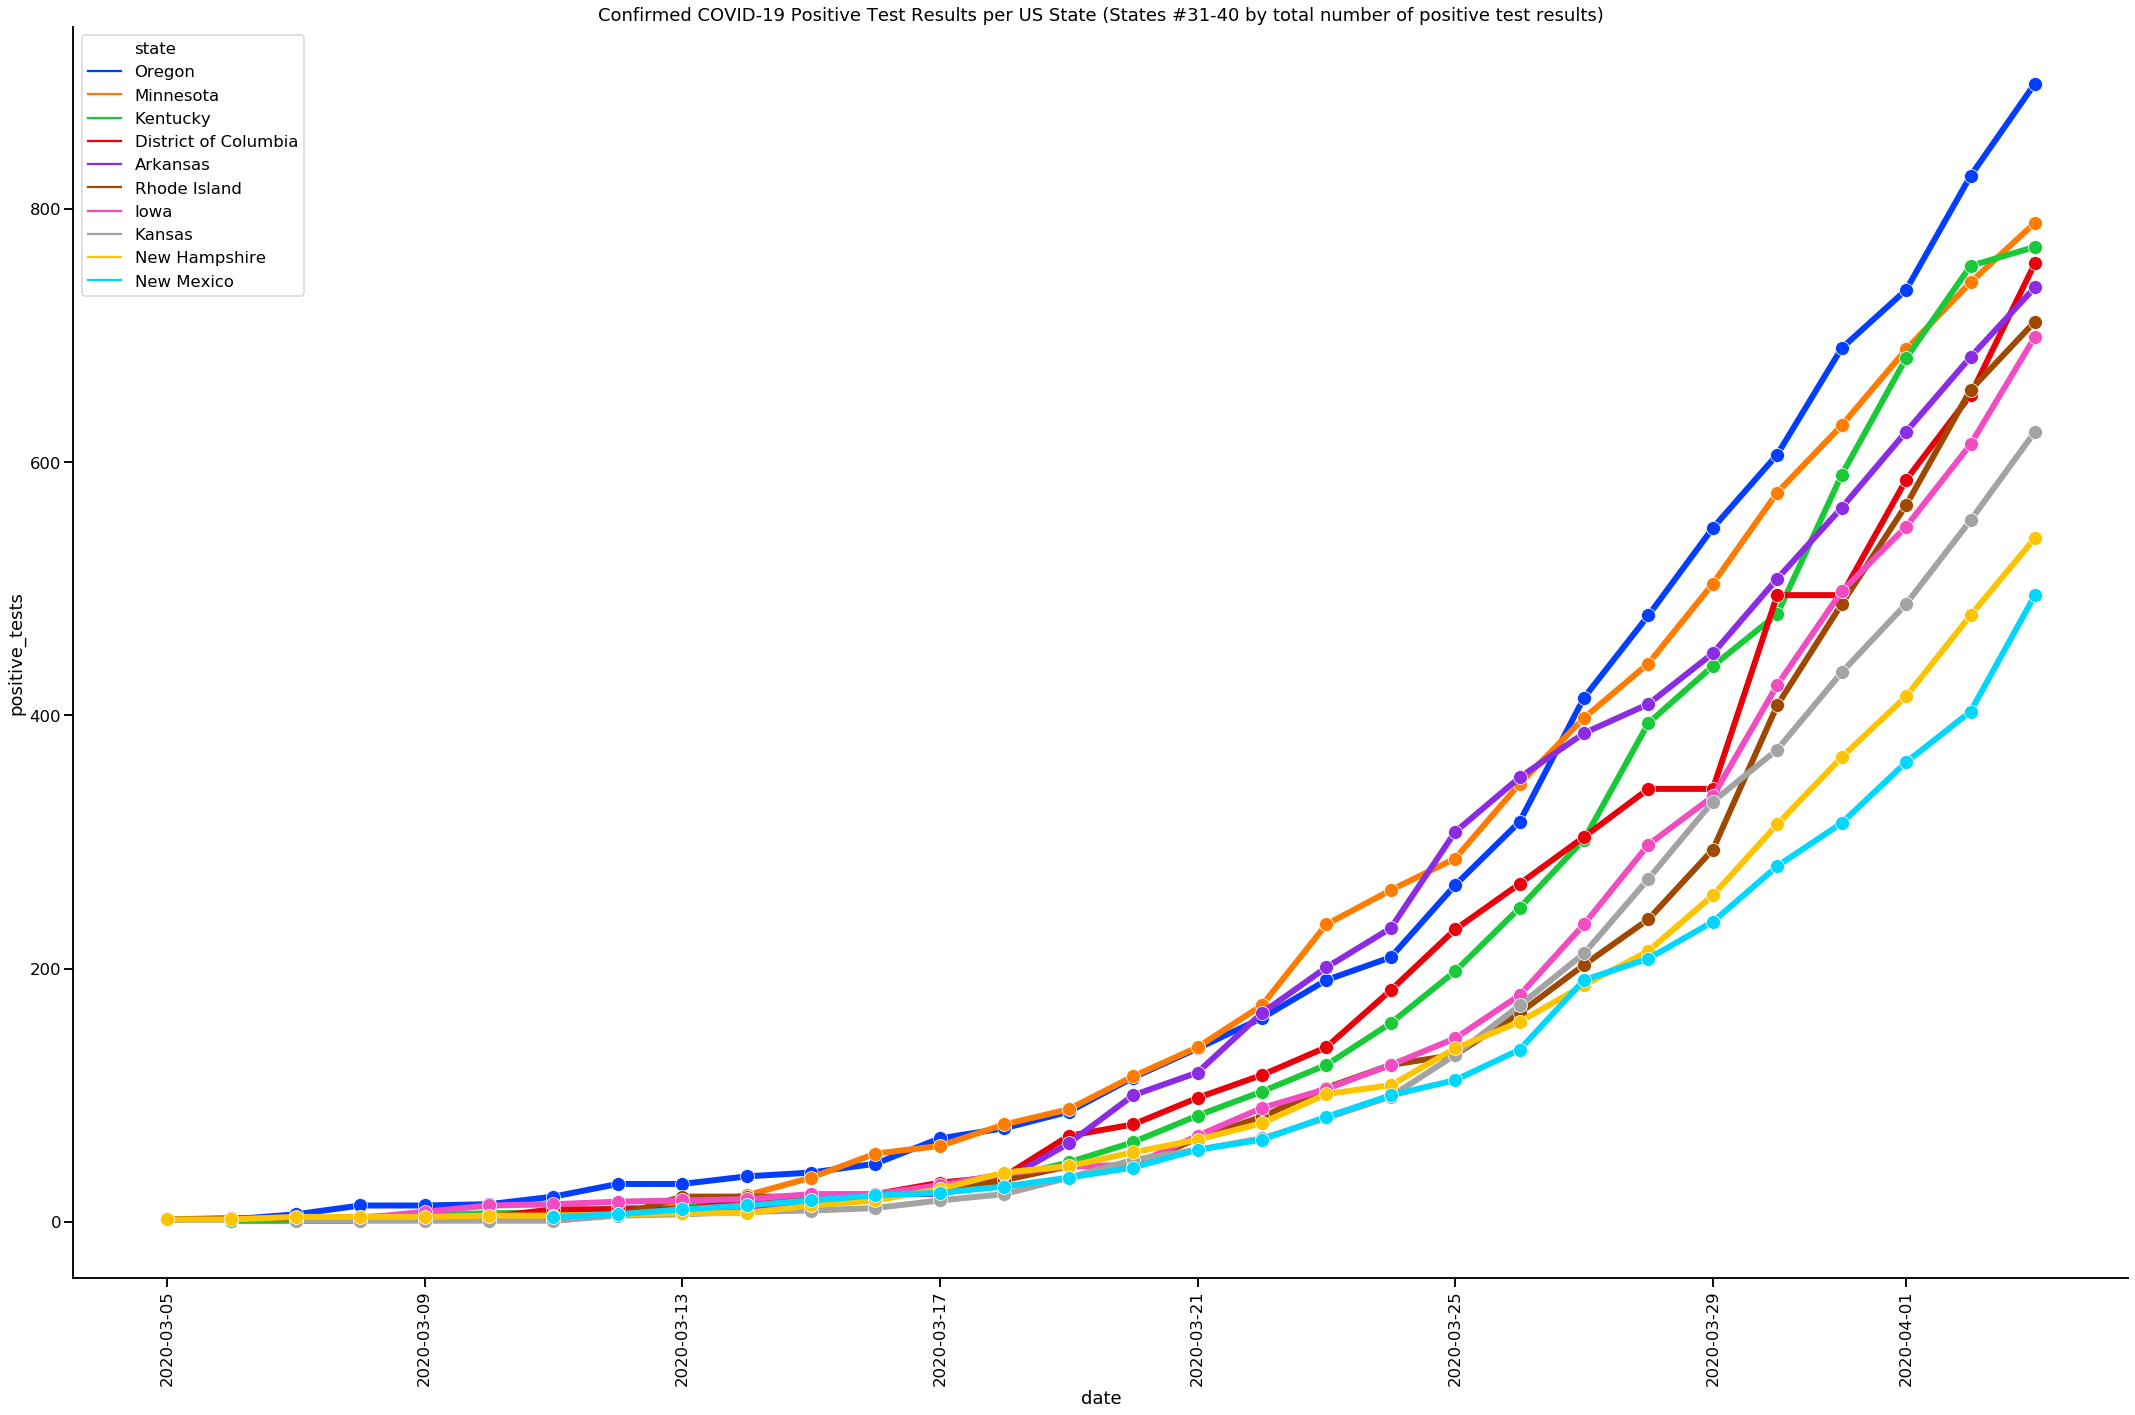

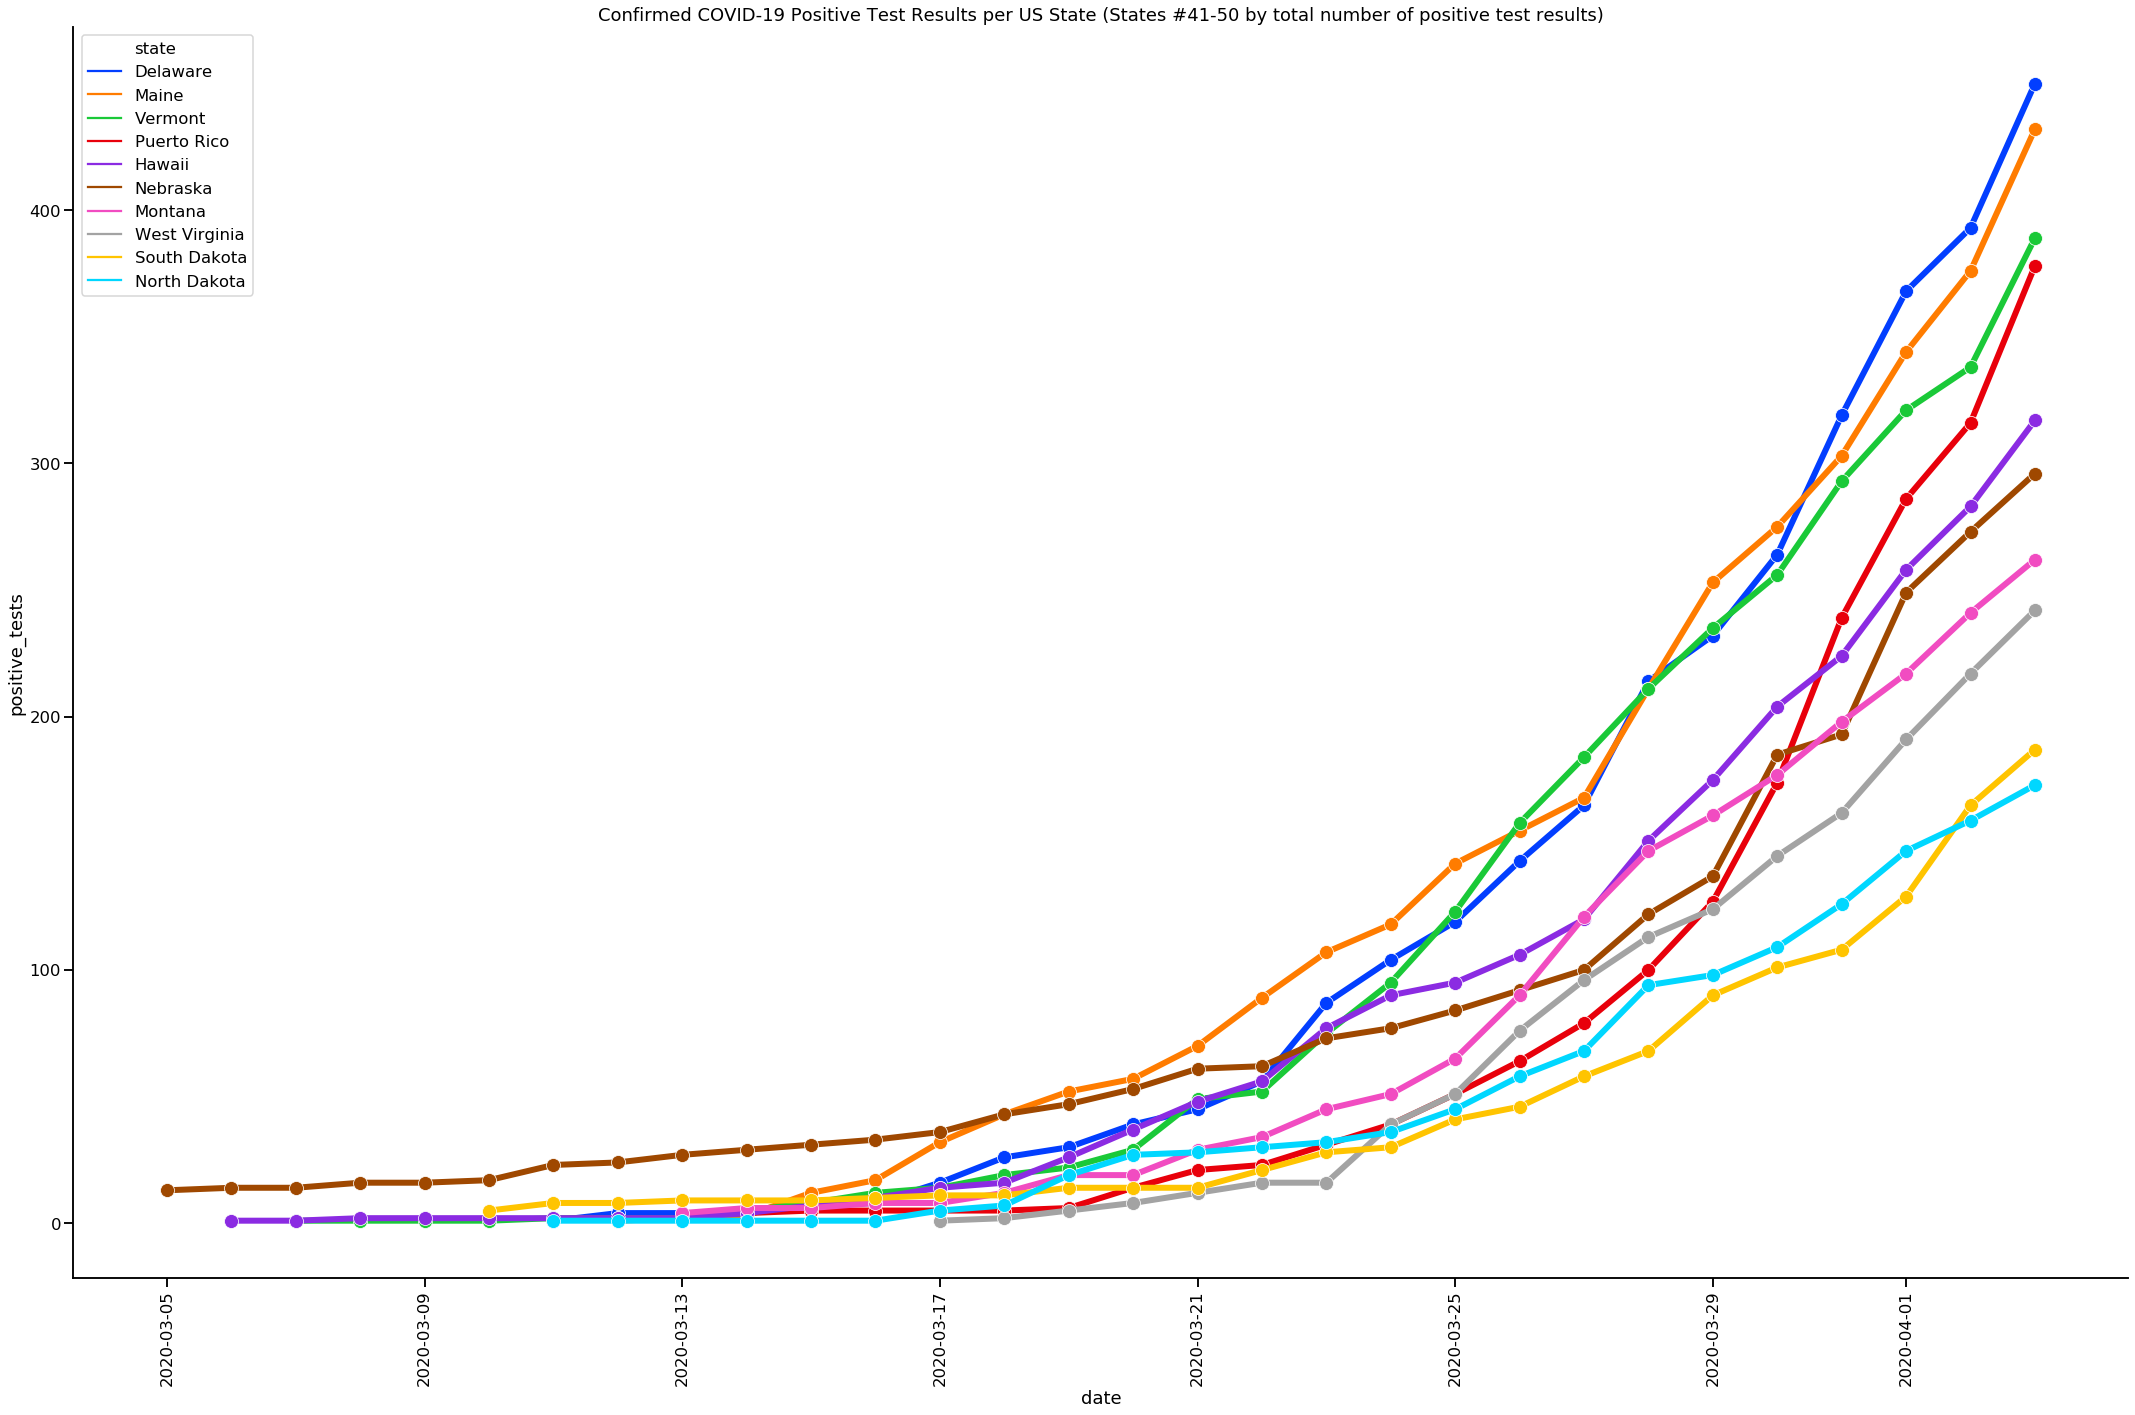

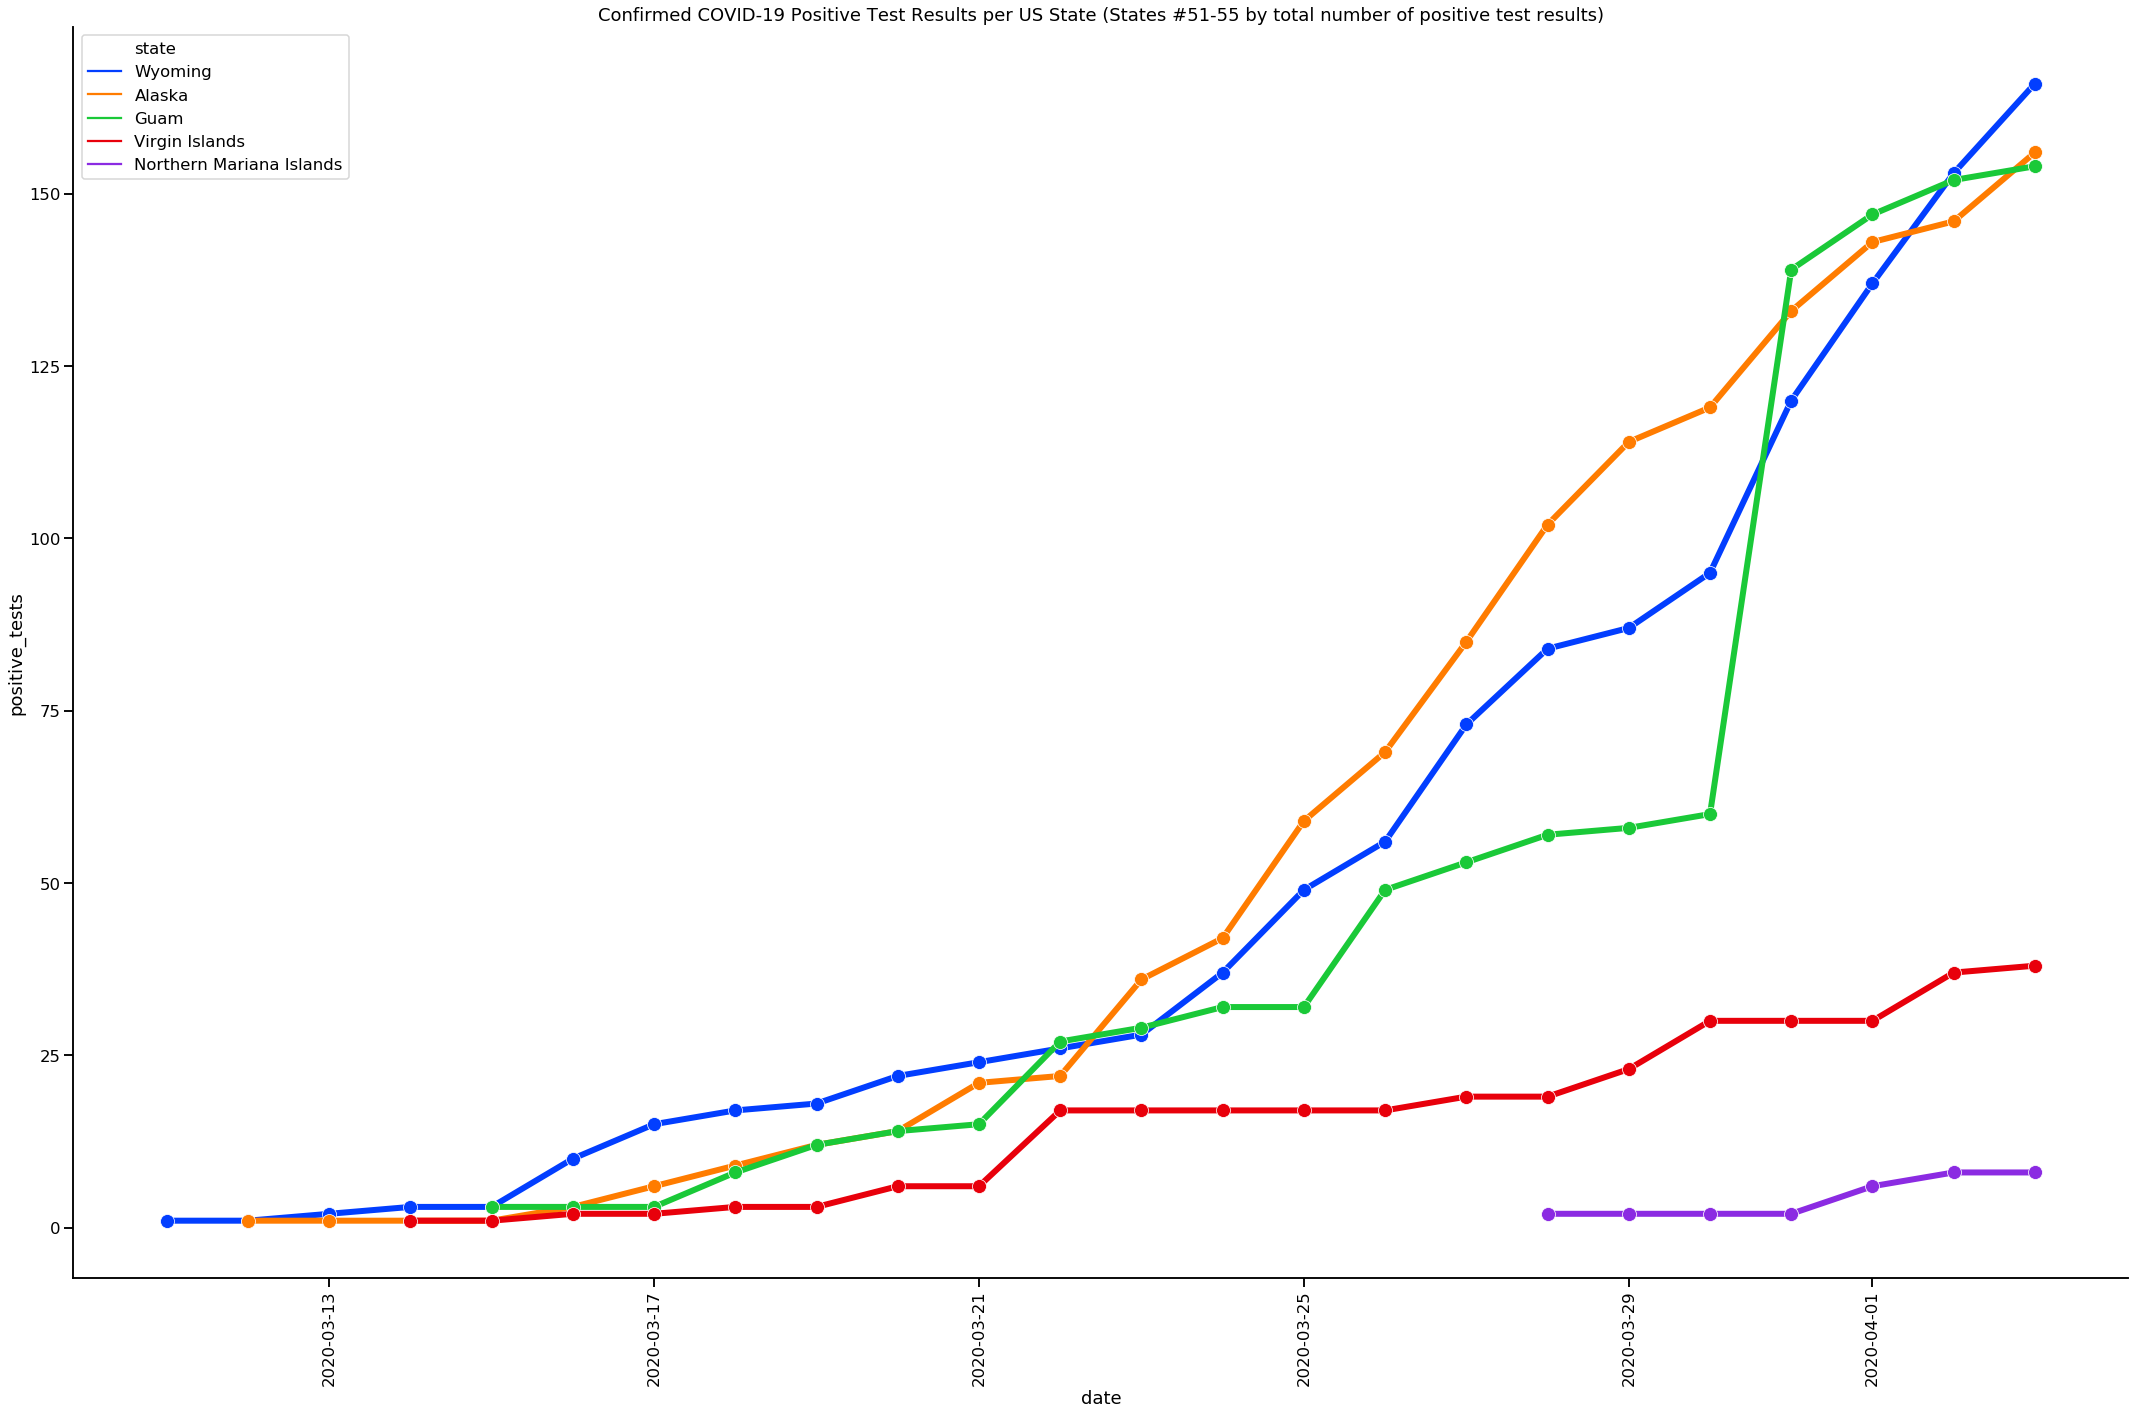

In [25]:
for i, group in enumerate(state_groups):
    states_to_plot = df_states.loc[df_states['state'].isin(group)].sort_values(by='positive_tests', ascending=False)
    
    plt.figure(figsize=(30,20))
    sns.lineplot(x=states_to_plot['date'], y=states_to_plot['positive_tests'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False)
    plt.xticks(rotation=90);
    plt.title(f'Confirmed COVID-19 Positive Test Results per US State (States #{i*group_size+1}-{i*group_size+len(group)} by total number of positive test results)')
    sns.despine()
    plt.tight_layout()
    plt.show()

In [26]:
# states_2_thru_10 = state_groups[0].copy()
# states_3_thru_10 = state_groups[0].copy()

# del(states_2_thru_10[0])
# del(states_3_thru_10[0:2])

# print(state_groups[0])
# print(states_2_thru_10)
# print(states_3_thru_10)

In [27]:
# states_to_plot = df_states.loc[df_states['state'].isin(states_2_thru_10)].sort_values(by='positive_tests', ascending=False)

# plt.figure(figsize=(30,20))
# sns.lineplot(x=states_to_plot['date'], y=states_to_plot['positive_tests'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False)
# plt.xticks(rotation=90);
# plt.title(f'Confirmed COVID-19 Positive Test Results per US State (States #2-10 by total number of positive test results)')
# plt.tight_layout()
# sns.despine()
# plt.show()

In [28]:
# states_to_plot = df_states.loc[df_states['state'].isin(states_3_thru_10)].sort_values(by='positive_tests', ascending=False)

# plt.figure(figsize=(30,20))
# sns.lineplot(x=states_to_plot['date'], y=states_to_plot['positive_tests'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False)
# plt.xticks(rotation=90);
# plt.title(f'Confirmed COVID-19 Positive Test Results per US State (States #3-10 by total number of positive test results)')
# plt.tight_layout()
# sns.despine()
# plt.show()

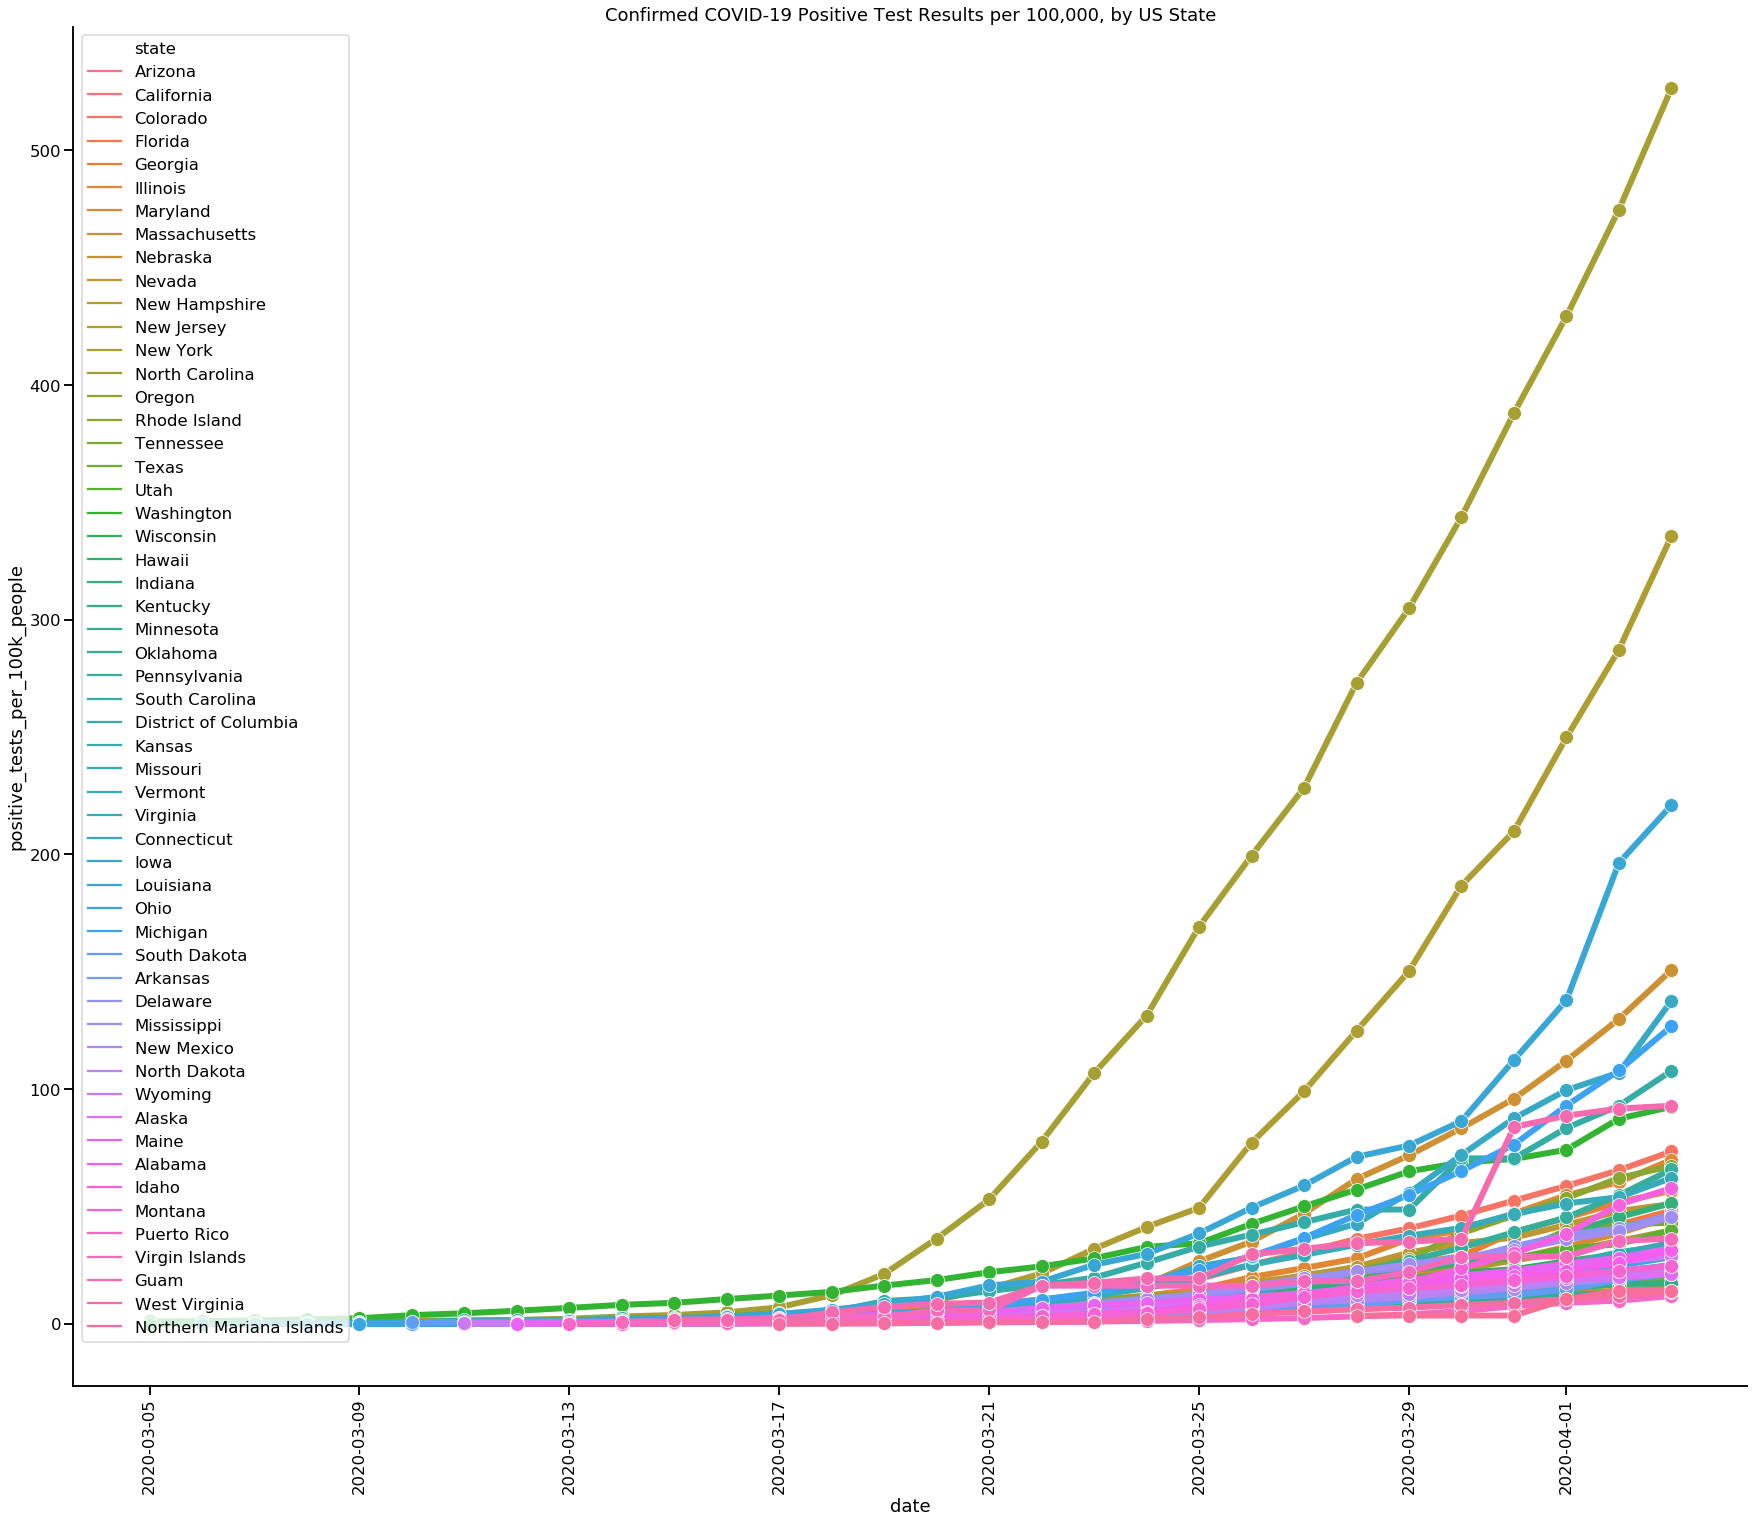

In [29]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df_states['date'], y=df_states['positive_tests_per_100k_people'], hue=df_states['state'], linewidth=6, markersize=14, marker='o', ci=False)
plt.title(f'Confirmed COVID-19 Positive Test Results per 100,000, by US State')
plt.xticks(rotation=90);
sns.despine()

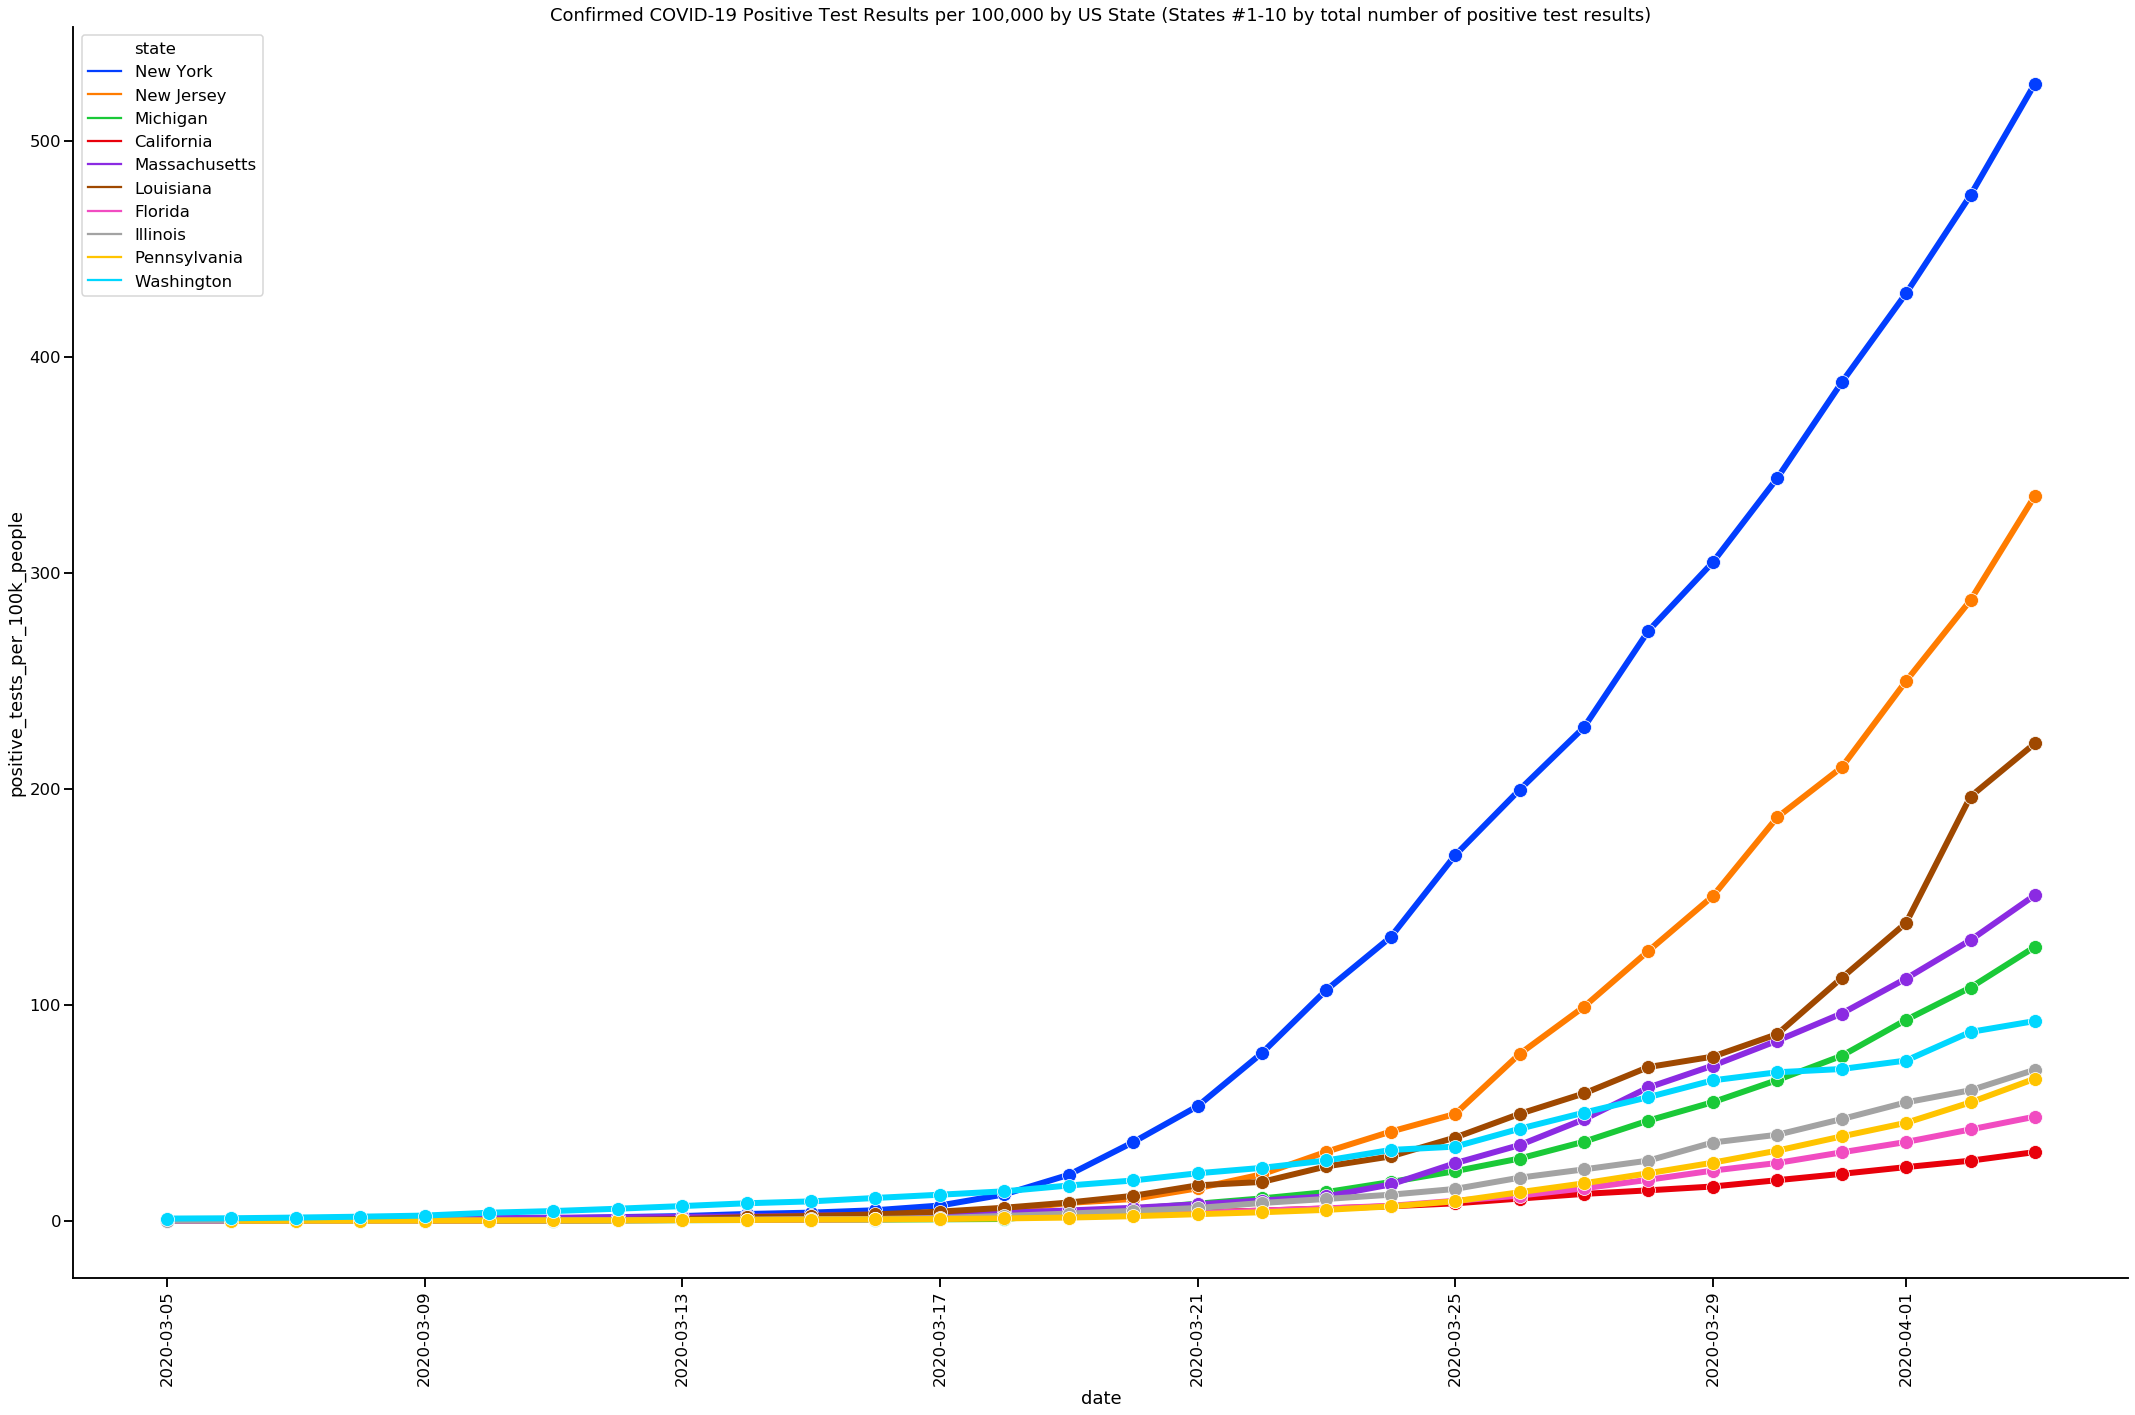

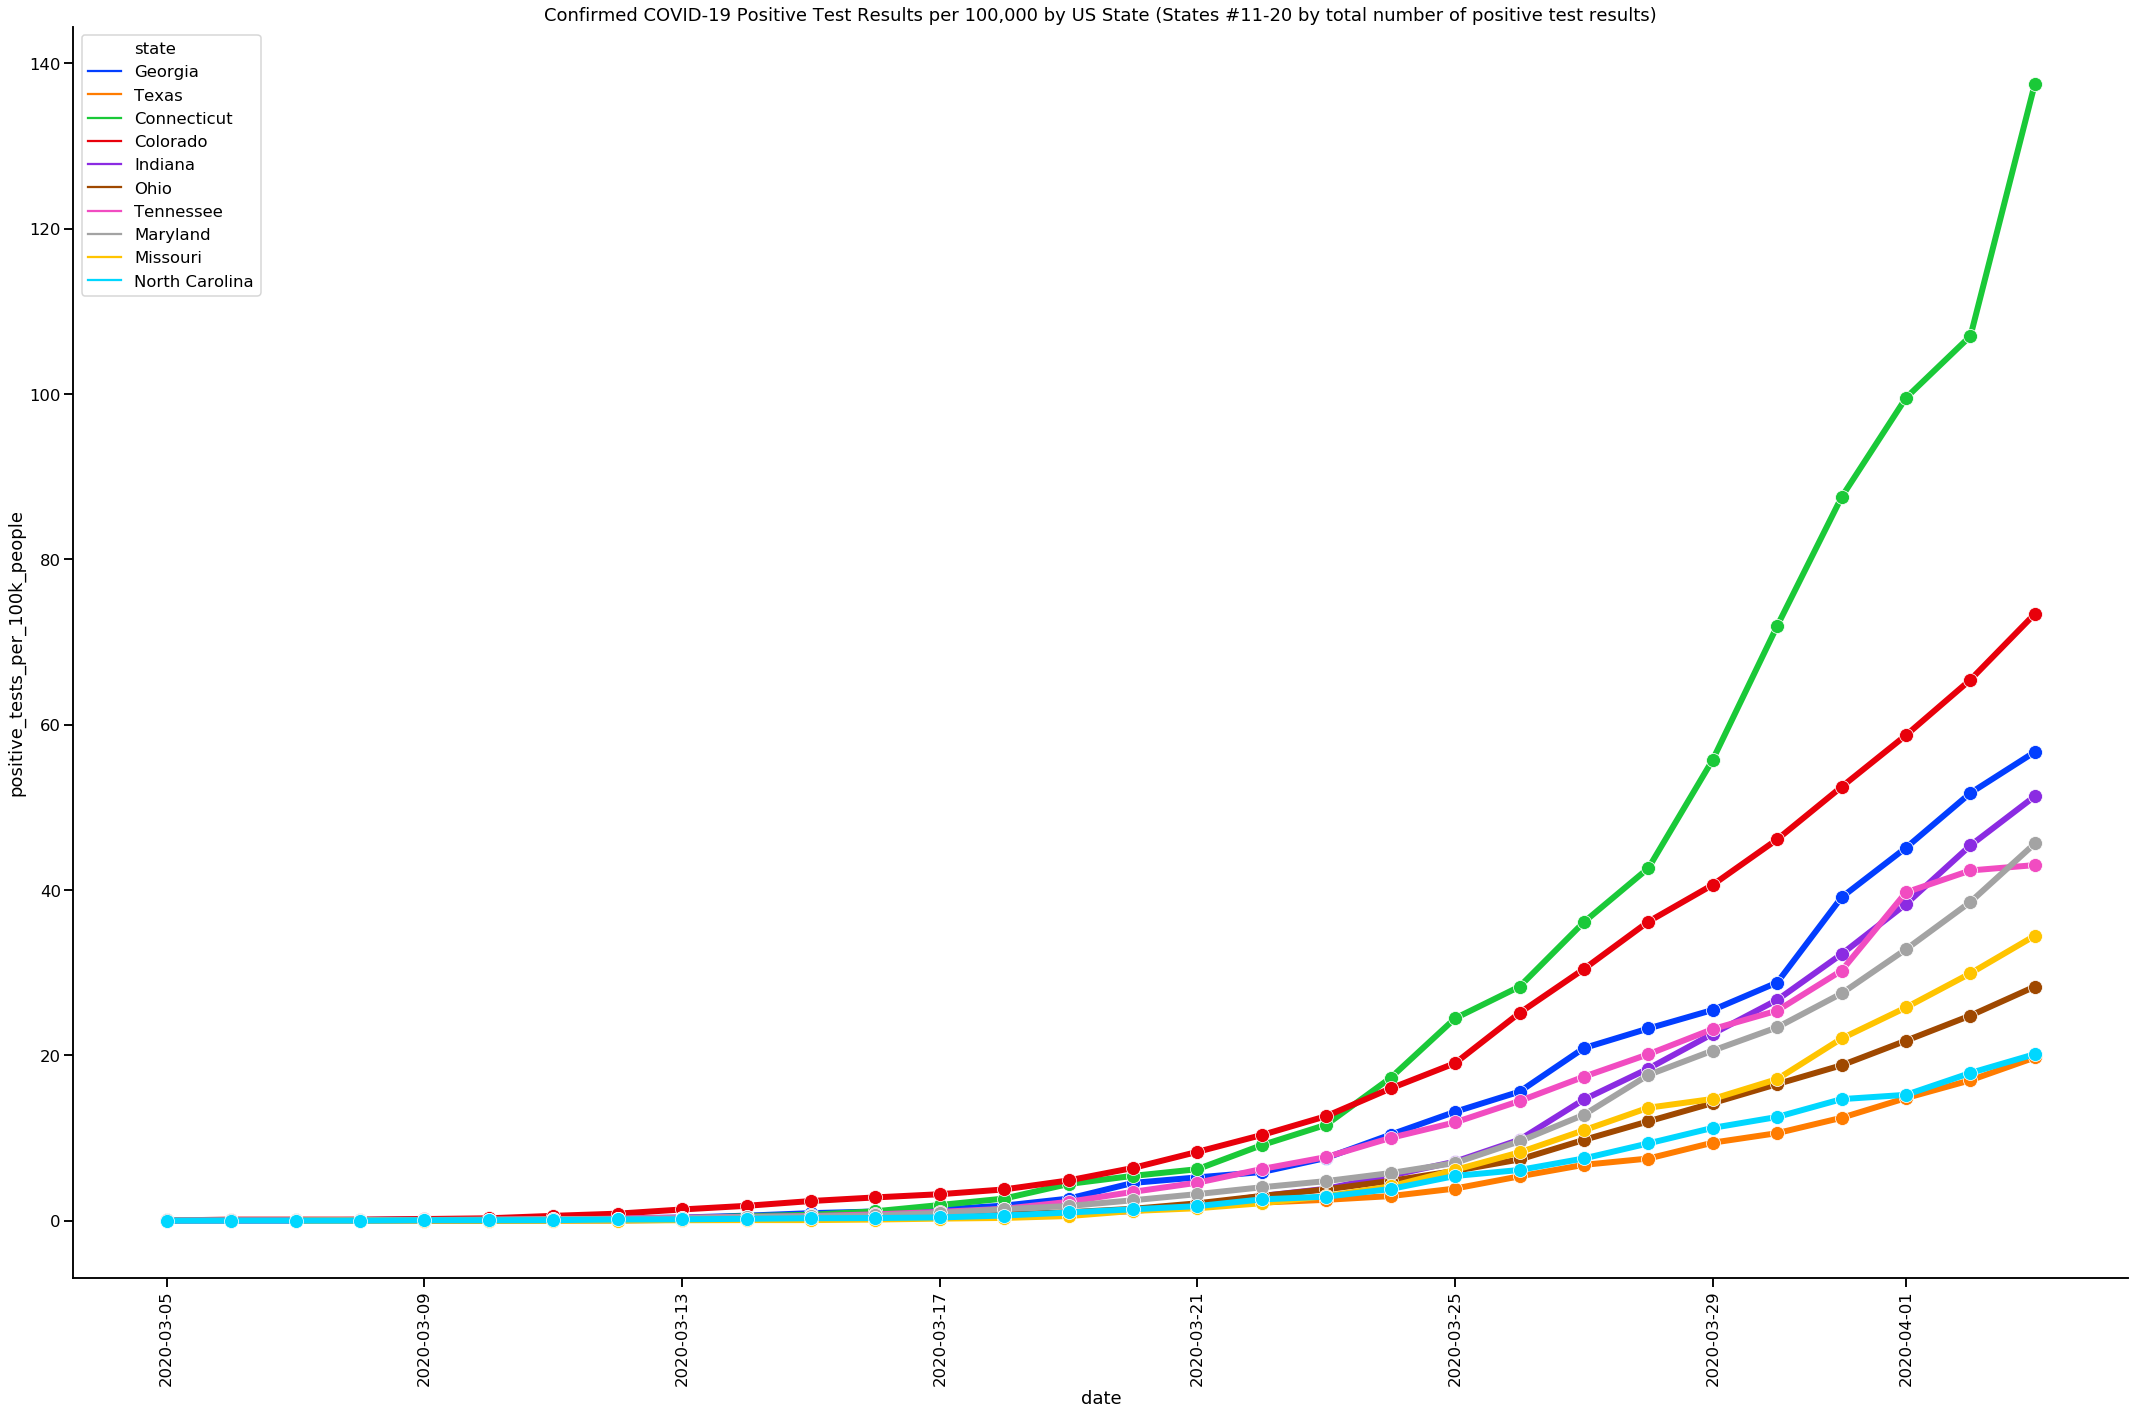

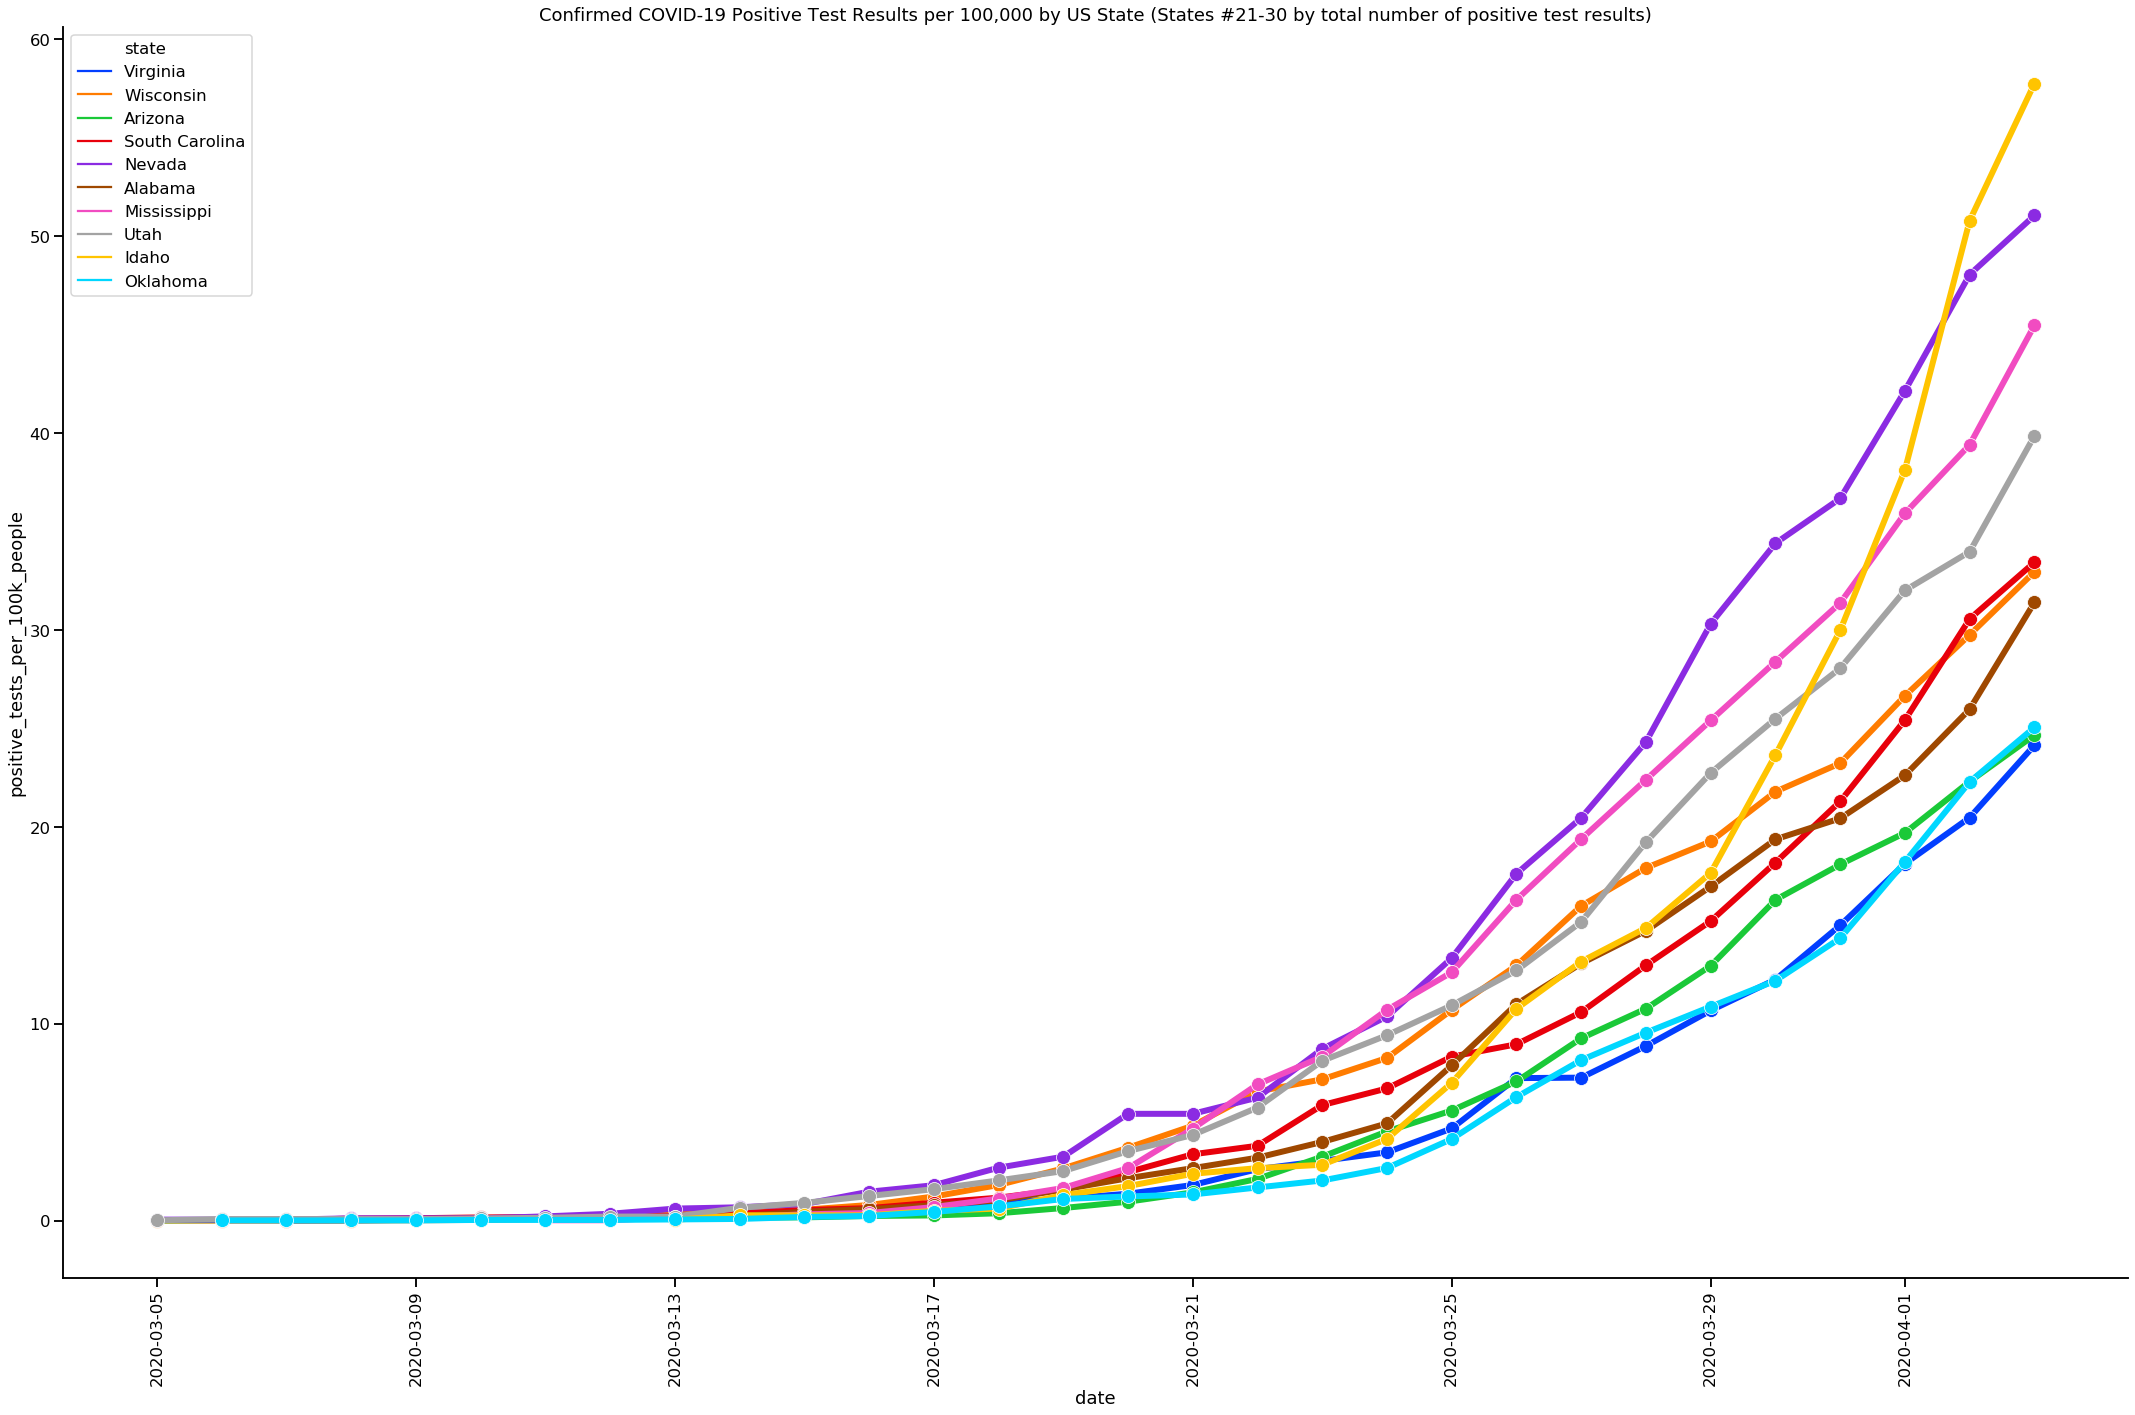

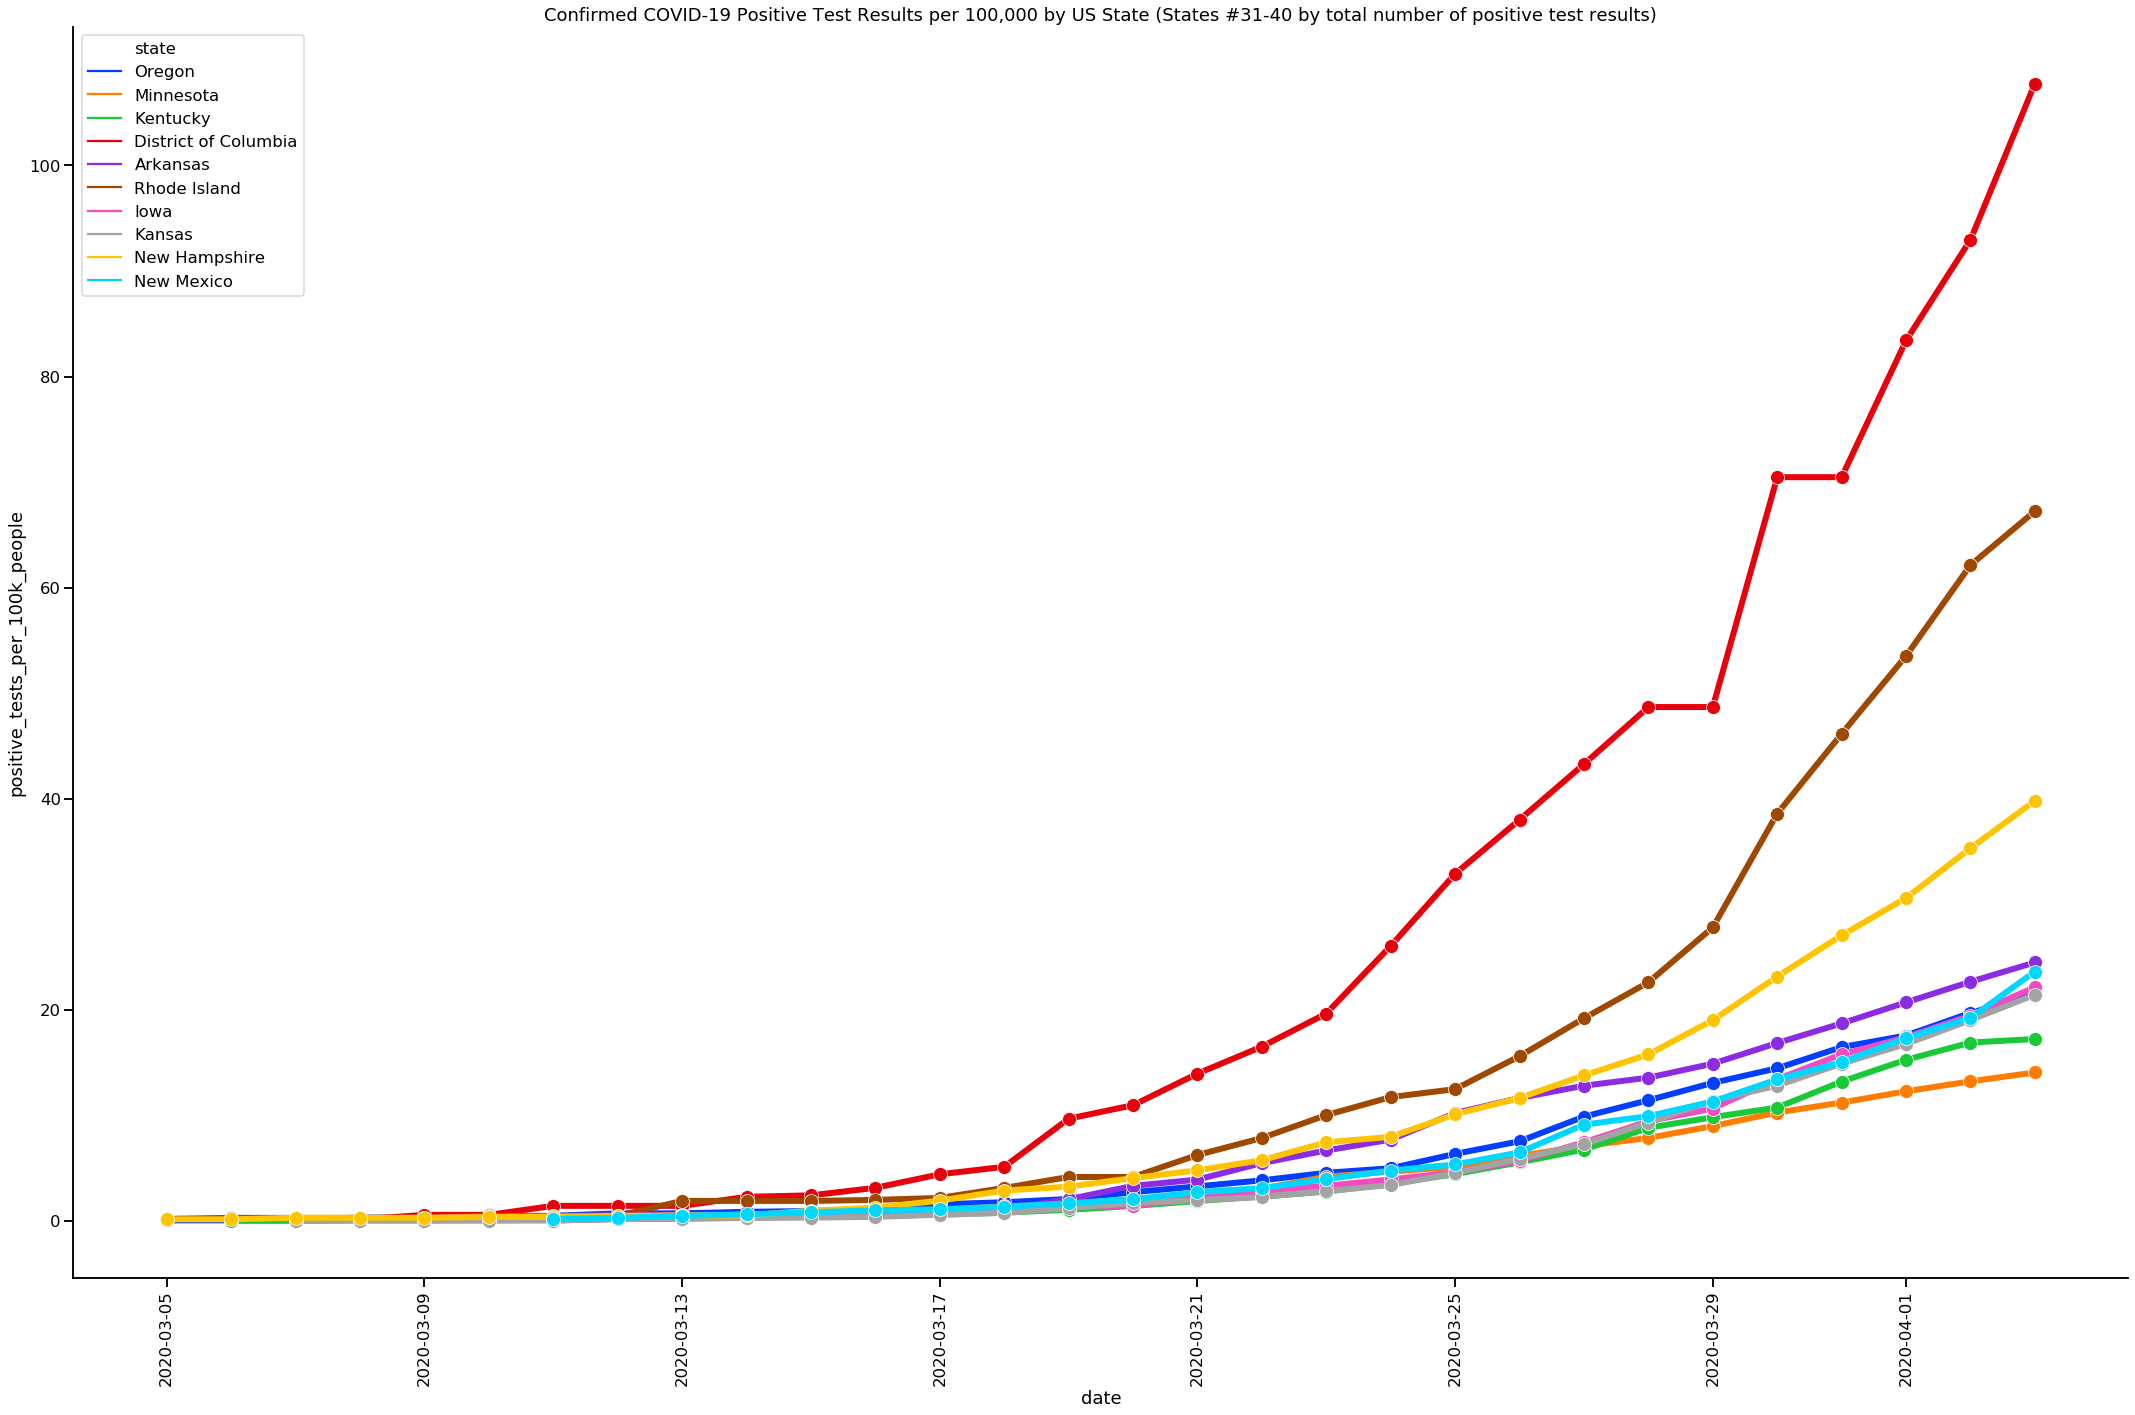

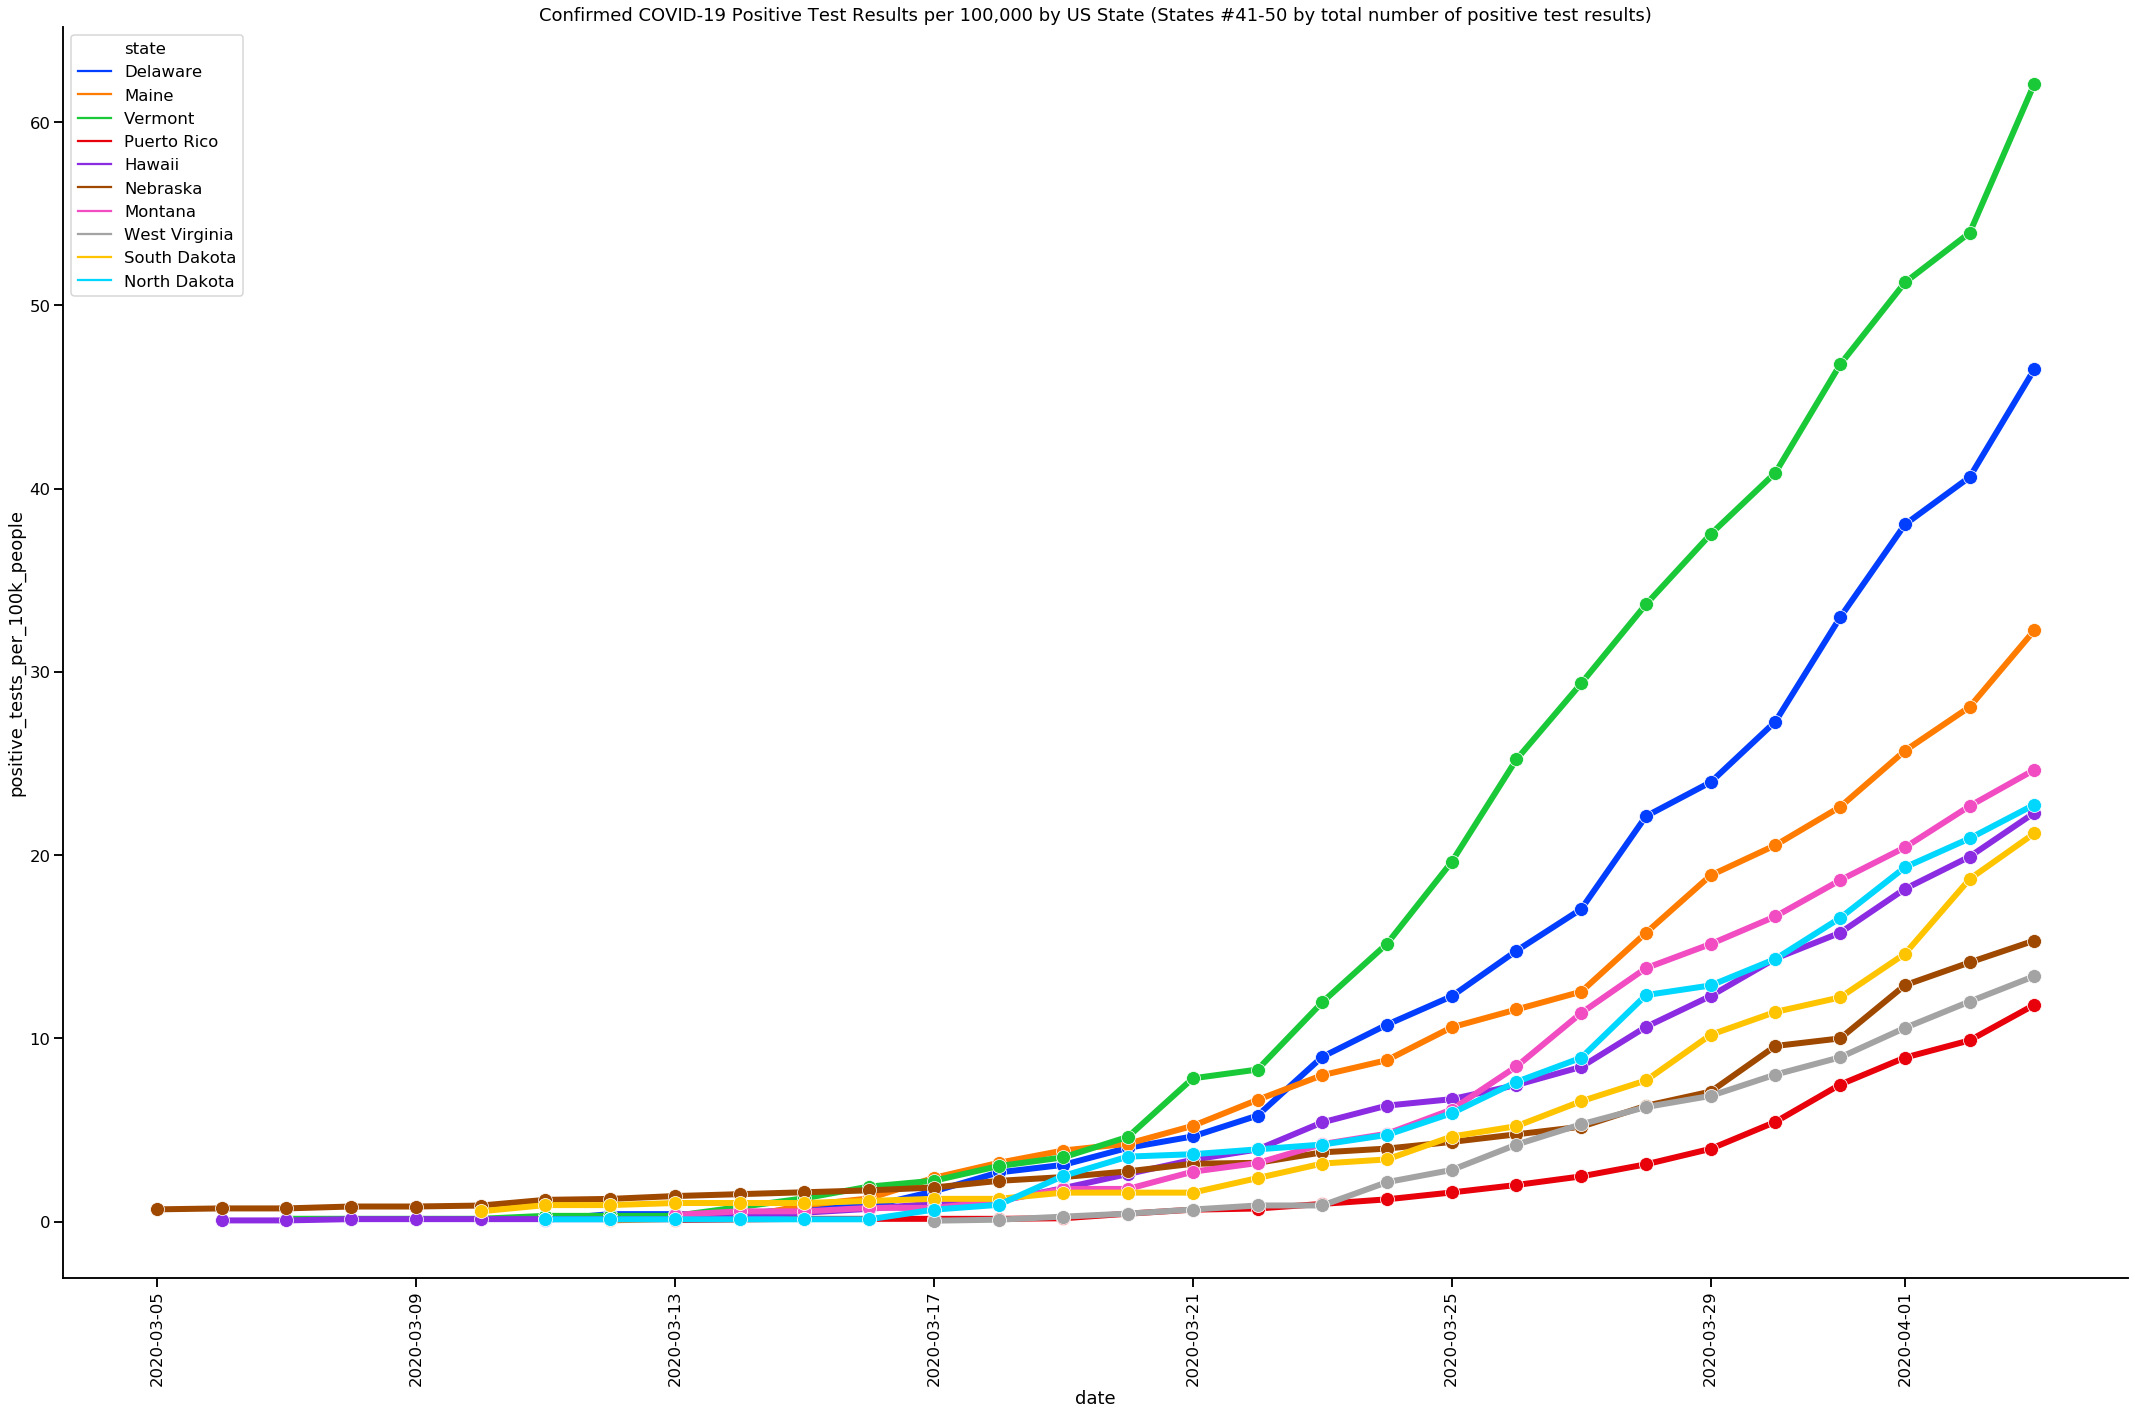

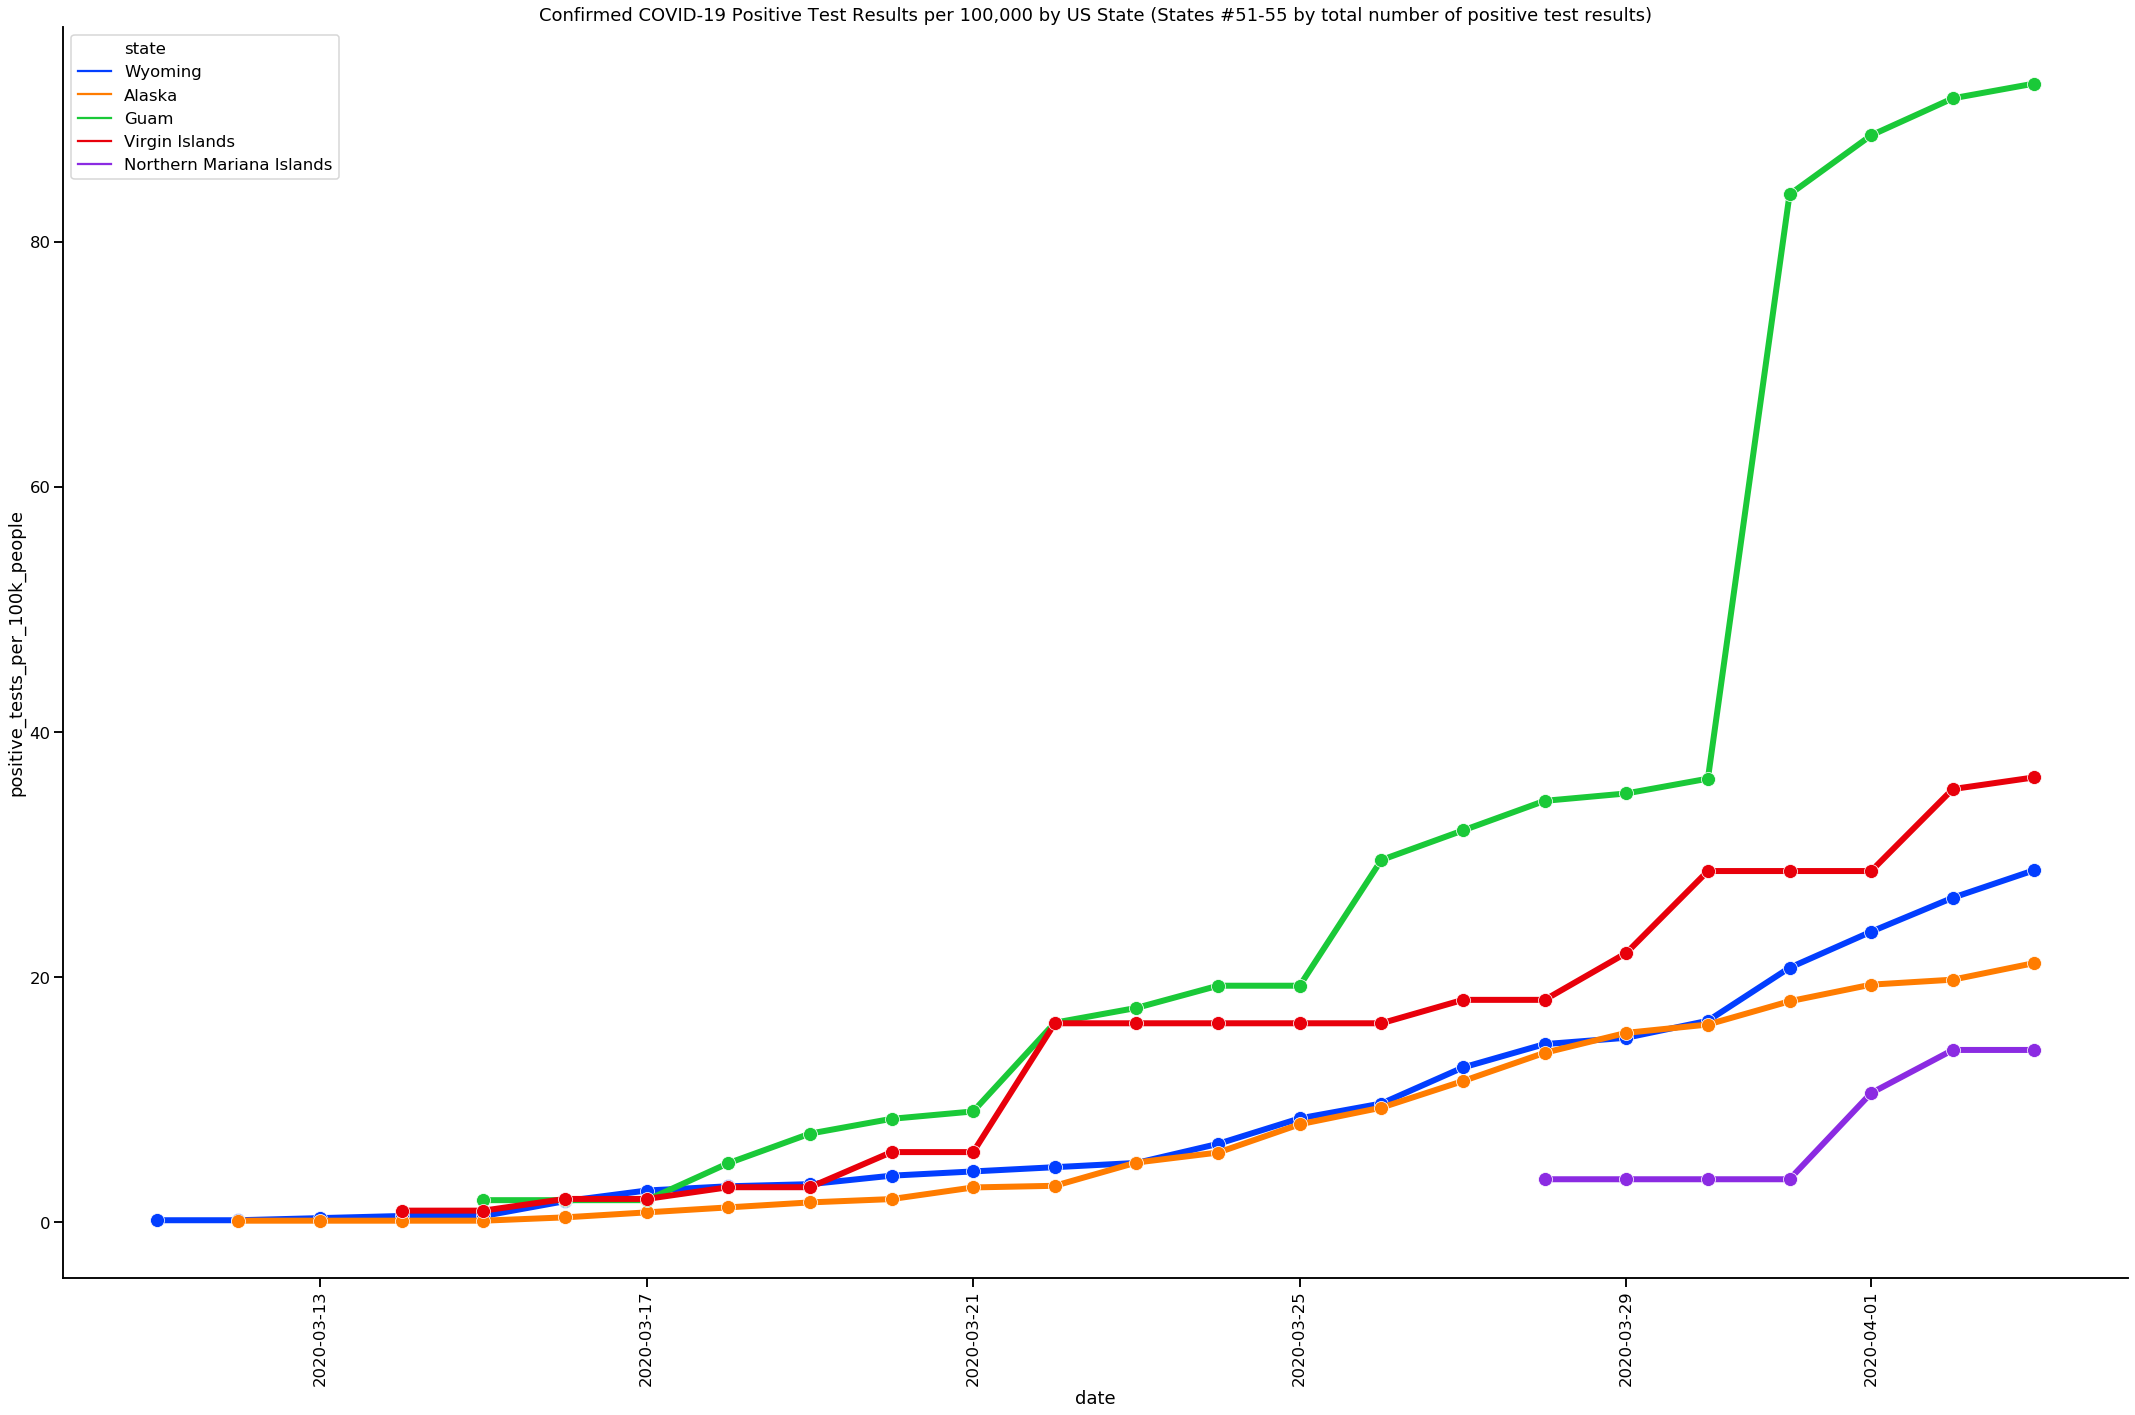

In [30]:
for i, group in enumerate(state_groups):
    states_to_plot = df_states.loc[df_states['state'].isin(group)].sort_values(by='positive_tests', ascending=False)
    
    plt.figure(figsize=(30,20))
    sns.lineplot(x=states_to_plot['date'], y=states_to_plot['positive_tests_per_100k_people'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False)
    plt.xticks(rotation=90);
    plt.title(f'Confirmed COVID-19 Positive Test Results per 100,000 by US State (States #{i*group_size+1}-{i*group_size+len(group)} by total number of positive test results)')
    plt.tight_layout()
    sns.despine()
    plt.show()

In [31]:
# states_to_plot = df_states.loc[df_states['state'].isin(states_2_thru_10)].sort_values(by='positive_tests', ascending=False)

# plt.figure(figsize=(30,20))
# sns.lineplot(x=states_to_plot['date'], y=states_to_plot['positive_tests_per_100k_people'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False)
# plt.xticks(rotation=90);
# plt.title(f'Confirmed COVID-19 Positive Test Results per 100,000 by US State (States #2-10 by total number of positive test results)')
# plt.tight_layout()
# sns.despine()
# plt.show()

In [32]:
# states_to_plot = df_states.loc[df_states['state'].isin(states_3_thru_10)].sort_values(by='positive_tests', ascending=False)

# plt.figure(figsize=(30,20))
# sns.lineplot(x=states_to_plot['date'], y=states_to_plot['positive_tests_per_100k_people'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False)
# plt.title(f'Confirmed COVID-19 Positive Test Results per 100,000 by US State (States #3-10 by total number of positive test results)')
# plt.tight_layout()
# sns.despine()
# plt.show()